In [2]:
import kagglehub
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import optuna
from itertools import product

from matplotlib.ticker import PercentFormatter

In [3]:
path = kagglehub.dataset_download("svaningelgem/crypto-currencies-daily-prices")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 3.00M/3.00M [00:00<00:00, 5.51MB/s]

Extracting files...


Path to dataset files: /Users/thibaultjames/.cache/kagglehub/datasets/svaningelgem/crypto-currencies-daily-prices/versions/786


In [4]:
dataset_path = "/Users/thibaultjames/.cache/kagglehub/datasets/svaningelgem/crypto-currencies-daily-prices/versions/761"
files = os.listdir(dataset_path)
print(files)

['HBAR.csv', 'IOTA.csv', 'KSM.csv', 'SAND.csv', 'CKB.csv', 'MX.csv', 'CRV.csv', 'SUN.csv', 'BCH.csv', 'BTT.csv', 'BTC.csv', 'CHZ.csv', 'KAVA.csv', 'TRX.csv', 'BAT.csv', 'SUSHI.csv', 'SYRUP.csv', 'HNT.csv', 'RUNE.csv', 'XRP.csv', 'FTT.csv', 'NEAR.csv', 'GRT.csv', 'VET.csv', 'ZIL.csv', 'QNT.csv', 'STX.csv', 'XAUt.csv', 'FLOW.csv', 'PAXG.csv', 'ATOM.csv', 'TWT.csv', 'FIL.csv', 'ICP.csv', 'ETC.csv', 'COMP.csv', 'BSV.csv', 'GNO.csv', 'MANA.csv', 'AXS.csv', 'LPT.csv', 'RAY.csv', 'FRAX.csv', 'KCS.csv', 'TFUEL.csv', 'IMX.csv', 'DYDX.csv', 'AAVE.csv', 'XMR.csv', 'AMP.csv', 'CVX.csv', 'XCN.csv', 'XLM.csv', 'SUPER.csv', 'NFT.csv', 'NEO.csv', 'USDD.csv', 'LEO.csv', 'ALGO.csv', 'AVAX.csv', 'ENS.csv', 'USDT.csv', 'USDC.csv', 'THETA.csv', 'MINA.csv', 'XTZ.csv', 'RVN.csv', 'LDO.csv', 'GLM.csv', 'INJ.csv', 'GT.csv', 'FET.csv', 'JST.csv', '1INCH.csv', 'ETH.csv', 'QTUM.csv', 'WEMIX.csv', 'ZEC.csv', 'AR.csv', 'CAKE.csv', 'TRAC.csv', 'UNI.csv', 'EGLD.csv', 'DASH.csv', 'RSR.csv', 'XEC.csv', 'SNX.csv', 'DCR.

In [5]:
all_files = [f for f in os.listdir(dataset_path) if f.endswith(".csv")]
dfs = [pd.read_csv(os.path.join(dataset_path, f)) for f in all_files]

df_all = pd.concat(dfs, ignore_index=True)

In [6]:
df_all.to_csv("crypto_cleaned.csv", index=False)
df_all.head()

ticker        date     open     high      low    close
0   HBAR  2019-09-20  0.05058  0.05638  0.04986  0.05159
1   HBAR  2019-09-21  0.05159  0.05484  0.04545  0.04814
2   HBAR  2019-09-22  0.04814  0.04858  0.03844  0.03924
3   HBAR  2019-09-23  0.03924  0.03924  0.03403  0.03791
4   HBAR  2019-09-24  0.03791  0.04041  0.02870  0.02947

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218635 entries, 0 to 218634
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ticker  218635 non-null  object 
 1   date    218635 non-null  object 
 2   open    218635 non-null  float64
 3   high    218635 non-null  float64
 4   low     218635 non-null  float64
 5   close   218635 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.0+ MB


I’m going to take the last 3 months across the whole DF in order to identify short-term cycles.

In [8]:
df_all['date'] = pd.to_datetime(df_all['date'])

In [9]:
# Filter from 1 May 2025
df_recent = df_all[df_all['date'] >= '2025-05-01']

#check
print(df_recent.head())
print(df_recent['date'].min(), df_recent['date'].max())

     ticker       date      open      high       low     close
2002   HBAR 2025-05-01  0.182444  0.191871  0.181342  0.188201
2003   HBAR 2025-05-02  0.188231  0.190533  0.183807  0.184952
2004   HBAR 2025-05-03  0.184972  0.187400  0.179268  0.180840
2005   HBAR 2025-05-04  0.180870  0.184822  0.175735  0.178044
2006   HBAR 2025-05-05  0.177944  0.178329  0.171641  0.173576
2025-05-01 00:00:00 2025-08-13 00:00:00


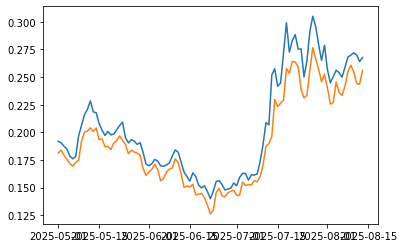

In [10]:
plt.plot(df_recent[df_recent['ticker'] == 'HBAR']['date'], df_recent[df_recent['ticker'] == 'HBAR']['high'])
plt.plot(df_recent[df_recent['ticker'] == 'HBAR']['date'], df_recent[df_recent['ticker'] == 'HBAR']['low'])
plt.show()

In [11]:
df_recent['daily-gap'] = df_recent['high']-df_recent['low']
df_recent['%daily-gap/high'] =df_recent['daily-gap']/df_recent['high']

/var/folders/49/ck8bc0m57zgd8z_xp3lj_w340000gn/T/ipykernel_26637/908524086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['daily-gap'] = df_recent['high']-df_recent['low']
/var/folders/49/ck8bc0m57zgd8z_xp3lj_w340000gn/T/ipykernel_26637/908524086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['%daily-gap/high'] =df_recent['daily-gap']/df_recent['high']


In [12]:
df_recent.head()

ticker       date      open      high       low     close  daily-gap  \
2002   HBAR 2025-05-01  0.182444  0.191871  0.181342  0.188201   0.010529   
2003   HBAR 2025-05-02  0.188231  0.190533  0.183807  0.184952   0.006726   
2004   HBAR 2025-05-03  0.184972  0.187400  0.179268  0.180840   0.008132   
2005   HBAR 2025-05-04  0.180870  0.184822  0.175735  0.178044   0.009087   
2006   HBAR 2025-05-05  0.177944  0.178329  0.171641  0.173576   0.006688   

      %daily-gap/high  
2002         0.054875  
2003         0.035301  
2004         0.043394  
2005         0.049166  
2006         0.037504

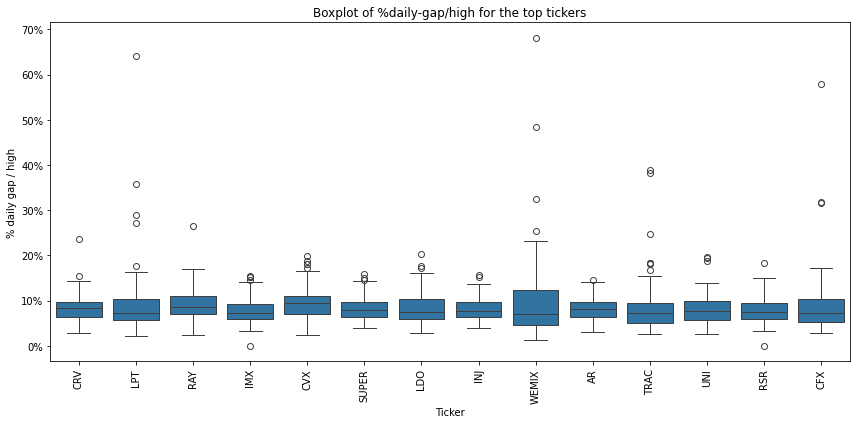

In [13]:
# Compute statistics by ticker
stats = df_recent.groupby('ticker')['%daily-gap/high'].agg(['mean', 'quantile'])
# For the 1st quartile
stats['q1'] = df_recent.groupby('ticker')['%daily-gap/high'].quantile(0.25)

# Top 10 by mean
top10_mean = stats.sort_values('mean', ascending=False).head(10).index.tolist()

# Top 10 by 1st quartile
top10_q1 = stats.sort_values('q1', ascending=False).head(10).index.tolist()

# Union of the two lists (some tickers may appear in both)
top_tickers = list(set(top10_mean + top10_q1))

# Filter the DataFrame
df_top = df_recent[df_recent['ticker'].isin(top_tickers)]

# Boxplot with seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='ticker', y='%daily-gap/high')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
plt.title("Boxplot of %daily-gap/high for the top tickers")
plt.xlabel("Ticker")
plt.ylabel("% daily gap / high")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
# Compute variance by ticker for top_tickers
variance = df_top.groupby('ticker')['%daily-gap/high'].var()

# Display the ticker with the lowest variance
ticker_min_var = variance.idxmin()
min_var_value = variance.min()

print(f"Ticker with the lowest variance: {ticker_min_var}, variance = {min_var_value}")

Ticker with the lowest variance: AR, variance = 0.0006096323293349777


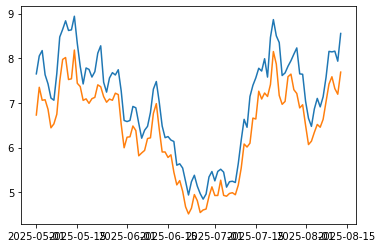

In [23]:
plt.plot(df_recent[df_recent['ticker'] == 'AR']['date'], df_recent[df_recent['ticker'] == 'AR']['high'])
plt.plot(df_recent[df_recent['ticker'] == 'AR']['date'], df_recent[df_recent['ticker'] == 'AR']['low'])
plt.show()

This code will:

Buy 100 € at the first opening.

Sell as soon as an opening is ≥ +7% compared to the buy price.

Log every trade (date, ticker, action, price, P&L).

Show cumulative P&L over time.

In [15]:
# Choose a ticker to backtest
ticker = 'AR'
df = df_recent[df_recent['ticker'] == ticker].sort_values('date').reset_index(drop=True)

# Compute 7-day moving average
df['ma7'] = df['open'].rolling(window=3).mean()

# Parameters
capital_init = 100
threshold = 0.05  # 5%
discount = 0.95   # Buy if open < 95% of MA7

# Variables for the backtest
trades = []
holding = False
buy_price = 0
capital = capital_init

for i in range(len(df)-1):
    open_price = df.loc[i, 'open']
    next_open = df.loc[i+1, 'open']
    ma7 = df.loc[i, 'ma7']
    
    # Check buy condition
    if not holding and ma7 is not None and open_price < ma7 * discount:
        buy_price = open_price
        holding = True
    
    # Check if the next open exceeds the threshold
    if holding and (next_open >= buy_price * (1 + threshold)):
        pnl = capital * ((next_open - buy_price) / buy_price)
        trades.append({
            'buy_date': df.loc[i, 'date'],
            'buy_price': buy_price,
            'sell_date': df.loc[i+1, 'date'],
            'sell_price': next_open,
            'pnl': pnl
        })
        capital += pnl
        holding = False

# Create a DataFrame with P&L
df_trades = pd.DataFrame(trades)

# Summary
total_pnl = df_trades['pnl'].sum()
print(f"Number of trades: {len(df_trades)}")
print(f"Total P&L: {total_pnl:.2f} €")
df_trades.head()


Number of trades: 4
Total P&L: 48.82 €


buy_date  buy_price  sell_date  sell_price        pnl
0 2025-05-08    6.54595 2025-05-09     7.51155  14.751106
1 2025-07-20    7.55900 2025-07-21     8.34023  11.859638
2 2025-07-27    7.40224 2025-07-28     7.89407   8.412448
3 2025-08-04    6.20668 2025-08-05     6.84077  13.794308

In [16]:
# Summary
total_pnl = df_trades['pnl'].sum()
print(f"Number of trades: {len(df_trades)}")
print(f"Total P&L: {total_pnl:.2f} €")
print(f"Final capital: {capital:.2f} €")

Number of trades: 4
Total P&L: 48.82 €
Final capital: 148.82 €


The algorithm works. Now we can try to optimize the parameters threshold and discount.

In [17]:
def backtest_strategy(df_ticker, capital_init=100, threshold=0.07, discount=0.95):
    df = df_ticker.sort_values('date').reset_index(drop=True)
    df['ma7'] = df['open'].rolling(window=7).mean()
    
    capital = capital_init
    holding = False
    buy_price = 0
    
    for i in range(len(df)-1):
        open_price = df.loc[i, 'open']
        next_open = df.loc[i+1, 'open']
        ma7 = df.loc[i, 'ma7']
        
        # Buy condition
        if not holding and pd.notna(ma7) and open_price < ma7 * discount:
            buy_price = open_price
            holding = True
        
        # Sell condition
        if holding and next_open >= buy_price * (1 + threshold):
            pnl = capital * ((next_open - buy_price) / buy_price)
            capital += pnl
            holding = False
    
    return capital

In [18]:
# Parameters to test
threshold_values = [0.03, 0.05, 0.07, 0.1, 0.15]   # 3% to 15%
discount_values = [0.90, 0.93, 0.95, 0.97, 0.99]   # 10% to 1% below MA7

results = []

ticker = 'AR'
df_ticker = df_recent[df_recent['ticker'] == ticker]

for th in threshold_values:
    for disc in discount_values:
        final_capital = backtest_strategy(df_ticker, capital_init=100, threshold=th, discount=disc)
        results.append({
            'threshold': th,
            'discount': disc,
            'final_capital': final_capital
        })

df_results = pd.DataFrame(results)
best_params = df_results.loc[df_results['final_capital'].idxmax()]

print("Best parameters found:")
print(best_params)

Best parameters found:
threshold          0.030000
discount           0.970000
final_capital    151.076882
Name: 3, dtype: float64


It’s not bad because in 3 months we make +51%, but it would be good to see if we can sell within the day at the assumed high. The approach is very simple: if the intraday high exceeds this threshold, then we sell at that price immediately, thus guaranteeing a gain on the capital. The problem is that there was a boom on Ether, so despite a gain over this period, it is less strong compared to holding Ether crypto over the same period, which would have been at least +100%.

I want to, at each buying opportunity, take the ticker that has the highest median of %daily-gap/high with a minimal variance.


In [19]:
def select_best_ticker_union(df, current_date, window=14):
    """
    Selects tickers via union of Top10 by mean and Top10 by Q1,
    then chooses the one with the minimal variance of %daily-gap/high.
    """
    # Filter by time window
    start_date = current_date - pd.Timedelta(days=window)
    df_window = df[(df['date'] > start_date) & (df['date'] <= current_date)]

    if df_window.empty:
        return None, pd.DataFrame()

    # Compute stats
    stats = df_window.groupby('ticker')['%daily-gap/high'].agg(['mean', 'var'])
    stats['q1'] = df_window.groupby('ticker')['%daily-gap/high'].quantile(0.25)

    # Top 10 by mean
    top10_mean = stats.sort_values('mean', ascending=False).head(10).index.tolist()
    # Top 10 by Q1
    top10_q1 = stats.sort_values('q1', ascending=False).head(10).index.tolist()

    # Union
    top_tickers = list(set(top10_mean + top10_q1))

    # Filter stats
    stats_filtered = stats.loc[top_tickers]

    # Choose the ticker with minimal variance
    best_ticker = stats_filtered['var'].idxmin()

    return best_ticker, stats_filtered.sort_values("var", ascending=True)

In [20]:
def choose_ticker_with_condition(df, current_date, discount, ma_window=7, window=14):
    """
    Chooses the best ticker (minimal variance among union of Top10 by mean and Q1)
    that meets the condition: open < discount * MA7.
    """
    # Get best ticker + ranking
    best_ticker, stats_sorted = select_best_ticker_union(df, current_date, window=window)

    if stats_sorted.empty:
        #print(f"{current_date.date()} ❌ No valid ticker (no data)")
        return None

    #print(f"\n📊 Ticker ranking (ascending variance) on {current_date.date()}:")
    #print(stats_sorted.head(5))  # only top 5 for readability

    # Loop through ranking from most stable to least stable
    for ticker in stats_sorted.index:
        df_t = df[df['ticker'] == ticker].copy()
        df_t = df_t.sort_values("date")
        df_t['ma7'] = df_t['open'].rolling(ma_window).mean()

        # Extract row corresponding to current date
        row = df_t[df_t['date'] == current_date]
        if row.empty or pd.isna(row['ma7'].values[0]):
            continue

        open_price = row['open'].values[0]
        ma7 = row['ma7'].values[0]

        if open_price < discount * ma7:
            print(f"✅ {ticker} chosen (open={open_price:.3f} < {discount} * MA7={ma7:.3f})")
            return ticker

    print(f"{current_date.date()} ❌ No ticker meets open < discount * MA7")
    return None

In [21]:
current_date = pd.to_datetime("2025-06-01")
best_ticker = choose_ticker_with_condition(df_recent, current_date, discount=0.97)

✅ ROSE chosen (open=0.029 < 0.97 * MA7=0.032)


We now know how to choose a ticker by defining specific entry criteria.

In [22]:
def backtest_dynamic_selection(df, start_capital=100, discount=0.94, ma_window=7, threshold=0.07, window=14, stoploss=0.15):
    """
    Multi-ticker backtest with dynamic selection:
    - Each day, choose the best ticker via choose_ticker_with_condition
    - Buy only if open < discount * MA7
    - Sell intraday or at next open if threshold reached
    """
    capital = start_capital
    position = 0
    buy_price = 0
    current_ticker = None
    trades_log = []
    capital_history = []

    # Sort the global DataFrame
    df = df.sort_values("date")

    all_dates = df["date"].drop_duplicates().sort_values()

    for i, current_date in enumerate(all_dates):
        # Record capital state
        current_value = capital if position == 0 else position * df[(df["ticker"] == current_ticker) & (df["date"] == current_date)]["open"].values[0]
        capital_history.append({"date": current_date, "capital": current_value})

        # If not in position → search for a ticker
        if position == 0:
            ticker = choose_ticker_with_condition(df, current_date, discount, ma_window, window)

            if ticker is not None:
                df_t = df[(df["ticker"] == ticker) & (df["date"] == current_date)]
                if not df_t.empty:
                    open_price = df_t["open"].values[0]
                    position = capital / open_price
                    buy_price = open_price
                    current_ticker = ticker
                    capital = 0
                    trades_log.append({
                        "date": current_date,
                        "ticker": ticker,
                        "action": "BUY",
                        "price": buy_price,
                        "capital": capital,
                        "position": position,
                        "pnl": 0
                    })

        # If in position → monitor for sell
        elif position > 0:
            df_t = df[(df["ticker"] == current_ticker) & (df["date"] == current_date)]
            if df_t.empty:
                continue

            open_price = df_t["open"].values[0]
            high_price = df_t["high"].values[0]

            # Intraday sell if high >= threshold
            if high_price >= buy_price * (1 + threshold):
                sell_price = buy_price * (1 + threshold)
                capital = position * sell_price
                pnl = (sell_price - buy_price) * position
                trades_log.append({
                    "date": current_date,
                    "ticker": current_ticker,
                    "action": "SELL (intraday)",
                    "price": sell_price,
                    "capital": capital,
                    "position": 0,
                    "pnl": pnl
                })
                position = 0
                current_ticker = None

            # Sell at next open if next day >= threshold
            elif i < len(all_dates) - 1:
                next_date = all_dates.iloc[i+1]
                df_next = df[(df["ticker"] == current_ticker) & (df["date"] == next_date)]
                if not df_next.empty:
                    next_open = df_next["open"].values[0]
                    if next_open >= buy_price * (1 + threshold):
                        sell_price = next_open
                        capital = position * sell_price
                        pnl = (sell_price - buy_price) * position
                        trades_log.append({
                            "date": next_date,
                            "ticker": current_ticker,
                            "action": "SELL (next open)",
                            "price": sell_price,
                            "capital": capital,
                            "position": 0,
                            "pnl": pnl
                        })
                        position = 0
                        current_ticker = None

    # Final capital
    final_capital = capital if position == 0 else position * df[(df["ticker"] == current_ticker)].iloc[-1]["close"]
    df_log = pd.DataFrame(trades_log)
    df_capital_hist = pd.DataFrame(capital_history)

    print("\n💰 Final capital:", round(final_capital, 2), "€")
    return df_log, df_capital_hist

In [23]:
def optimize_discount(df, start_capital=100, threshold=0.07, discount_range=np.arange(0.90, 1.01, 0.01)):
    """
    Test different discount levels and return the one that maximizes final capital.
    """
    results = []

    for discount in discount_range:
        df_log, df_capital_hist = backtest_dynamic_selection(
            df,
            start_capital=start_capital,
            discount=discount,
            threshold=threshold
        )
        
        final_capital = df_capital_hist.iloc[-1]['capital']
        results.append({
            "discount": round(discount, 3),
            "final_capital": final_capital
        })

    results_df = pd.DataFrame(results).sort_values("final_capital", ascending=False).reset_index(drop=True)
    
    best = results_df.iloc[0]
    print(f"🏆 Optimal discount: {best['discount']} with final capital of {best['final_capital']:.2f} €")
    
    return results_df, best

# Example usage:
results_df, best = optimize_discount(df_recent, start_capital=100, threshold=0.07, discount_range=np.arange(0.90, 1.01, 0.001))

print(results_df.head(10))  # top 10 results

2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ RAY chosen (open=2.321 < 0.9 * MA7=2.684)
2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
2025-05-16 ❌ No ticker meets open < discount * MA7
✅ ROSE chosen (open=0.035 < 0.9 * MA7=0.039)
2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
2025-05-26 ❌ No ticker meets open < discount * MA7
2025-05-27 ❌ No ticker meets open < discount

2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
2025-05-26 ❌ No ticker meets open < discount * MA7
2025-05-27 ❌ No ticker meets open < discount * MA7
2025-05-28 ❌ No ticker meets open < discount * MA7
2025-05-29 ❌ No ticker meets open < discount * MA7
2025-05-30 ❌ No ticker meets open < discount * MA7
✅ RAY chosen (open=2.548 < 0.902 * MA7=3.021)
2025-06-20 ❌ No ticker meets open < discount * MA7
2025-06-21 ❌ No ticker meets open < discount * MA7
✅ AR chosen (open=4.734 < 0.902 * MA7=5.439)
2025-06-24 ❌ No ticker meets open < discount * MA7
2025-06-25 ❌ No ticker meets open < discount * MA7
2025-06-26 ❌ No ticker meets open < discount * MA7
2025-06-27 ❌ No ticker meets open < discount * MA7
2025-06-28 ❌ No ticker meets open < discount * MA7
2025-06-29 ❌ No ticker meets open < discount * MA7
2025-06-30 ❌ No ticker meets open < discount * MA7
2025-07-01 ❌ No ticker meets open < discount * MA7
2025-07-02 ❌ No ticker meets open < discou

2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
2025-05-16 ❌ No ticker meets open < discount * MA7
✅ ROSE chosen (open=0.035 < 0.905 * MA7=0.039)
2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
2025-05-26 ❌ No ticker meets open < discount * MA7
2025-05-27 ❌ No ticker meets open < discount * MA7
2025-05-28 ❌ No ticker meets open < discount * MA7
✅ WEMIX chosen (open=0.338 < 0.905 * MA7=0.374)
✅ RAY chosen (open=2.548 < 0.905 * MA7=3.021)
2025-06-20 ❌ No ticker meets open < discount * MA7
2025-06-21 ❌ No ticker meets open < discount * MA7
✅ AR chosen (open=4.734 < 0.905 * MA7=5.439)
2025-06-24 ❌ No ticker meets open < discount * MA

✅ ROSE chosen (open=0.035 < 0.912 * MA7=0.039)

💰 Final capital: 95.65 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ ROSE chosen (open=0.026 < 0.913 * MA7=0.029)
2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
✅ ROSE chosen (open=0.035 < 0.913 * MA7=0.039)

💰 Final capital: 95.65 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discou

2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open < discount * MA7
2025-07-23 ❌ No ticker meets open < discount * MA7
✅ HBAR chosen (open=0.245 < 0.922 * MA7=0.266)
2025-07-26 ❌ No ticker meets open < discount * MA7
2025-07-27 ❌ No ticker meets open < discount * MA7
2025-07-28 ❌ No ticker meets open < discount * MA7
2025-07-29 ❌ No ticker meets open < discount * MA7
✅ CVX chosen (open=4.517 < 0.922 * MA7=5.198)
✅ LDO chosen (open=0.963 < 0.922 * MA7=1.061)
2025-08-08 ❌ No ticker meets open < discount 

✅ HBAR chosen (open=0.245 < 0.925 * MA7=0.266)
2025-07-26 ❌ No ticker meets open < discount * MA7
2025-07-27 ❌ No ticker meets open < discount * MA7
2025-07-28 ❌ No ticker meets open < discount * MA7
2025-07-29 ❌ No ticker meets open < discount * MA7
✅ CVX chosen (open=4.517 < 0.925 * MA7=5.198)
✅ LDO chosen (open=0.963 < 0.925 * MA7=1.061)
2025-08-08 ❌ No ticker meets open < discount * MA7
2025-08-09 ❌ No ticker meets open < discount * MA7
2025-08-10 ❌ No ticker meets open < discount * MA7
2025-08-11 ❌ No ticker meets open < discount * MA7
2025-08-12 ❌ No ticker meets open < discount * MA7
2025-08-13 ❌ No ticker meets open < discount * MA7

💰 Final capital: 196.72 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ ROSE chosen (ope

2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
✅ CRV chosen (open=0.698 < 0.929 * MA7=0.757)
✅ LDO chosen (open=0.879 < 0.929 * MA7=0.946)
2025-05-23 ❌ No ticker meets open < discount * MA7
2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
✅ DYDX chosen (open=0.587 < 0.929 * MA7=0.645)
2025-05-28 ❌ No ticker meets open < discount * MA7
✅ WEMIX chosen (open=0.338 < 0.929 * MA7=0.374)
✅ CVX chosen (open=2.901 < 0.929 * MA7=3.188)
✅ WEMIX chosen (open=0.378 < 0.929 * MA7=0.412)
✅ INJ chosen (open=11.650 < 0.929 * MA7=13.126)
2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-

2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ ROSE chosen (open=0.026 < 0.933 * MA7=0.029)
2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
✅ CRV chosen (open=0.698 < 0.933 * MA7=0.757)
✅ LDO chosen (open=0.879 < 0.933 * MA7=0.946)
2025-05-23 ❌ No ticker meets open < discount * MA7
2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
✅ DYDX chosen (open=0.587 < 0.933 * MA7=0.645)
2025-05-28 ❌ No ticker meets open < discount * MA7
✅ WEMIX chosen (open=0.338 < 0.933 * MA7=0.374)
✅

2025-08-12 ❌ No ticker meets open < discount * MA7
2025-08-13 ❌ No ticker meets open < discount * MA7

💰 Final capital: 210.49 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ ROSE chosen (open=0.026 < 0.937 * MA7=0.029)
2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
✅ CRV chosen (open=0.698 < 0.937 * MA7=0.757)
✅ LDO chosen (open=0.879 < 0.937 * MA7=0.946)
2025-05-23 ❌ No ticker meets open < discount * MA7
2025-05-24 ❌ No ti

2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open < discount * MA7
2025-07-23 ❌ No ticker meets open < discount * MA7
✅ RSR chosen (open=0.009 < 0.9400000000000001 * MA7=0.009)
2025-07-29 ❌ No ticker meets open < discount * MA7
✅ CVX chosen (open=4.517 < 0.9400000000000001 * MA7=5.198)
✅ CRV chosen (open=0.957 < 0.9400000000000001 * MA7=1.031)
✅ CFX chosen (open=0.198 < 0.9400000000000001 * MA7=0.211)

💰 Final capital: 212.04 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker 

2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ ROSE chosen (open=0.026 < 0.9440000000000001 * MA7=0.029)
2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
✅ CRV chosen (open=0.698 < 0.9440000000000001 * MA7=0.757)
✅ LDO chosen (open=0.879 < 0.9440000000000001 * MA7=0.946)
2025-05-23 ❌ No ticker meets open < discount * MA7
2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
✅ DYDX chosen (open=0.587 < 0.9440000000000001 * MA7=0.645)
2025-05-28 ❌ No ticker meets open < discount * MA7
✅ WEMIX chosen (open=0.338 < 0.9440000000000001 * MA7=0.374)
✅ CVX chosen (open=2.901 < 0.944000000

2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open < discount * MA7
2025-07-23 ❌ No ticker meets open < discount * MA7
✅ RSR chosen (open=0.009 < 0.9470000000000001 * MA7=0.009)
✅ SUSHI chosen (open=0.864 < 0.9470000000000001 * MA7=0.913)

💰 Final capital: 196.72 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ RUNE chosen (open=1.228 < 0.9480000000000001 * MA7=1.299)
2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets

2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open < discount * MA7
2025-07-23 ❌ No ticker meets open < discount * MA7
✅ AR chosen (open=7.402 < 0.9510000000000001 * MA7=7.798)
2025-07-28 ❌ No ticker meets open < discount * MA7
✅ SUSHI chosen (open=0.864 < 0.9510000000000001 * MA7=0.913)

💰 Final capital: 196.72 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < di

✅ WEMIX chosen (open=0.378 < 0.9550000000000001 * MA7=0.412)
✅ INJ chosen (open=11.650 < 0.9550000000000001 * MA7=13.126)
2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open < discount * MA7
2025-07-23 ❌ No ticker meets open < discount * MA7
✅ AR chosen (open=7.402 < 0.9550000000000001 * MA7=7.798)
2025-07-28 ❌ No ticker meets open < discount * MA7
✅ SUSHI chosen (open=0.864 < 0.9550000000000001 * MA7=0.913)

💰 Final capital: 196.72 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ti

2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
✅ DYDX chosen (open=0.587 < 0.9590000000000001 * MA7=0.645)
2025-05-28 ❌ No ticker meets open < discount * MA7
✅ WEMIX chosen (open=0.338 < 0.9590000000000001 * MA7=0.374)
✅ CVX chosen (open=2.901 < 0.9590000000000001 * MA7=3.188)
✅ WEMIX chosen (open=0.378 < 0.9590000000000001 * MA7=0.412)
✅ INJ chosen (open=11.650 < 0.9590000000000001 * MA7=13.126)
2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open <

✅ WEMIX chosen (open=0.371 < 0.9640000000000001 * MA7=0.386)
✅ LDO chosen (open=0.886 < 0.9640000000000001 * MA7=0.921)
2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
✅ DYDX chosen (open=0.587 < 0.9640000000000001 * MA7=0.645)
2025-05-28 ❌ No ticker meets open < discount * MA7
✅ WEMIX chosen (open=0.338 < 0.9640000000000001 * MA7=0.374)
✅ CVX chosen (open=2.901 < 0.9640000000000001 * MA7=3.188)
✅ WEMIX chosen (open=0.378 < 0.9640000000000001 * MA7=0.412)
✅ INJ chosen (open=11.650 < 0.9640000000000001 * MA7=13.126)
2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
✅ 1INCH chosen (open=0.316 < 0.9640000000000001 * MA7=0.329)

💰 Fina

✅ CFX chosen (open=0.207 < 0.9710000000000001 * MA7=0.214)

💰 Final capital: 154.64 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ RUNE chosen (open=1.228 < 0.9720000000000001 * MA7=1.299)
✅ WEMIX chosen (open=0.371 < 0.9720000000000001 * MA7=0.386)
✅ LDO chosen (open=0.886 < 0.9720000000000001 * MA7=0.921)
2025-05-24 ❌ No ticker meets open < discount * MA7
✅ DYDX chosen (open=0.634 < 0.9720000000000001 * MA7=0.652)
✅ 1INCH chosen (open=0.316 < 0.9720000000000001 * MA7=0.329)

💰 Final capital: 114.75 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker me

✅ WEMIX chosen (open=0.372 < 0.9800000000000001 * MA7=0.381)
✅ RUNE chosen (open=1.546 < 0.9800000000000001 * MA7=1.663)
✅ ZEC chosen (open=49.109 < 0.9800000000000001 * MA7=50.829)
2025-06-11 ❌ No ticker meets open < discount * MA7
✅ WEMIX chosen (open=0.378 < 0.9800000000000001 * MA7=0.412)
✅ INJ chosen (open=11.650 < 0.9800000000000001 * MA7=13.126)
2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
✅ RAY chosen (open=2.747 < 0.9800000000000001 * MA7=2.819)
✅ CVX chosen (open=4.182 < 0.9800000000000001 * MA7=4.274)
✅ 1INCH chosen (open=0.311 < 0.9800000000000001 * MA7=0.320)

💰 Final capital: 187.68 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets op


💰 Final capital: 101.5 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ RUNE chosen (open=1.228 < 0.9880000000000001 * MA7=1.299)
✅ WEMIX chosen (open=0.371 < 0.9880000000000001 * MA7=0.386)
✅ LDO chosen (open=0.886 < 0.9880000000000001 * MA7=0.921)
✅ LDO chosen (open=0.881 < 0.9880000000000001 * MA7=0.902)
✅ RUNE chosen (open=1.922 < 0.9880000000000001 * MA7=1.953)

💰 Final capital: 101.5 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ RUNE chosen (open=1.228 < 0.9890000

✅ CFX chosen (open=0.200 < 0.9990000000000001 * MA7=0.210)

💰 Final capital: 196.2 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ RUNE chosen (open=1.228 < 1.0 * MA7=1.299)
✅ WEMIX chosen (open=0.371 < 1.0 * MA7=0.386)
✅ LPT chosen (open=5.458 < 1.0 * MA7=5.471)
✅ DYDX chosen (open=0.647 < 1.0 * MA7=0.651)
✅ RAY chosen (open=2.747 < 1.0 * MA7=2.819)
✅ CVX chosen (open=4.182 < 1.0 * MA7=4.274)
✅ CRV chosen (open=0.962 < 1.0 * MA7=0.963)
✅ AR chosen (open=7.334 < 1.0 * MA7=7.788)
✅ XTZ chosen (open=0.901 < 1.0 * MA7=0.915)
✅ WEMIX chosen (open=0.794 < 1.0 * MA7=0.796)
✅ CFX chosen (open=0.200 < 1.0 * MA7=0.210)

💰 Final capital: 196.2 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discoun

✅ LPT chosen (open=5.458 < 1.0090000000000001 * MA7=5.471)
✅ DYDX chosen (open=0.647 < 1.0090000000000001 * MA7=0.651)
✅ RAY chosen (open=2.747 < 1.0090000000000001 * MA7=2.819)
✅ CVX chosen (open=4.182 < 1.0090000000000001 * MA7=4.274)
✅ CRV chosen (open=0.962 < 1.0090000000000001 * MA7=0.963)
✅ AR chosen (open=7.334 < 1.0090000000000001 * MA7=7.788)
✅ RAY chosen (open=3.168 < 1.0090000000000001 * MA7=3.148)
✅ CVX chosen (open=4.429 < 1.0090000000000001 * MA7=4.428)

💰 Final capital: 196.72 €
🏆 Optimal discount: 0.939 with final capital of 212.59 €
   discount  final_capital
0     0.939     212.590898
1     0.945     212.590898
2     0.944     212.590898
3     0.943     212.590898
4     0.942     212.590898
5     0.941     212.590898
6     0.940     212.590898
7     0.932     210.485195
8     0.930     210.485195
9     0.929     210.485195


In [24]:
# Convert the 'date' column to datetime if it's not already
df_all = pd.concat(dfs, ignore_index=True)
df_all['date'] = pd.to_datetime(df_all['date'])

# Filter data after January 1, 2024
df_all = df_all[df_all['date'] > '2024-01-01'].copy()

# Sort by ticker and date
df_all = df_all.sort_values(['ticker', 'date'])

# Calculate the daily gap (previous close - current open)
df_all['daily-gap'] = df_all.groupby('ticker')['close'].shift(1) - df_all['open']

# Calculate %daily-gap relative to the high
df_all['%daily-gap/high'] = df_all['daily-gap'] / df_all['high']

# Check the result
print(df_all.head())

       ticker       date      open      high       low     close  daily-gap  \
144012  1INCH 2024-01-02  0.478391  0.496602  0.465737  0.473875        NaN   
144013  1INCH 2024-01-03  0.473775  0.487556  0.360585  0.423657   0.000100   
144014  1INCH 2024-01-04  0.423865  0.483125  0.413560  0.460247  -0.000208   
144015  1INCH 2024-01-05  0.460247  0.498129  0.451671  0.473674   0.000000   
144016  1INCH 2024-01-06  0.473674  0.488390  0.424186  0.471383   0.000000   

        %daily-gap/high  
144012              NaN  
144013         0.000205  
144014        -0.000431  
144015         0.000000  
144016         0.000000  


Here’s what a record of our transactions looks like:

In [25]:
# List of windows to test
windows = range(5, 21)  # for example, from 5 to 20 days

# Store the results
results = []

for w in windows:
    df_log, df_capital_hist = backtest_dynamic_selection(
        df_recent, 
        start_capital=100, 
        discount=0.94, 
        ma_window=7, 
        threshold=0.07, 
        window=w, 
        stoploss=0.15
    )
    final_capital = df_capital_hist["capital"].iloc[-1]
    results.append({"window": w, "final_capital": final_capital})

df_results = pd.DataFrame(results).sort_values("final_capital", ascending=False)
best_window = df_results.iloc[0]["window"]

print("🏆 Optimal window:", best_window, "days with a final capital of", df_results.iloc[0]["final_capital"], "€")

2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ No ticker meets open < discount * MA7
✅ SUPER chosen (open=0.630 < 0.94 * MA7=0.692)
2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
✅ GALA chosen (open=0.020 < 0.94 * MA7=0.021)
2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
✅ SNX chosen (open=0.744 < 0.94 * MA7=0.800)
2025-05-28 ❌ No ticker meets open < discount * MA7
✅ WEMIX chosen (open=0.338 < 0.94 * MA7=0.374)

2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open < discount * MA7
2025-07-23 ❌ No ticker meets open < discount * MA7
✅ RSR chosen (open=0.009 < 0.94 * MA7=0.009)
2025-07-29 ❌ No ticker meets open < discount * MA7
✅ CVX chosen (open=4.517 < 0.94 * MA7=5.198)
✅ CRV chosen (open=0.957 < 0.94 * MA7=1.031)
✅ CFX chosen (open=0.198 < 0.94 * MA7=0.211)

💰 Final capital: 198.17 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets

2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open < discount * MA7
2025-07-23 ❌ No ticker meets open < discount * MA7
✅ RSR chosen (open=0.009 < 0.94 * MA7=0.009)
2025-07-29 ❌ No ticker meets open < discount * MA7
✅ CVX chosen (open=4.517 < 0.94 * MA7=5.198)
✅ CRV chosen (open=0.957 < 0.94 * MA7=1.031)
✅ CFX chosen (open=0.198 < 0.94 * MA7=0.211)

💰 Final capital: 198.17 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets

✅ INJ chosen (open=11.650 < 0.94 * MA7=13.126)
2025-07-12 ❌ No ticker meets open < discount * MA7
2025-07-13 ❌ No ticker meets open < discount * MA7
2025-07-14 ❌ No ticker meets open < discount * MA7
2025-07-15 ❌ No ticker meets open < discount * MA7
2025-07-16 ❌ No ticker meets open < discount * MA7
2025-07-17 ❌ No ticker meets open < discount * MA7
2025-07-18 ❌ No ticker meets open < discount * MA7
2025-07-19 ❌ No ticker meets open < discount * MA7
2025-07-20 ❌ No ticker meets open < discount * MA7
2025-07-21 ❌ No ticker meets open < discount * MA7
2025-07-22 ❌ No ticker meets open < discount * MA7
2025-07-23 ❌ No ticker meets open < discount * MA7
✅ GALA chosen (open=0.018 < 0.94 * MA7=0.019)

💰 Final capital: 182.04 €
2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
2025-05-06 ❌ 

In [26]:
df_log, df_capital_hist = backtest_dynamic_selection(df_recent, start_capital=100, 
                                                          discount=0.94, ma_window=6, 
                                                          threshold=0.07, window=w, stoploss=0.15)

2025-05-01 ❌ No ticker meets open < discount * MA7
2025-05-02 ❌ No ticker meets open < discount * MA7
2025-05-03 ❌ No ticker meets open < discount * MA7
2025-05-04 ❌ No ticker meets open < discount * MA7
2025-05-05 ❌ No ticker meets open < discount * MA7
✅ RAY chosen (open=2.572 < 0.94 * MA7=2.744)
2025-05-09 ❌ No ticker meets open < discount * MA7
2025-05-10 ❌ No ticker meets open < discount * MA7
2025-05-11 ❌ No ticker meets open < discount * MA7
2025-05-12 ❌ No ticker meets open < discount * MA7
2025-05-13 ❌ No ticker meets open < discount * MA7
2025-05-14 ❌ No ticker meets open < discount * MA7
2025-05-15 ❌ No ticker meets open < discount * MA7
✅ CRV chosen (open=0.698 < 0.94 * MA7=0.755)
2025-05-21 ❌ No ticker meets open < discount * MA7
2025-05-22 ❌ No ticker meets open < discount * MA7
2025-05-23 ❌ No ticker meets open < discount * MA7
2025-05-24 ❌ No ticker meets open < discount * MA7
2025-05-25 ❌ No ticker meets open < discount * MA7
✅ DYDX chosen (open=0.587 < 0.94 * MA7=0.64

In [27]:
df_log

date ticker           action     price     capital     position  \
0 2025-05-06    RAY              BUY  2.572460    0.000000    38.873296   
1 2025-05-08    RAY  SELL (intraday)  2.752532  107.000000     0.000000   
2 2025-05-16    CRV              BUY  0.698100    0.000000   153.273170   
3 2025-05-20    CRV  SELL (intraday)  0.746967  114.490000     0.000000   
4 2025-05-26   DYDX              BUY  0.587059    0.000000   195.022987   
5 2025-05-27   DYDX  SELL (intraday)  0.628153  122.504300     0.000000   
6 2025-05-30    RAY              BUY  2.871710    0.000000    42.659008   
7 2025-07-18    RAY  SELL (intraday)  3.072730  131.079601     0.000000   
8 2025-07-24   GALA              BUY  0.017723    0.000000  7395.807882   

        pnl  
0  0.000000  
1  7.000000  
2  0.000000  
3  7.490000  
4  0.000000  
5  8.014300  
6  0.000000  
7  8.575301  
8  0.000000

Testing a new selection:


In [30]:
def backtest_high_volatility_dynamic(df, start_capital=100, vol_window=14, intraday_threshold=0.03):
    """
    Backtest:
    - Each day, select the ticker with the highest volatility over the last vol_window days
    - Buy at the day's open
    - Sell intraday if high >= buy_price*(1+intraday_threshold)
    - Otherwise, sell at the next day's open
    """
    capital = start_capital
    trades_log = []
    capital_history = []

    df = df.sort_values(["ticker", "date"])
    all_dates = df["date"].drop_duplicates().sort_values()

    for i in range(len(all_dates)-1):
        current_date = all_dates.iloc[i]
        next_date = all_dates.iloc[i+1]

        # Calculate volatility per ticker
        vol_df = df[df['date'] <= current_date].groupby('ticker')['close'].apply(lambda x: x.tail(vol_window).std())
        if vol_df.empty:
            continue

        best_ticker = vol_df.idxmax()
        df_today = df[(df['ticker'] == best_ticker) & (df['date'] == current_date)]
        df_next = df[(df['ticker'] == best_ticker) & (df['date'] == next_date)]

        if df_today.empty or df_next.empty:
            continue

        buy_price = df_today['open'].values[0]
        high_price = df_today['high'].values[0]

        # Check intraday sell
        if high_price >= buy_price * (1 + intraday_threshold):
            sell_price = buy_price * (1 + intraday_threshold)
            action = "SELL (intraday)"
        else:
            sell_price = df_next['open'].values[0]
            action = "SELL (next open)"

        position = capital / buy_price
        pnl = (sell_price - buy_price) * position
        capital += pnl

        trades_log.append({
            "date_buy": current_date,
            "date_sell": next_date if action=="SELL (next open)" else current_date,
            "ticker": best_ticker,
            "buy_price": buy_price,
            "sell_price": sell_price,
            "action": action,
            "pnl": pnl,
            "capital_after_trade": capital
        })

        capital_history.append({"date": next_date, "capital": capital})

    df_log = pd.DataFrame(trades_log)
    df_capital_hist = pd.DataFrame(capital_history)

    return df_log, df_capital_hist, capital

In [33]:
df_log, df_capital_hist, capital = backtest_high_volatility_dynamic(df_recent, start_capital=100, vol_window=7)

In [34]:
capital

122.14098820764657

The results are as follows:
+22% over the last 8 months
+83% over the last 20 months
-23% since January 2019

Second selection test:

In [35]:
def backtest_high_volatility_dynamic_2(df, start_capital=100, vol_window=14, intraday_threshold=0.05):
    """
    Backtest based on %daily-gap/high volatility:
    - Each day, select the ticker with the highest volatility over the last vol_window days
    - Buy at the day's open
    - Sell intraday if high >= intraday_threshold
    - Otherwise, sell at the next day's open
    """
    capital = start_capital
    trades_log = []
    capital_history = []

    df = df.sort_values(["ticker", "date"])
    all_dates = df["date"].drop_duplicates().sort_values()

    cumulative_pnl = 0

    for i in range(len(all_dates)-1):
        current_date = all_dates.iloc[i]
        next_date = all_dates.iloc[i+1]

        # Calculate volatility on %daily-gap/high for each ticker
        vol_df = df[df['date'] <= current_date].groupby('ticker')['%daily-gap/high'].apply(
            lambda x: x.tail(vol_window).std() if len(x) >= vol_window else np.nan
        ).dropna()

        if vol_df.empty:
            continue

        best_ticker = vol_df.idxmax()  # ticker with the highest volatility
        df_today = df[(df['ticker'] == best_ticker) & (df['date'] == current_date)]
        df_next = df[(df['ticker'] == best_ticker) & (df['date'] == next_date)]

        if df_today.empty or df_next.empty:
            continue

        buy_price = df_today['open'].values[0]
        high_price = df_today['high'].values[0]

        # Intraday sell if threshold reached
        if high_price >= buy_price * (1 + intraday_threshold):
            sell_price = buy_price * (1 + intraday_threshold)
            action = "SELL (intraday)"
            date_sell = current_date
        else:
            sell_price = df_next['open'].values[0]
            action = "SELL (next open)"
            date_sell = next_date

        position = capital / buy_price
        pnl = (sell_price - buy_price) * position
        cumulative_pnl += pnl
        capital += pnl

        trades_log.append({
            "date_buy": current_date,
            "date_sell": date_sell,
            "ticker": best_ticker,
            "buy_price": buy_price,
            "sell_price": sell_price,
            "action": action,
            "pnl": pnl,
            "cumulative_pnl": cumulative_pnl,
            "capital_after_trade": capital
        })

        capital_history.append({"date": date_sell, "capital": capital})

    df_log = pd.DataFrame(trades_log)
    df_capital_hist = pd.DataFrame(capital_history)

    # Capital evolution plot
    plt.figure(figsize=(12,6))
    plt.plot(df_capital_hist['date'], df_capital_hist['capital'], label='Capital (€)')
    plt.title("Capital and Cumulative P&L Evolution")
    plt.xlabel("Date")
    plt.ylabel("Capital (€)")
    plt.grid(True)
    plt.legend()
    plt.show()

    return df_log, df_capital_hist



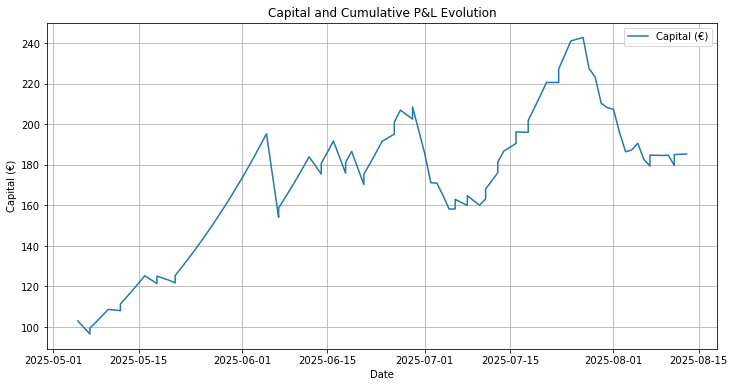

In [36]:
df_log, df_capital_hist = backtest_high_volatility_dynamic_2(df_recent, start_capital=100, vol_window=5, intraday_threshold=0.03)

The results are very good: +83% in 3 months.
Third selection test:

In [37]:
def backtest_high_volatility_dynamic_3(
    df, start_capital=100, vol_window=14, intraday_threshold=0.05, max_vol=0.08, max_vol_vol=0.1
):
    """
    Backtest based on %daily-gap/high volatility:
    - Each day, select the ticker with the highest volatility over the last vol_window days
    - Ignore tickers whose average volatility exceeds max_vol
    - Ignore tickers whose volatility (std) exceeds max_vol_vol
    - Buy at the day's open
    - Sell intraday if high >= intraday_threshold
    - Otherwise, sell at the next day's open
    """
    capital = start_capital
    trades_log = []
    capital_history = []

    df = df.sort_values(["ticker", "date"])
    all_dates = df["date"].drop_duplicates().sort_values()

    cumulative_pnl = 0

    for i in range(len(all_dates)-1):
        current_date = all_dates.iloc[i]
        next_date = all_dates.iloc[i+1]

        # Data available up to the previous day
        data = df[df['date'] < current_date]

        if data.empty:
            continue

        # Calculate volatility (std) and mean over the last vol_window days
        vol_df = data.groupby('ticker')['%daily-gap/high'].apply(
            lambda x: x.tail(vol_window).std() if len(x) >= vol_window else np.nan
        )
        mean_vol_df = data.groupby('ticker')['%daily-gap/high'].apply(
            lambda x: x.tail(vol_window).mean() if len(x) >= vol_window else np.nan
        )

        # Filter tickers based on mean and volatility
        valid_tickers = mean_vol_df[(mean_vol_df <= max_vol) & (vol_df <= max_vol_vol)].dropna().index
        vol_df = vol_df[vol_df.index.isin(valid_tickers)]

        if vol_df.empty:
            continue

        # Select ticker with the highest remaining volatility
        best_ticker = vol_df.idxmax()
        df_today = df[(df['ticker'] == best_ticker) & (df['date'] == current_date)]
        df_next = df[(df['ticker'] == best_ticker) & (df['date'] == next_date)]

        if df_today.empty or df_next.empty:
            continue

        buy_price = df_today['open'].values[0]
        high_price = df_today['high'].values[0]

        # Intraday sell if threshold reached
        if high_price >= buy_price * (1 + intraday_threshold):
            sell_price = buy_price * (1 + intraday_threshold)
            action = "SELL (intraday)"
            date_sell = current_date
        else:
            sell_price = df_next['open'].values[0]
            action = "SELL (next open)"
            date_sell = next_date

        position = capital / buy_price
        pnl = (sell_price - buy_price) * position
        cumulative_pnl += pnl
        capital += pnl

        trades_log.append({
            "date_buy": current_date,
            "date_sell": date_sell,
            "ticker": best_ticker,
            "buy_price": buy_price,
            "sell_price": sell_price,
            "action": action,
            "pnl": pnl,
            "cumulative_pnl": cumulative_pnl,
            "capital_after_trade": capital
        })

        capital_history.append({"date": date_sell, "capital": capital})

    df_log = pd.DataFrame(trades_log)
    df_capital_hist = pd.DataFrame(capital_history)

    # Capital evolution plot
    plt.figure(figsize=(12,6))
    plt.plot(df_capital_hist['date'], df_capital_hist['capital'], label='Capital (€)')
    plt.title("Capital and Cumulative P&L Evolution")
    plt.xlabel("Date")
    plt.ylabel("Capital (€)")
    plt.grid(True)
    plt.legend()
    plt.show()

    return df_log, df_capital_hist

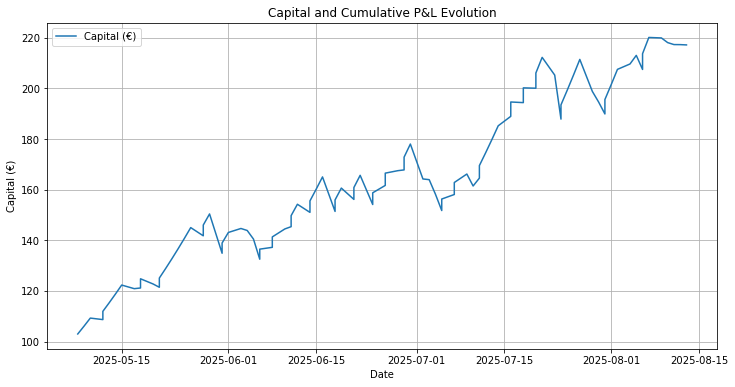

In [38]:
df_log, df_capital_hist = backtest_high_volatility_dynamic_3(df_recent, vol_window=7, max_vol=0.1, intraday_threshold=0.03)

In [39]:
df_log

date_buy  date_sell ticker     buy_price    sell_price            action  \
0  2025-05-08 2025-05-08    FTT  1.008200e+00  1.038446e+00   SELL (intraday)   
1  2025-05-09 2025-05-09    ETH  2.178810e+03  2.244174e+03   SELL (intraday)   
2  2025-05-10 2025-05-10  WEMIX  3.651900e-01  3.761457e-01   SELL (intraday)   
3  2025-05-11 2025-05-12   IOTX  2.161780e-02  2.150000e-02  SELL (next open)   
4  2025-05-12 2025-05-12   IOTX  2.150000e-02  2.214500e-02   SELL (intraday)   
..        ...        ...    ...           ...           ...               ...   
92 2025-08-08 2025-08-09    NFT  4.751370e-07  4.747420e-07  SELL (next open)   
93 2025-08-09 2025-08-10  WEMIX  8.010400e-01  7.943180e-01  SELL (next open)   
94 2025-08-10 2025-08-11    NFT  4.751900e-07  4.734950e-07  SELL (next open)   
95 2025-08-11 2025-08-12    NFT  4.734950e-07  4.734470e-07  SELL (next open)   
96 2025-08-12 2025-08-13    NFT  4.734470e-07  4.732000e-07  SELL (next open)   

         pnl  cumulative_pnl  capital_after_trade  
0   3.000000        3.000000           103.000000  
1   3.090000        6.090000           106.090000  
2   3.182700        9.272700           109.272700  
3  -0.595450        8.677250           108.677250  
4   3.260317       11.937567           111.937567  
..       ...             ...                  ...  
92 -0.182957      119.892294           219.892294  
93 -1.845246      118.047048           218.047048  
94 -0.777773      117.269275           217.269275  
95 -0.022025      117.247250           217.247250  
96 -0.113339      117.133910           217.133910  

[97 rows x 9 columns]

The results are even better: +123% in 3 months.

I’m looking to do some research/statistics on this algorithm:

In [40]:
def distrib_daily_gap(df):
    series = df['%daily-gap/high'].dropna()

    # Descriptive statistics
    print(series.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]))

    # Histogram
    plt.figure(figsize=(10,6))
    plt.hist(series, bins=100, edgecolor='black', alpha=0.7)
    plt.title("Distribution of %daily-gap/high")
    plt.xlabel("%daily-gap/high")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Boxplot (to visualize outliers)
    plt.figure(figsize=(8,4))
    plt.boxplot(series, vert=False, showfliers=True)
    plt.title("Boxplot of %daily-gap/high")
    plt.xlabel("%daily-gap/high")
    plt.show()

count    105.000000
mean       0.067213
std        0.031239
min        0.019260
1%         0.021902
5%         0.030745
25%        0.043456
50%        0.063823
75%        0.080796
95%        0.117934
99%        0.156748
max        0.221592
Name: %daily-gap/high, dtype: float64


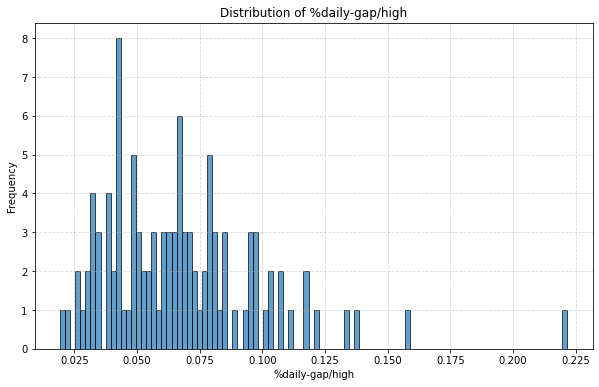

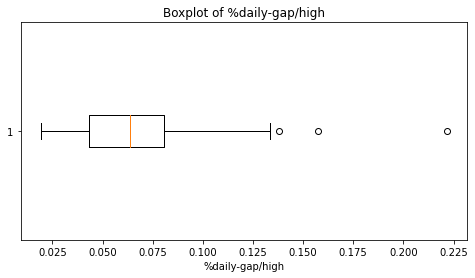

In [41]:
distrib_daily_gap(df_recent[df_recent['ticker'] == 'HBAR'])

I now want to analyze the performance by quarter:


In [45]:
# Assume your DataFrame is called df
df_all["date"] = pd.to_datetime(df_all["date"])   # ensure the column is datetime
df_all = df_all[df_all["date"] >= "2024-01-01"]  # keep only from 2024 onwards

# Add a "quarter" column like "2024Q1", "2024Q2", etc.
df_all["quarter"] = df_all["date"].dt.to_period("Q")

# Split into a dictionary of DataFrames
dfs_by_quarter = {str(q): g for q, g in df_all.groupby("quarter")}

# Example: access Q1 2024
df_q1_2024 = dfs_by_quarter["2024Q1"]

# Check available keys
print(dfs_by_quarter.keys())

dict_keys(['2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2', '2025Q3'])


Backtest for 2024Q1 ...


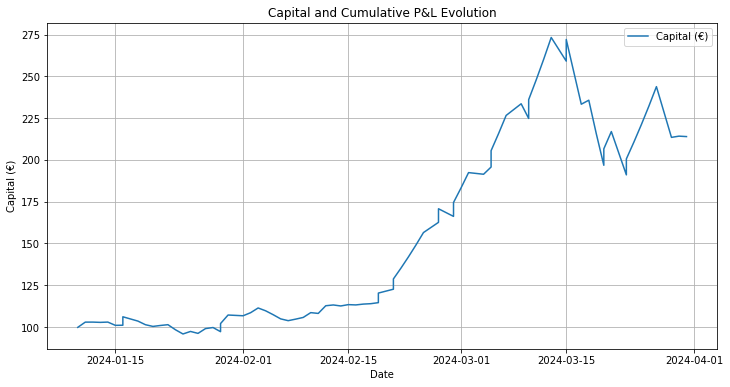

Backtest for 2024Q2 ...


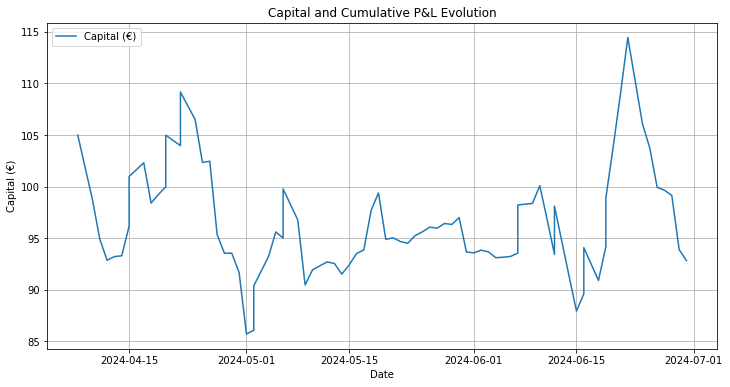

Backtest for 2024Q3 ...


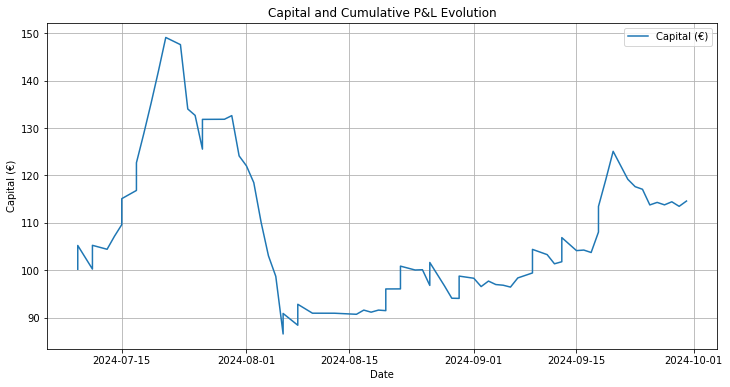

Backtest for 2024Q4 ...


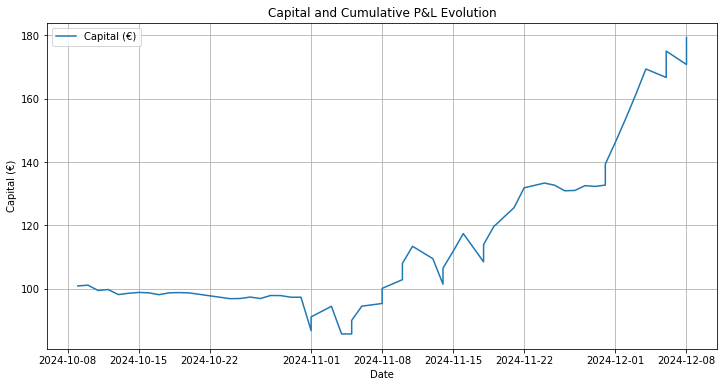

Backtest for 2025Q1 ...


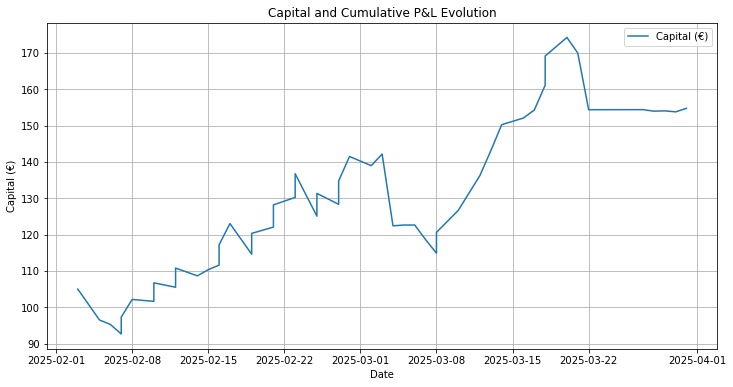

Backtest for 2025Q2 ...


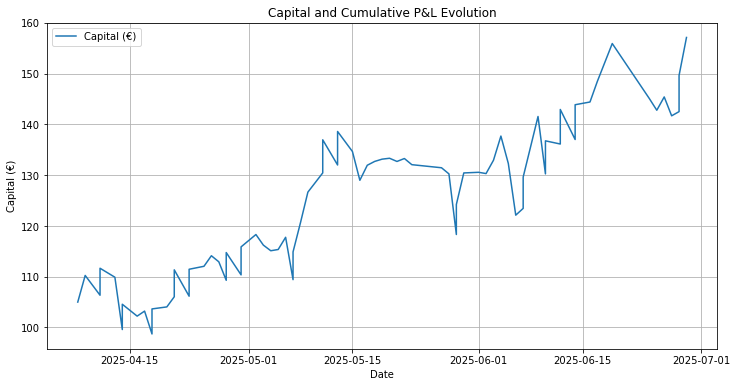

Backtest for 2025Q3 ...


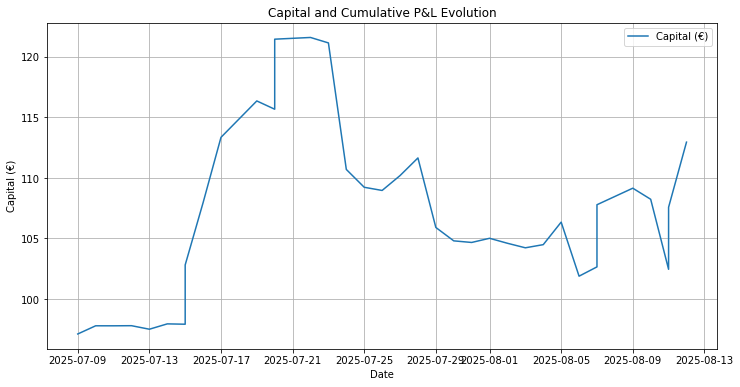

Available quarters: dict_keys(['2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2', '2025Q3'])


In [47]:
# Dictionaries to store results by quarter
logs_by_quarter = {}
capital_by_quarter = {}

for quarter, df_quarter in dfs_by_quarter.items():
    print(f"Backtest for {quarter} ...")
    
    df_log, df_capital_hist = backtest_high_volatility_dynamic_3(
        df_quarter,
        start_capital=100,
        vol_window=7,
        intraday_threshold=0.05,
        max_vol=0.08, max_vol_vol=0.1
    )
    logs_by_quarter[quarter] = df_log
    capital_by_quarter[quarter] = df_capital_hist

# Check available keys
print("Available quarters:", logs_by_quarter.keys())


I now want to find the optimal parameters for my backtest_high_volatility_dynamic_3 algorithm. The current search takes too long and seems inefficient. The parameter search should instead be performed over shorter periods, such as individual quarters.

In [ ]:
def objective_optuna(trial):
    vol_window = trial.suggest_int("vol_window", 5, 30)
    intraday_threshold = trial.suggest_uniform("intraday_threshold", 0.01, 0.1)
    max_vol = trial.suggest_uniform("max_vol", 0.05, 0.15)
    max_vol_vol = trial.suggest_uniform("max_vol_vol", 0.05, 0.2)

    return objective(vol_window, intraday_threshold, max_vol, max_vol_vol)

study = optuna.create_study(direction="maximize")
study.optimize(objective_optuna, n_trials=200)

print("Best params:", study.best_params)
print("Best final capital:", study.best_value)

In [48]:
def objective(vol_window, intraday_threshold, max_vol, max_vol_vol):
    df_log, df_capital_hist = backtest_high_volatility_dynamic_3(
        df_all,
        start_capital=100,
        vol_window=vol_window,
        intraday_threshold=intraday_threshold,
        max_vol=max_vol,
        max_vol_vol=max_vol_vol
    )
    if df_capital_hist.empty:
        return -1e9  # penalty if no trades

    final_capital = df_capital_hist["capital"].iloc[-1]
    return final_capital


After a very long run (which I’m not including in this notebook) over the period from May to August, I obtained the following results:
Best params: {'vol_window': 27, 'intraday_threshold': 0.07156058384078295, 'max_vol': 0.09320537151243538, 'max_vol_vol': 0.13069416227798666}

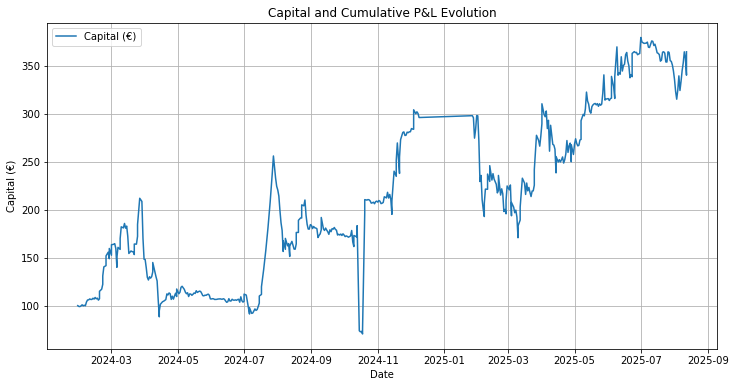

In [49]:
df_log, df_capital_hist=backtest_high_volatility_dynamic_3(df_all,start_capital=100,vol_window=27,intraday_threshold=0.07156,max_vol=0.0932,max_vol_vol=0.13)

In [50]:
#Export the trades log to Excel

df_log.to_excel("df_log.xlsx", index=False)
print("✅ df_log exported to Excel as 'df_log.xlsx'")

✅ df_log exported to Excel as 'df_log.xlsx'


The capital showed some critical points. I’m going to run some statistics on it to identify inconsistencies and, finally, determine whether this strategy works using statistical tests.

In [59]:
df = pd.read_excel("PNL file.xlsx")

# Extract the trend
pnl = df["Trend"].dropna().values

I’m using boostrap method to simulate the sample over a larger population and extract more meaningful statistics.


In [60]:
n_iter = 10000
n = len(pnl)
means = []
for _ in range(n_iter):
    sample = np.random.choice(pnl, size=n, replace=True)
    means.append(sample.mean())
means = np.array(means)

In [61]:
ci_low, ci_high = np.percentile(means, [2.5, 97.5])
print("95% CI:", ci_low, ci_high)
print("Empirical mean:", pnl.mean())

95% CI: -0.0011836931549530137 0.013853660830455989
Empirical mean: 0.005330364689893813


In [62]:
p_value = np.mean(means <= 0)
print("p-value:", p_value)

p-value: 0.0636


It is not significant.


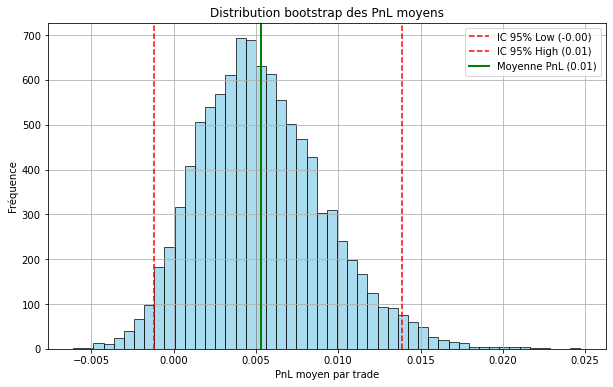

In [63]:
# Plot
plt.figure(figsize=(10,6))
plt.hist(means, bins=50, color='skyblue', edgecolor='k', alpha=0.7)
plt.axvline(ci_low, color='red', linestyle='--', label=f"IC 95% Low ({ci_low:.2f})")
plt.axvline(ci_high, color='red', linestyle='--', label=f"IC 95% High ({ci_high:.2f})")
plt.axvline(np.mean(pnl), color='green', linestyle='-', linewidth=2, label=f"Moyenne PnL ({np.mean(pnl):.2f})")
plt.title("Distribution bootstrap des PnL moyens")
plt.xlabel("PnL moyen par trade")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

I realized that there are missing data for December. I’m going to test the algorithm in two parts.


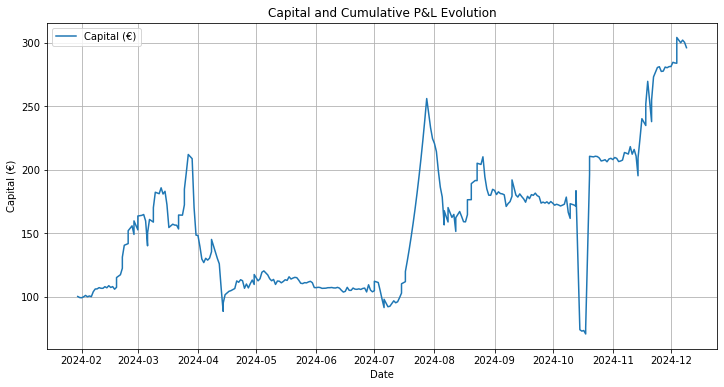

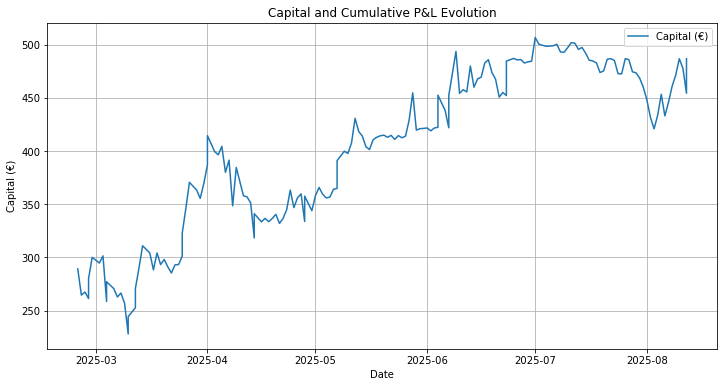

In [65]:
# First period
df_2024 = df_all[(df_all['date'] <= '2024-12-09')]
df_log1, df_capital_hist1 = backtest_high_volatility_dynamic_3(
    df_2024,
    start_capital=100,
    vol_window=27,
    intraday_threshold=0.07156,
    max_vol=0.0932,
    max_vol_vol=0.13
)

# Final capital at the end of the first period
final_capital_2024 = df_capital_hist1['capital'].iloc[-1]

# Second period
df_2025 = df_all[(df_all['date'] >= '2025-01-01')]
df_log2, df_capital_hist2 = backtest_high_volatility_dynamic_3(
    df_2025,
    start_capital=final_capital_2024,
    vol_window=27,
    intraday_threshold=0.07156,
    max_vol=0.0932,
    max_vol_vol=0.13
)

# Concatenate logs if needed
df_log = pd.concat([df_log1, df_log2], ignore_index=True)
df_capital_hist = pd.concat([df_capital_hist1, df_capital_hist2], ignore_index=True)


In [66]:
df_log

date_buy  date_sell ticker  buy_price  sell_price            action  \
0   2024-01-29 2024-01-30    LEO   3.775400    3.777040  SELL (next open)   
1   2024-01-30 2024-01-31    LEO   3.777040    3.744960  SELL (next open)   
2   2024-01-31 2024-02-01    LEO   3.744960    3.739940  SELL (next open)   
3   2024-02-01 2024-02-02    JST   0.028834    0.029042  SELL (next open)   
4   2024-02-02 2024-02-03    JST   0.029042    0.029364  SELL (next open)   
..         ...        ...    ...        ...         ...               ...   
481 2025-08-08 2025-08-09    ZIL   0.011424    0.011685  SELL (next open)   
482 2025-08-09 2025-08-10    ZIL   0.011685    0.012071  SELL (next open)   
483 2025-08-10 2025-08-11    ZIL   0.012071    0.011851  SELL (next open)   
484 2025-08-11 2025-08-12    ZIL   0.011851    0.011266  SELL (next open)   
485 2025-08-12 2025-08-12    ZIL   0.011266    0.012072   SELL (intraday)   

           pnl  cumulative_pnl  capital_after_trade  
0     0.043439        0.043439           100.043439  
1    -0.849711       -0.806272            99.193728  
2    -0.132966       -0.939238            99.060762  
3     0.713913       -0.225325            99.774675  
4     1.109004        0.883679           100.883679  
..         ...             ...                  ...  
481  10.519784      175.067683           471.164571  
482  15.543798      190.611481           486.708369  
483  -8.846457      181.765023           477.861912  
484 -23.603993      158.161030           454.257919  
485  32.506697      190.667727           486.764615  

[486 rows x 9 columns]

The results are not good enough.
Fourth test selection :

In [67]:
def trade_one_day(df, vol_df, current_date, next_date, capital, cumulative_pnl, trades_log, capital_history, intraday_threshold):
    """
    Executes a trading strategy for a single day.
    
    Parameters
    ----------
    df : DataFrame
        Contains at least the columns ['ticker', 'date', 'open', 'high'].
    vol_df : Series
        Series indexed by ticker with filtered volatility.
    current_date : date
        Current buying day.
    next_date : date
        Next day for selling if intraday threshold is not reached.
    capital : float
        Available capital before the trade.
    cumulative_pnl : float
        Cumulative P&L so far.
    trades_log : list
        Trade history (each element is a dict).
    capital_history : list
        History of capital after each trade.
    intraday_threshold : float
        Intraday selling threshold (e.g., 0.02 for +2%).

    Returns
    -------
    capital, cumulative_pnl, trades_log, capital_history
    """

    # Select the ticker with the highest remaining volatility
    best_ticker = vol_df.idxmax()
    df_today = df[(df['ticker'] == best_ticker) & (df['date'] == current_date)]
    df_next = df[(df['ticker'] == best_ticker) & (df['date'] == next_date)]

    if df_today.empty or df_next.empty:
        return capital, cumulative_pnl, trades_log, capital_history

    buy_price = df_today['open'].values[0]
    high_price = df_today['high'].values[0]

    # Intraday sell if threshold is reached
    if high_price >= buy_price * (1 + intraday_threshold):
        sell_price = buy_price * (1 + intraday_threshold)
        action = "SELL (intraday)"
        date_sell = current_date
    else:
        sell_price = df_next['open'].values[0]
        action = "SELL (next open)"
        date_sell = next_date

    position = capital / buy_price
    pnl = (sell_price - buy_price) * position
    cumulative_pnl += pnl
    capital += pnl

    trades_log.append({
        "date_buy": current_date,
        "date_sell": date_sell,
        "ticker": best_ticker,
        "buy_price": buy_price,
        "sell_price": sell_price,
        "action": action,
        "pnl": pnl,
        "cumulative_pnl": cumulative_pnl,
        "capital_after_trade": capital
    })

    capital_history.append({"date": date_sell, "capital": capital})

    return capital, cumulative_pnl, trades_log, capital_history

In [69]:
def backtest_high_volatility_dynamic_4(
    df, start_capital=100, vol_window=7, intraday_threshold=0.05, Q1_selection=0.05, plot=1
):
    """
    Backtest based on %daily-gap/high volatility:
    - Each day, select the ticker with the highest median volatility over the last vol_window days
    - The Q1 of volatility over vol_window must be at least intraday_threshold
    - Buy at the day's open
    - Intraday sell if high >= intraday_threshold
    - Otherwise, sell at the next day's open
    """
    capital = start_capital
    trades_log = []
    capital_history = []

    df = df.sort_values(["ticker", "date"])
    all_dates = df["date"].drop_duplicates().sort_values()

    cumulative_pnl = 0

    for i in range(len(all_dates)-1):
        current_date = all_dates.iloc[i]
        next_date = all_dates.iloc[i+1]

        # Data available up to the previous day
        data = df[df['date'] < current_date]

        if data.empty:
            continue

        # Calculate the highest median and Q1 over the last vol_window days
        Median_df = data.groupby('ticker')['%daily-gap/high'].apply(
            lambda x: np.percentile(x.tail(vol_window), 50) if len(x) >= vol_window else np.nan
        )
        Q1_vol_df = data.groupby('ticker')['%daily-gap/high'].apply(
            lambda x: np.percentile(x.tail(vol_window), 25) if len(x) >= vol_window else np.nan
        )
        
        # Filter tickers according to Q1 and median
        valid_tickers = Median_df[Q1_vol_df > Q1_selection].dropna().index
        vol_df = Median_df[Median_df.index.isin(valid_tickers)]
        
        if vol_df.empty:
            continue

        capital, cumulative_pnl, trades_log, capital_history = trade_one_day(
                        df, vol_df, current_date, next_date,
                        capital, cumulative_pnl, trades_log, capital_history,
                        intraday_threshold)


    df_log = pd.DataFrame(trades_log)
    df_capital_hist = pd.DataFrame(capital_history)
    
    if plot == 1:
        # Capital evolution plot
        plt.figure(figsize=(12,6))
        plt.plot(df_capital_hist['date'], df_capital_hist['capital'], label='Capital (€)')
        plt.title("Capital Evolution and Cumulative P&L")
        plt.xlabel("Date")
        plt.ylabel("Capital (€)")
        plt.grid(True)
        plt.legend()
        plt.show()

    return df_log, df_capital_hist


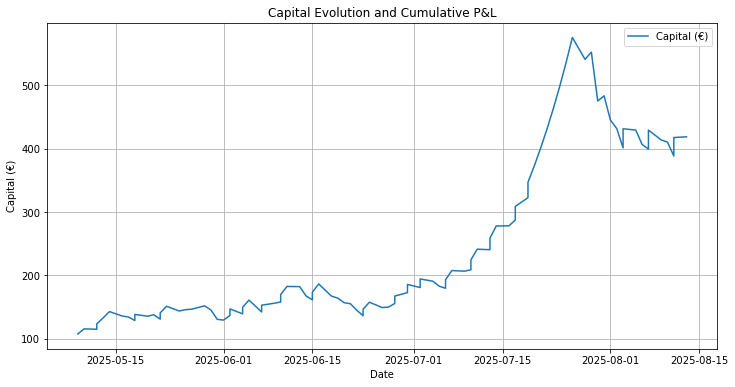

In [70]:
df_log, df_capital_hist=backtest_high_volatility_dynamic_4(
    df_recent, start_capital=100, vol_window=8, intraday_threshold=0.075, Q1_selection = 0.05
)

We can see that this algorithm outperforms the ETH and BTC price movements over the last 3 months, achieving +300%. The goal now is to find the best parameters, so I’m going to run a grid search.


In [73]:
def optimize_params(df, vol_window=8, start_capital=100,
                    intraday_range=np.arange(0.04, 0.10, 0.001),
                    q1_range=np.arange(0.05, 0.07, 0.01)):
    """
    Optimizes intraday_threshold and Q1_selection by testing all combinations.
    
    Returns:
      - results_df: DataFrame with results (final capital for each combination)
      - best_params: tuple (intraday_threshold, Q1_selection, final_capital)
    """

    results = []

    for intraday_threshold, q1_selection in product(intraday_range, q1_range):
        try:
            df_log, df_capital_hist = backtest_high_volatility_dynamic_4(
                df,
                start_capital=start_capital,
                vol_window=vol_window,
                intraday_threshold=intraday_threshold,
                Q1_selection=q1_selection
            )

            # Final capital = last point in the history
            final_capital = df_capital_hist["capital"].iloc[-1] if not df_capital_hist.empty else start_capital

            results.append({
                "intraday_threshold": intraday_threshold,
                "Q1_selection": q1_selection,
                "final_capital": final_capital
            })

        except Exception as e:
            print(f"Error for intraday={intraday_threshold}, Q1={q1_selection}: {e}")

    results_df = pd.DataFrame(results)

    # Find the best combination
    best_row = results_df.loc[results_df["final_capital"].idxmax()]
    best_intraday = best_row["intraday_threshold"]
    best_q1 = best_row["Q1_selection"]
    best_capital = best_row["final_capital"]

    return results_df, (best_intraday, best_q1, best_capital)


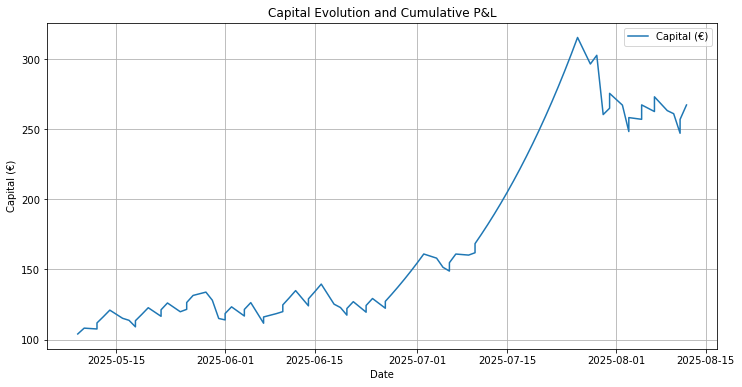

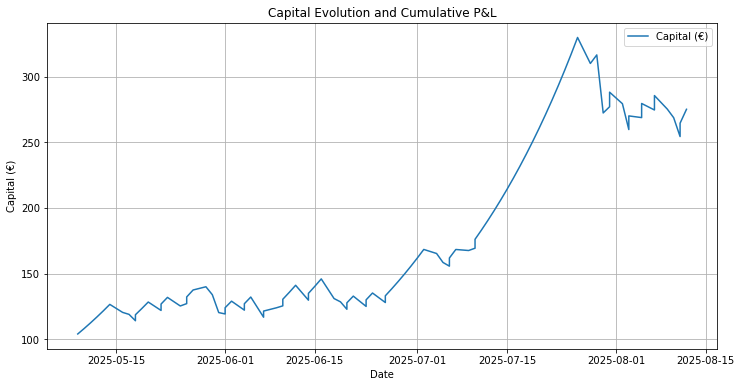

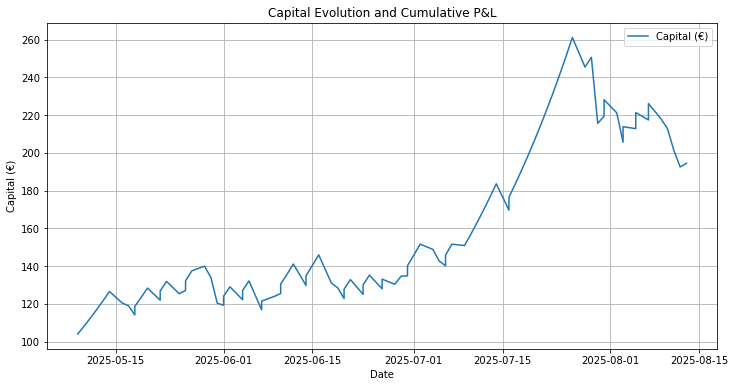

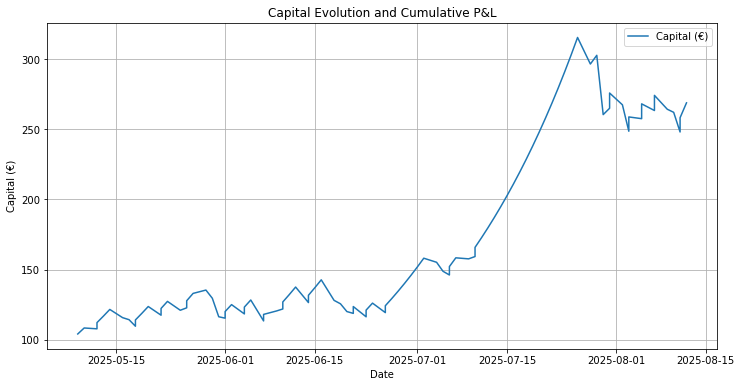

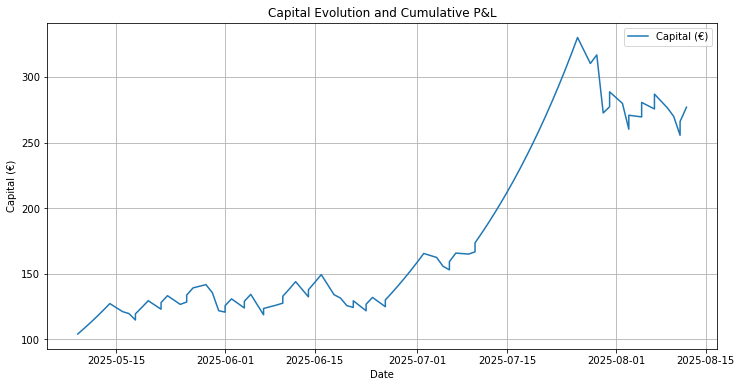

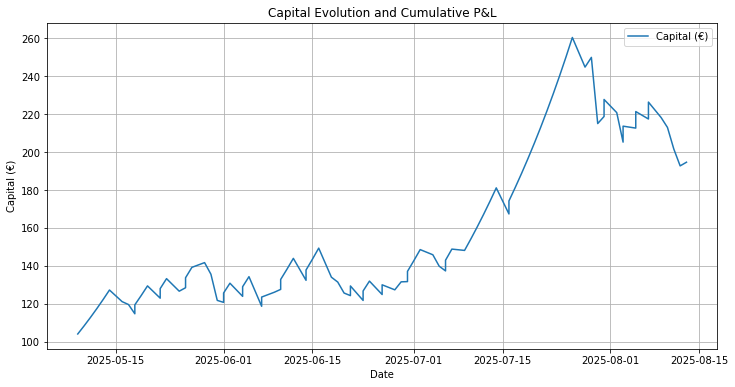

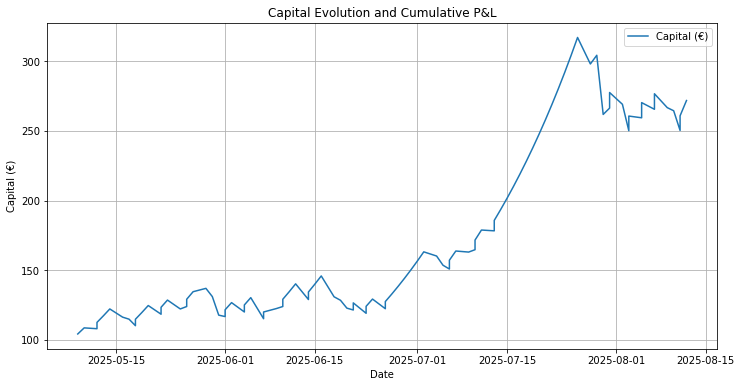

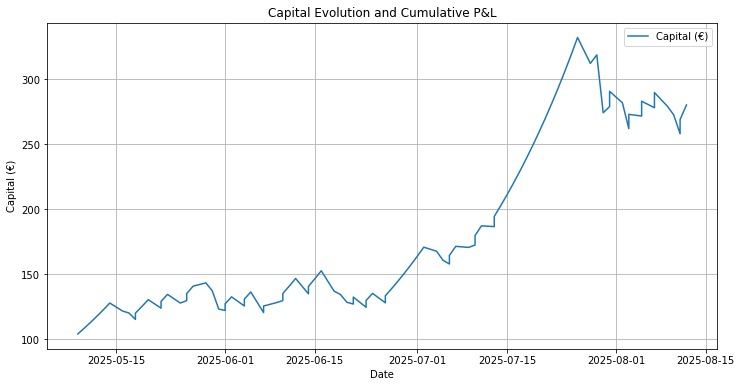

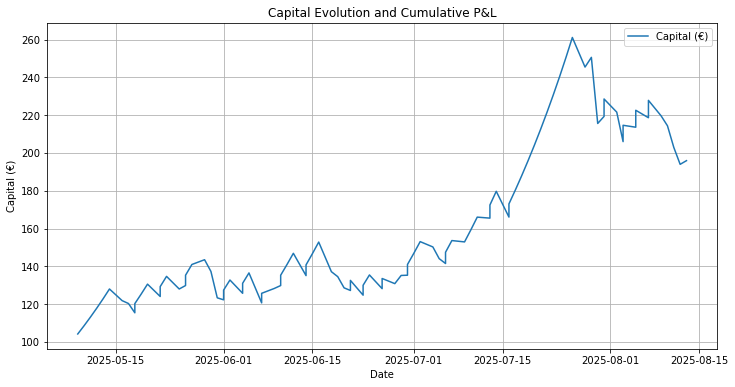

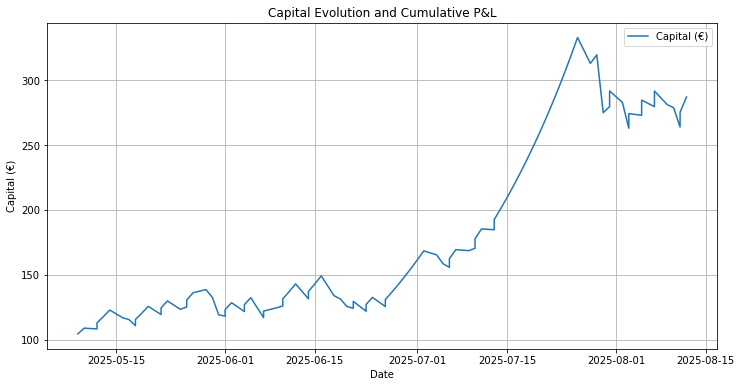

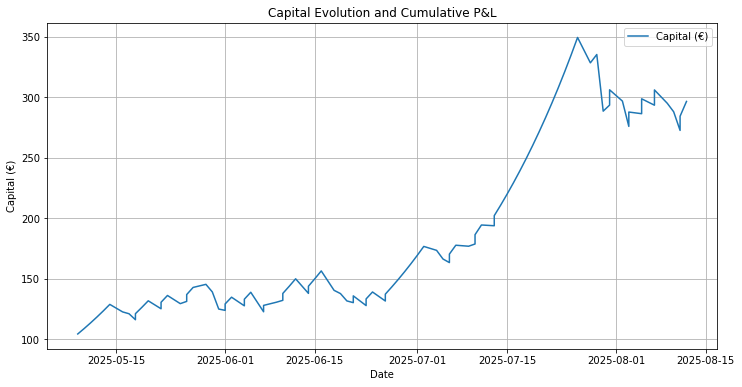

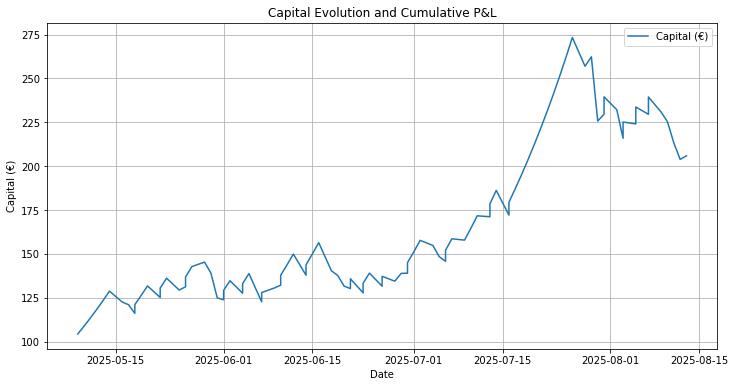

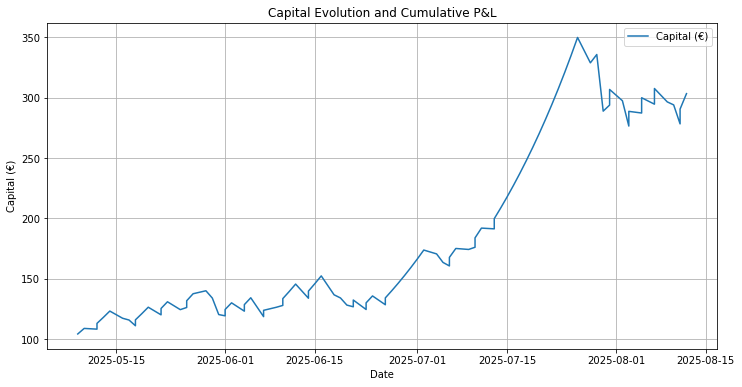

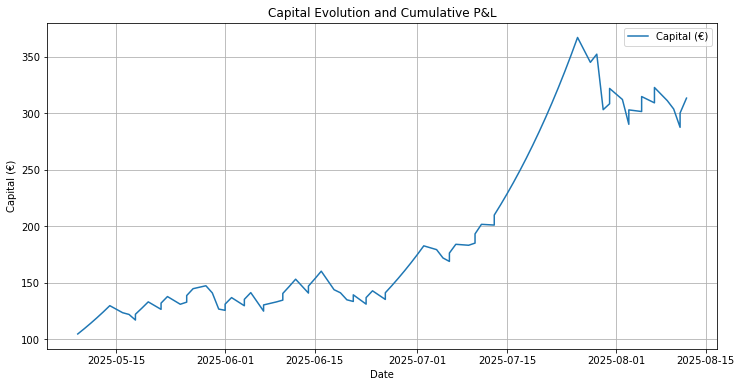

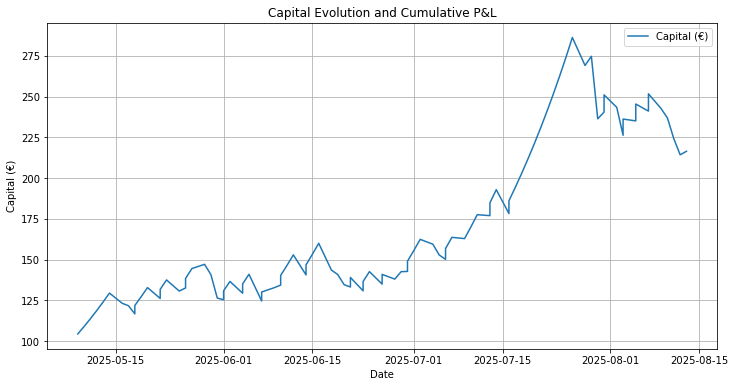

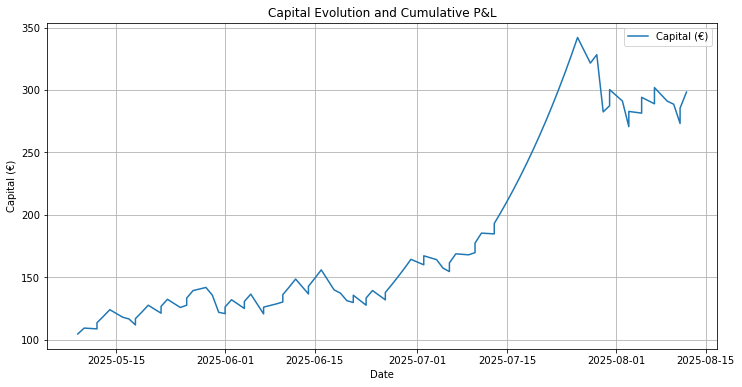

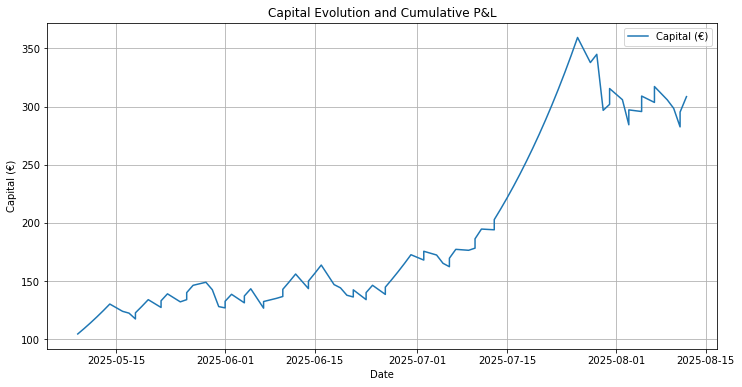

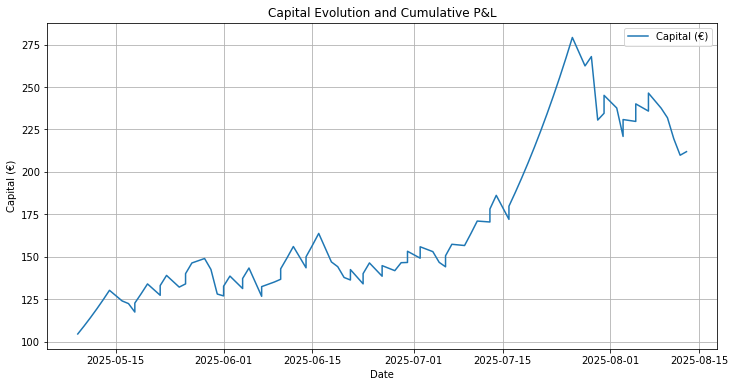

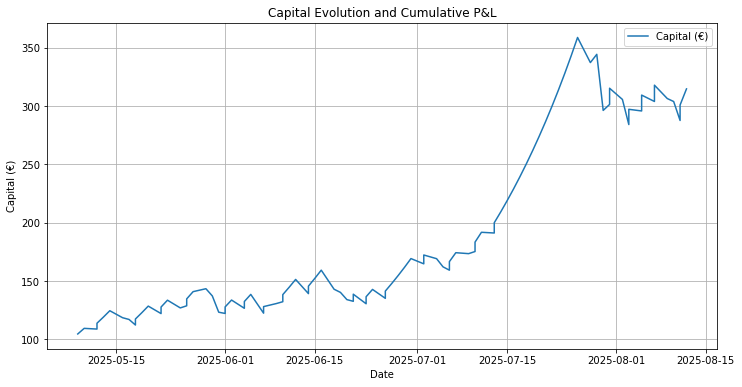

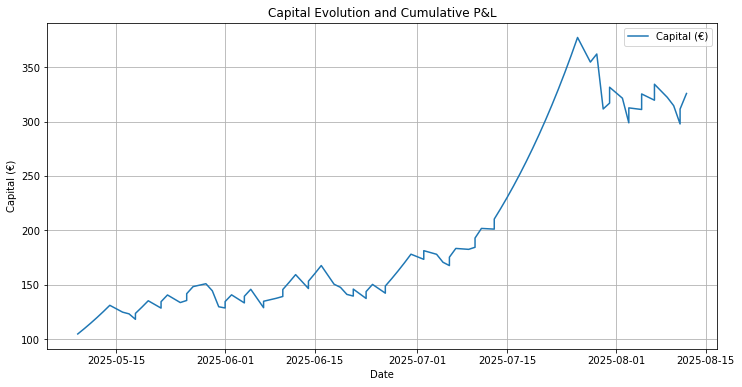

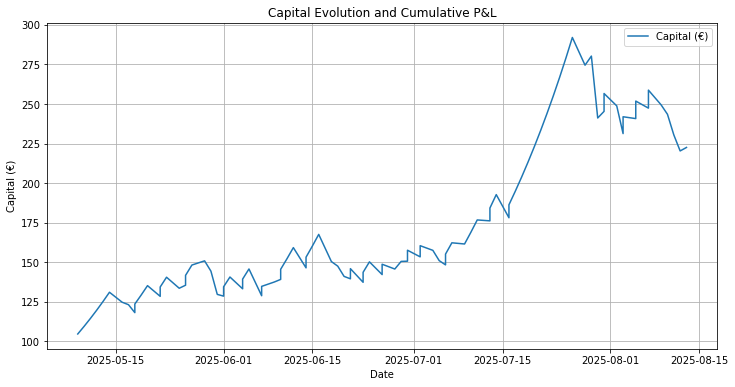

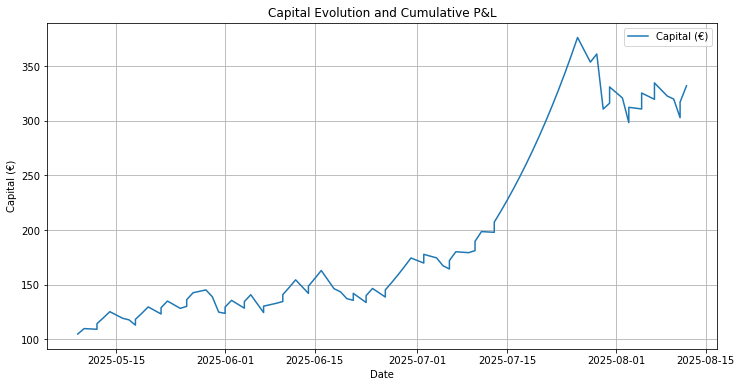

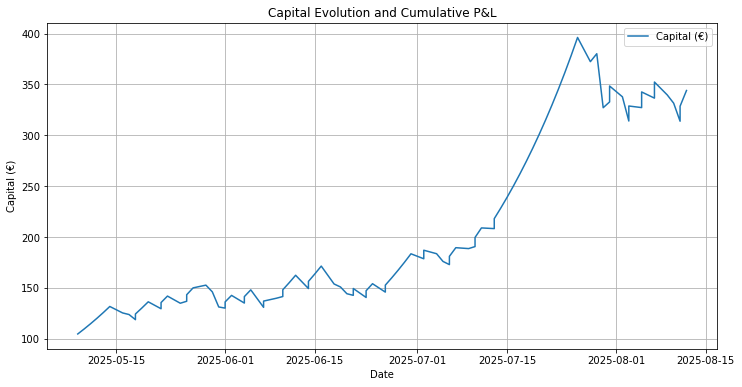

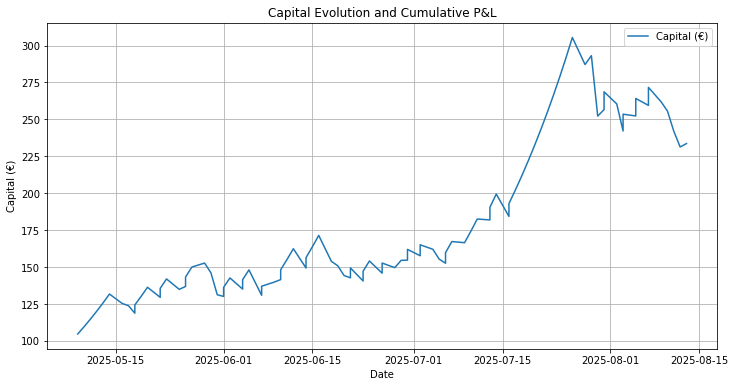

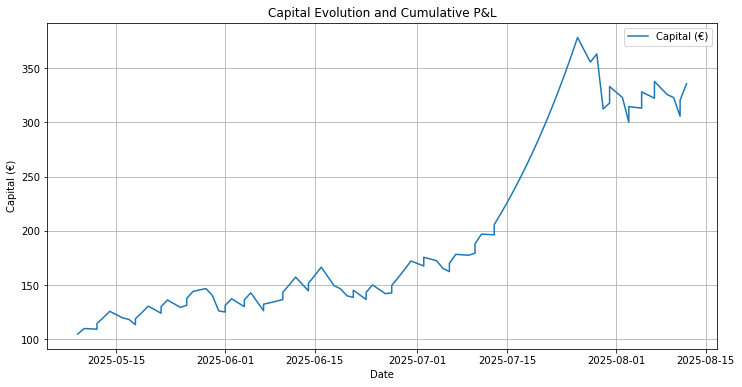

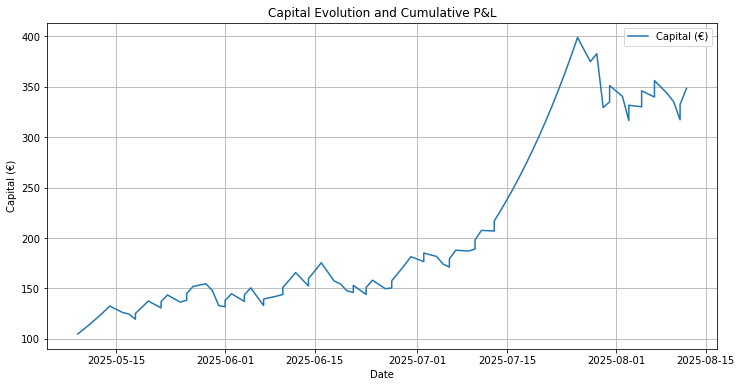

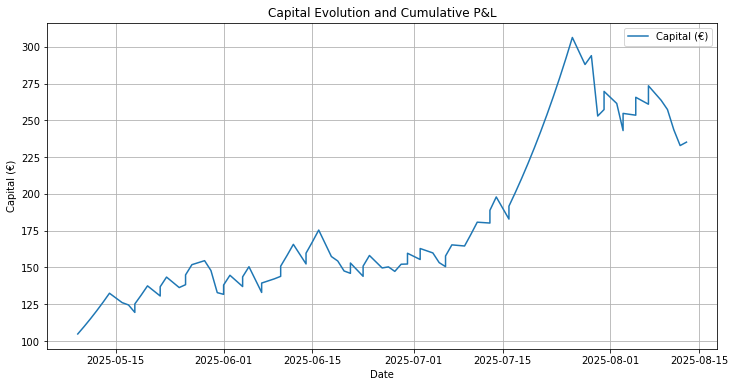

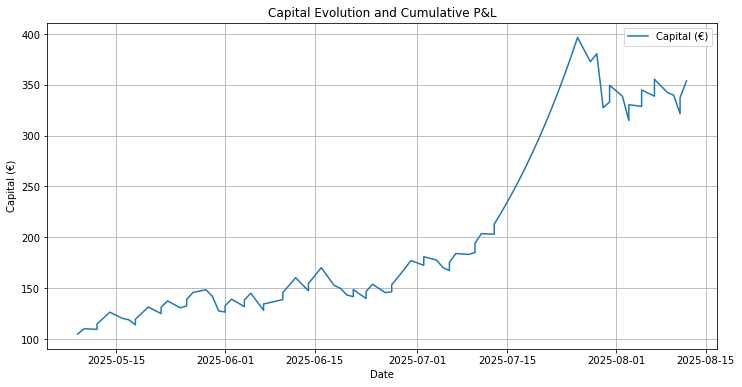

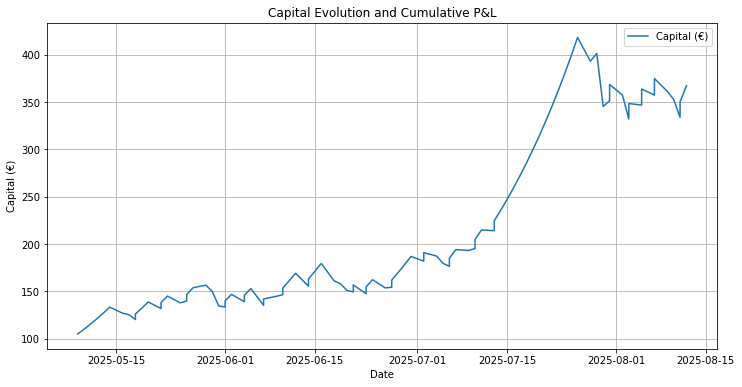

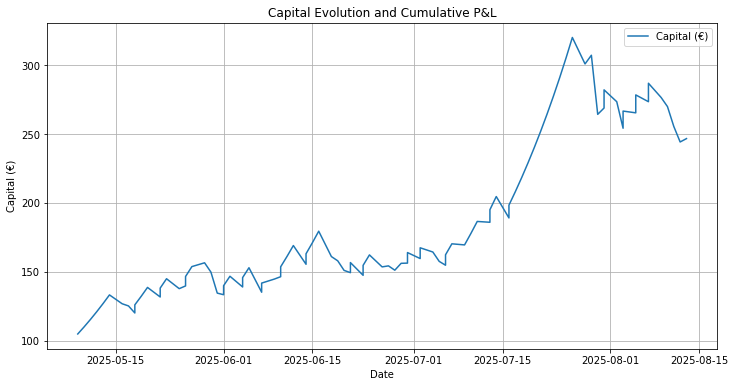

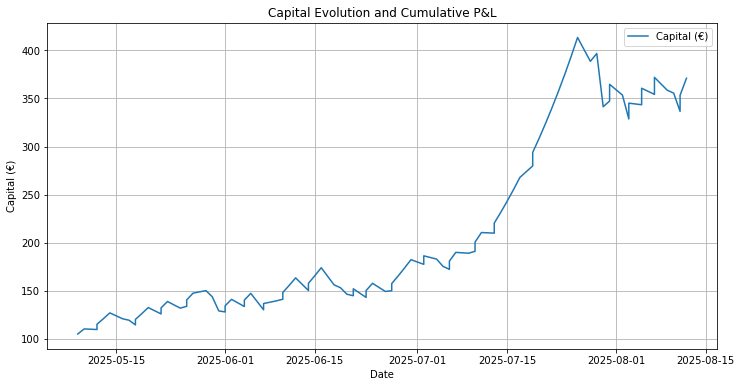

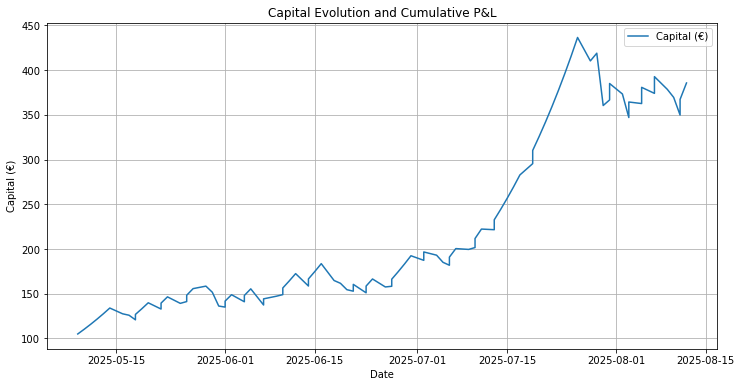

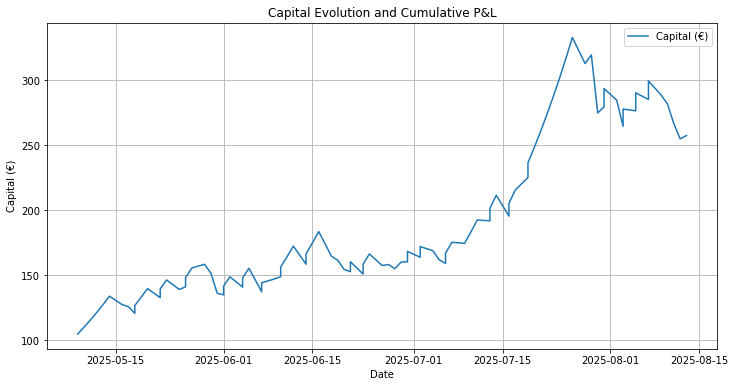

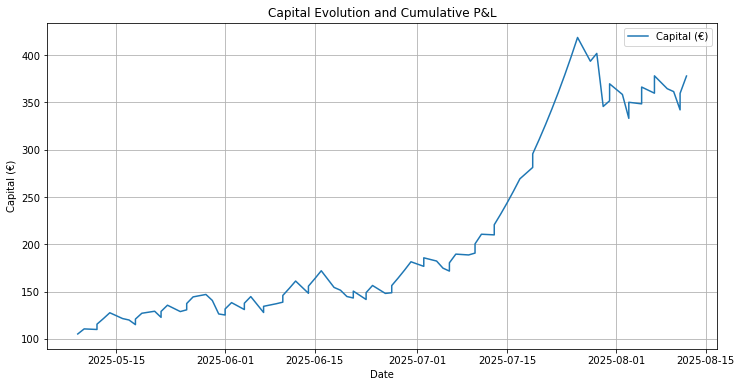

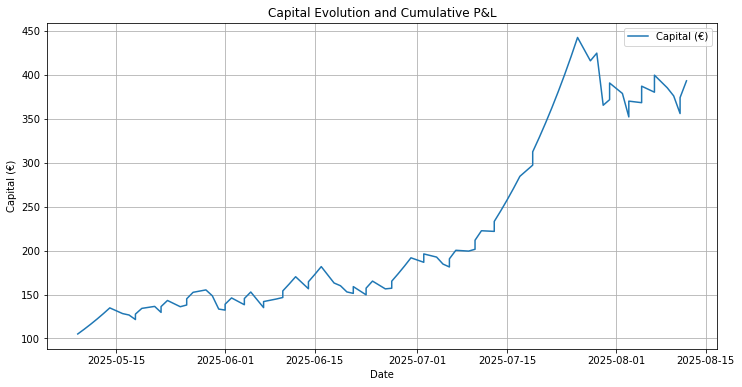

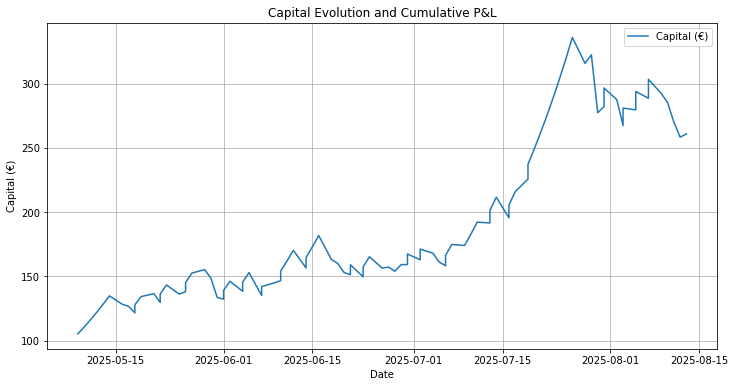

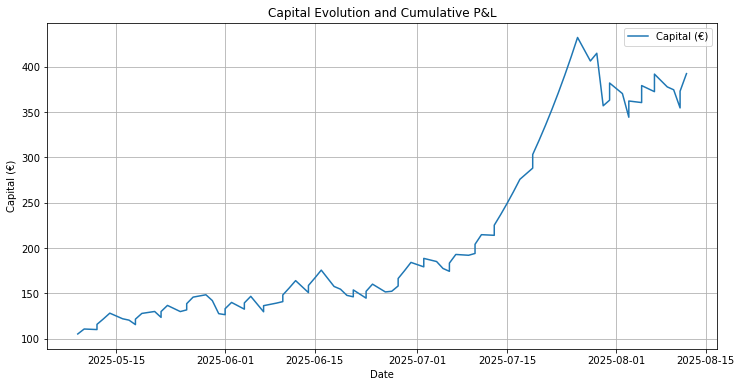

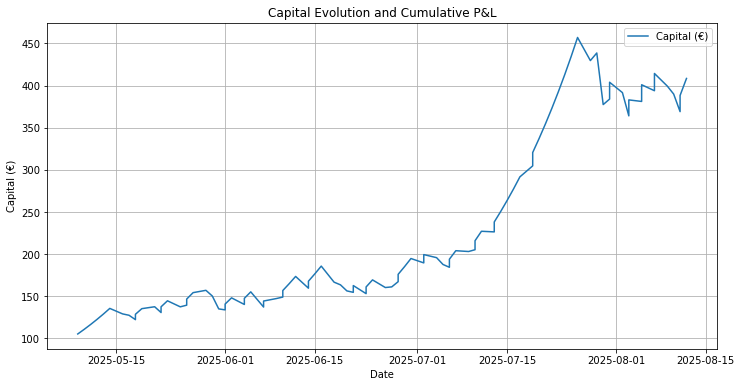

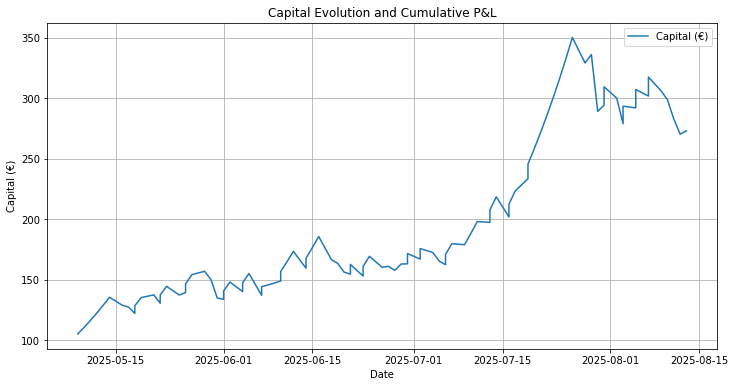

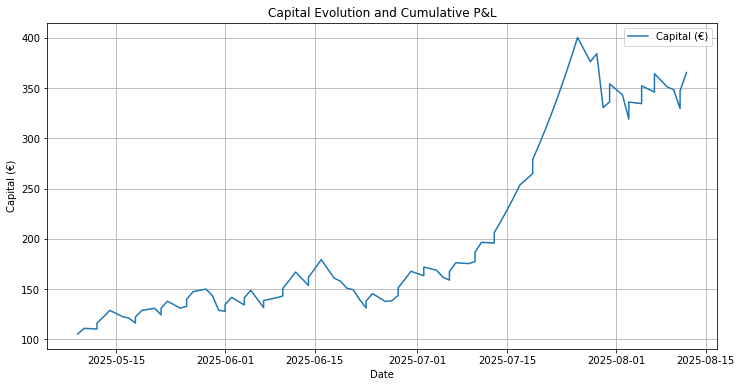

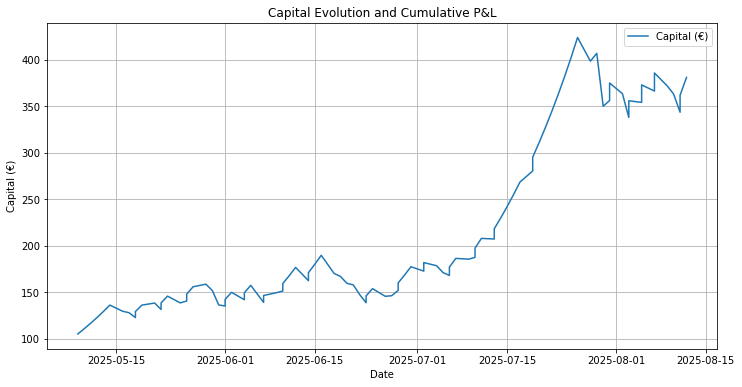

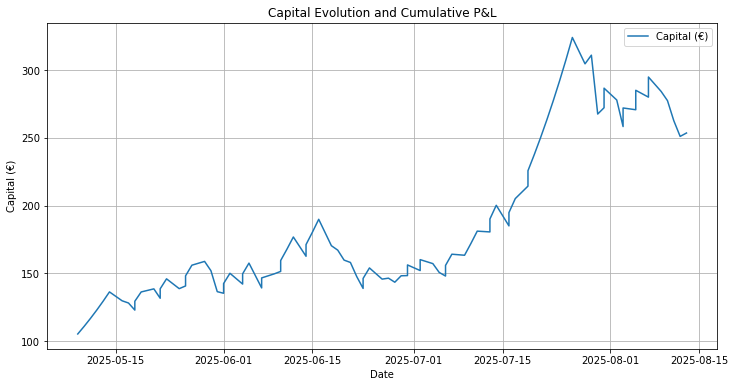

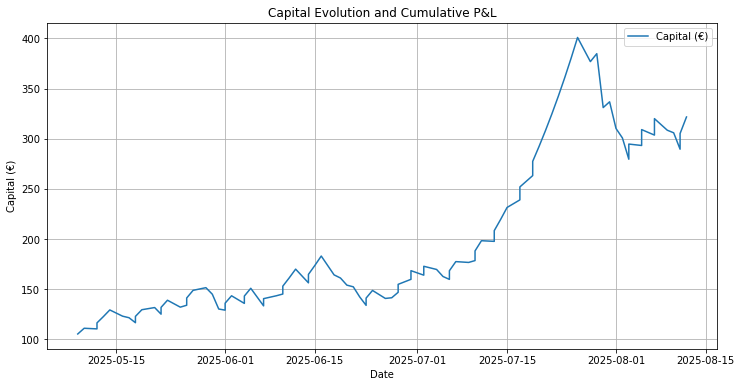

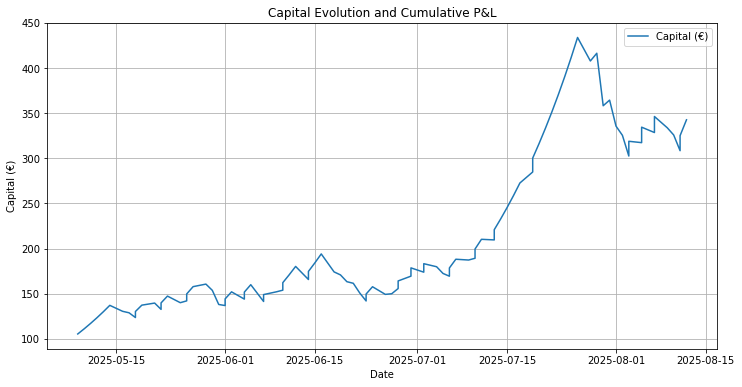

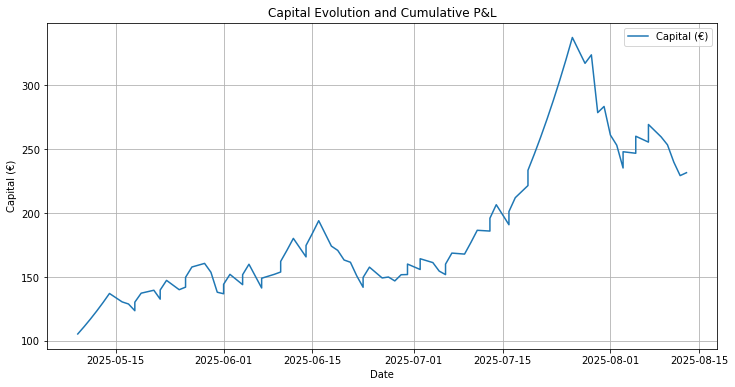

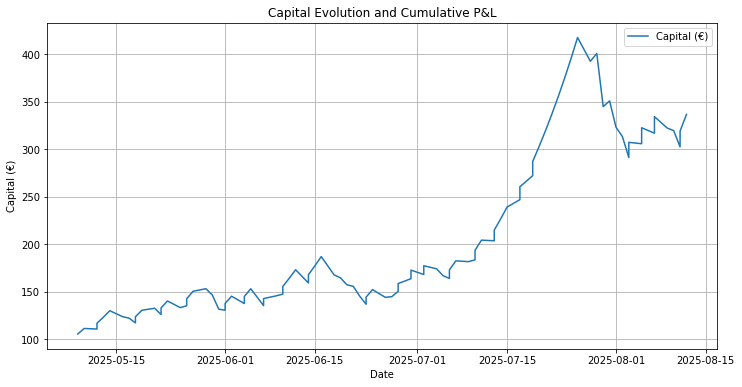

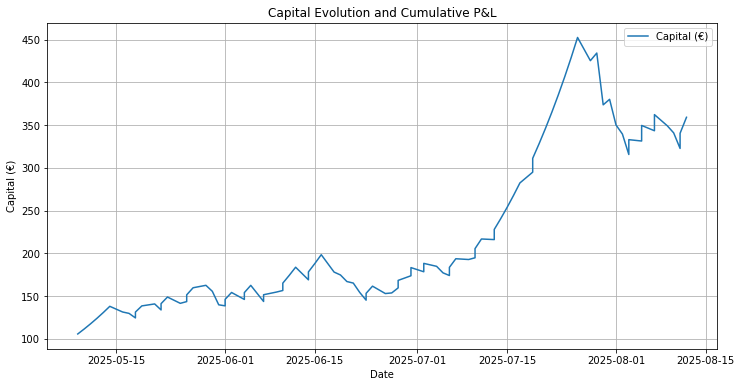

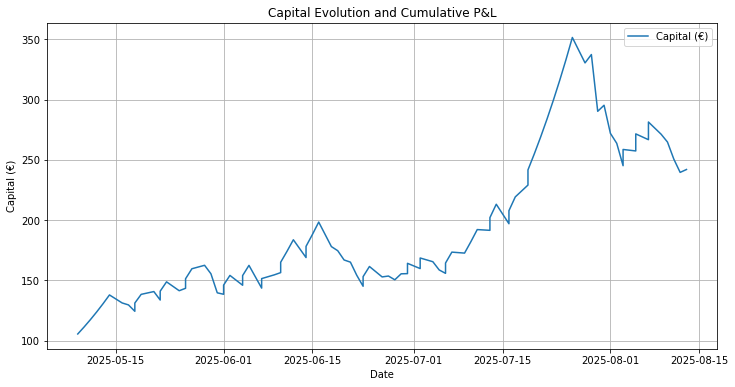

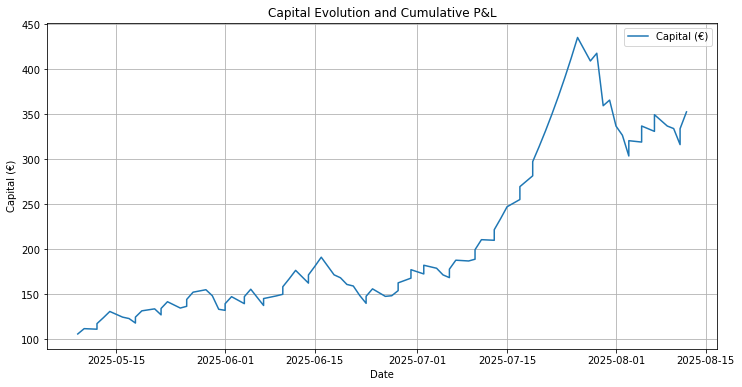

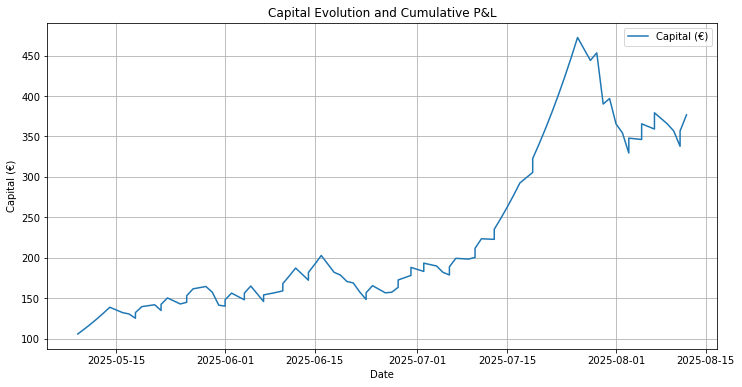

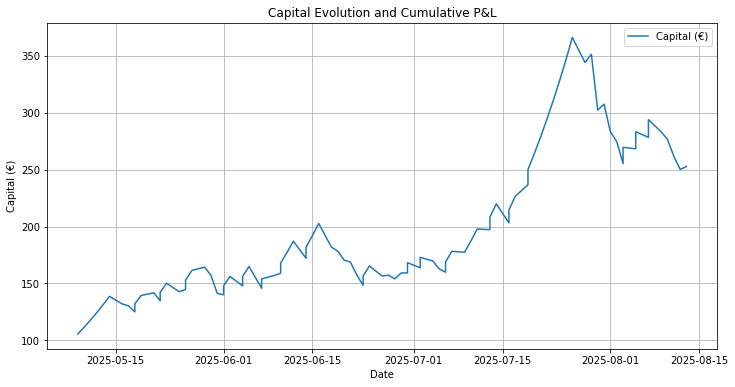

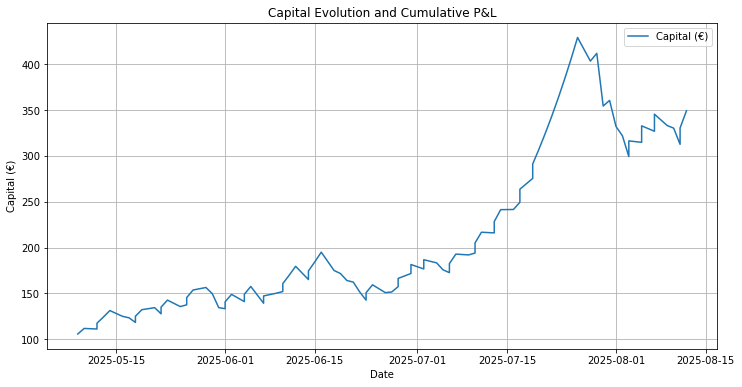

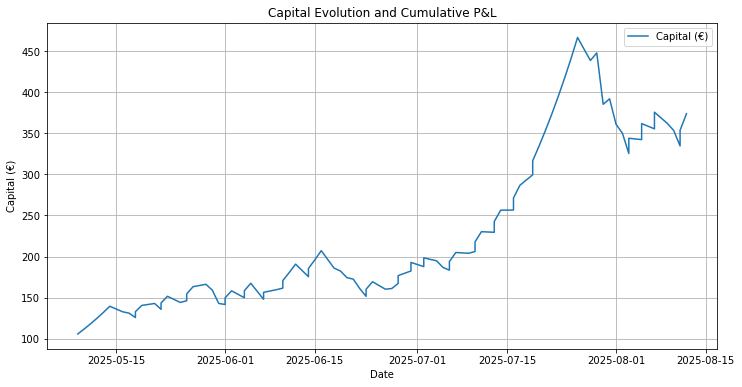

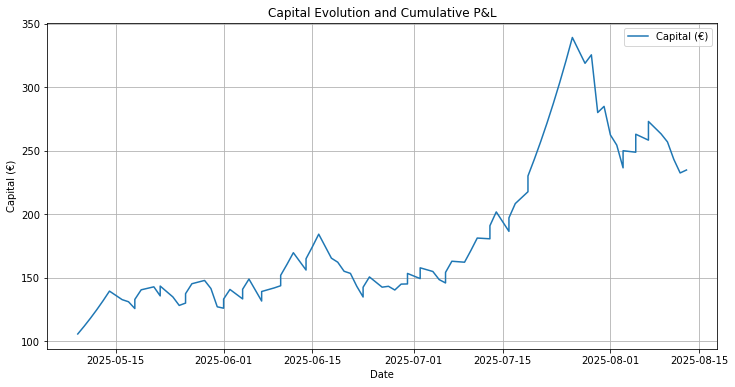

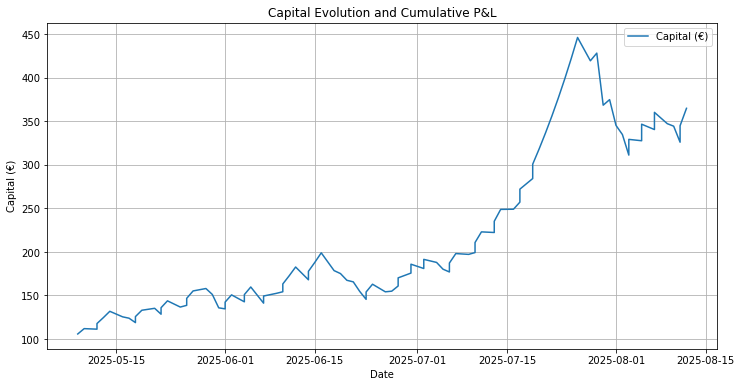

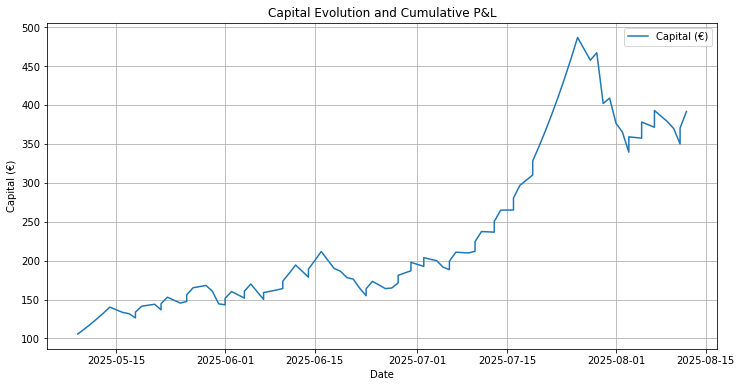

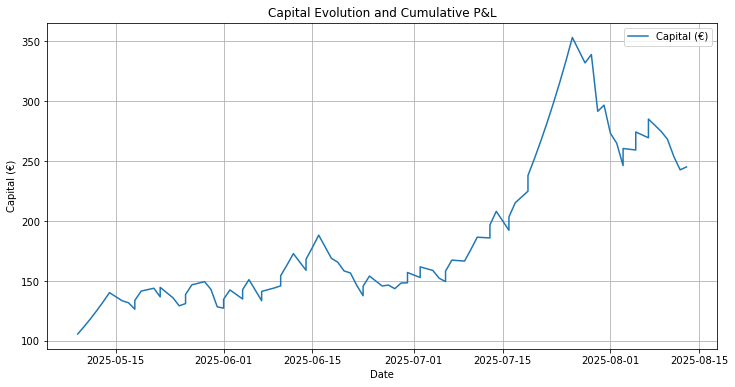

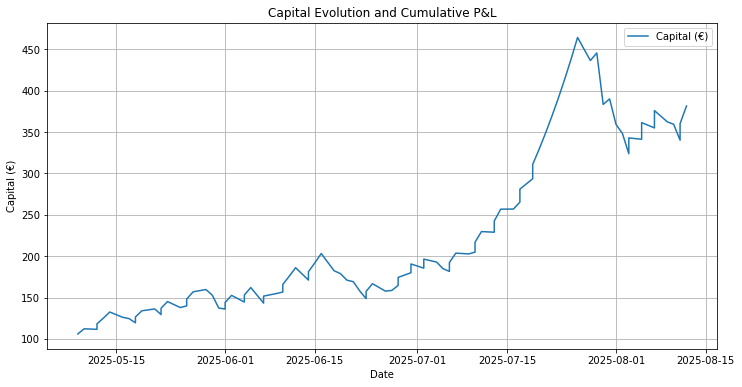

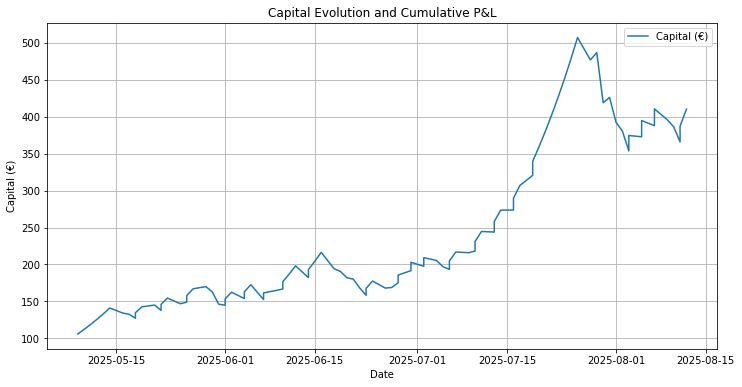

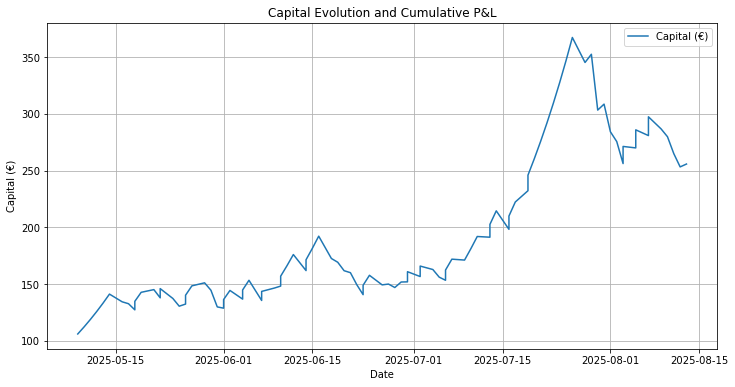

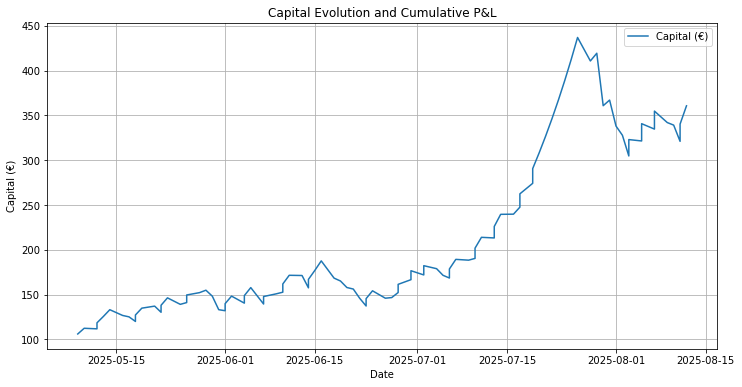

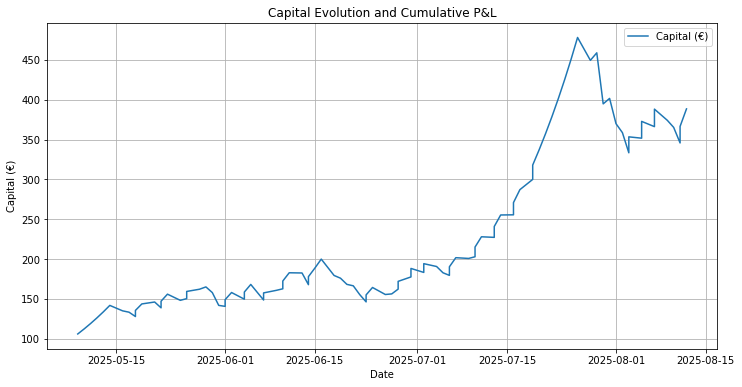

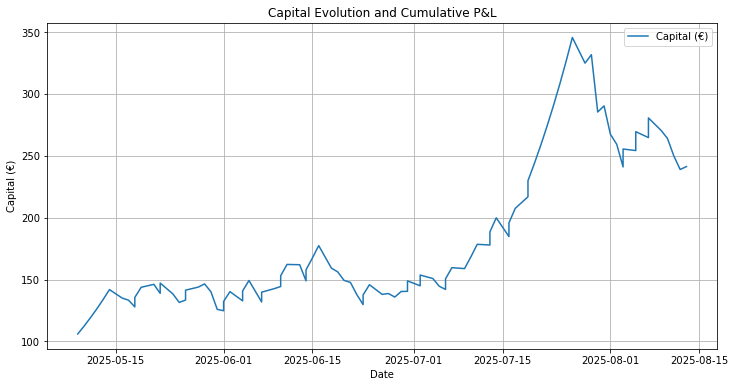

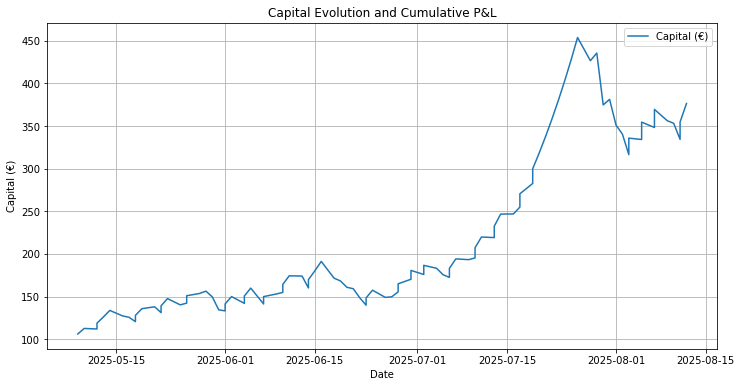

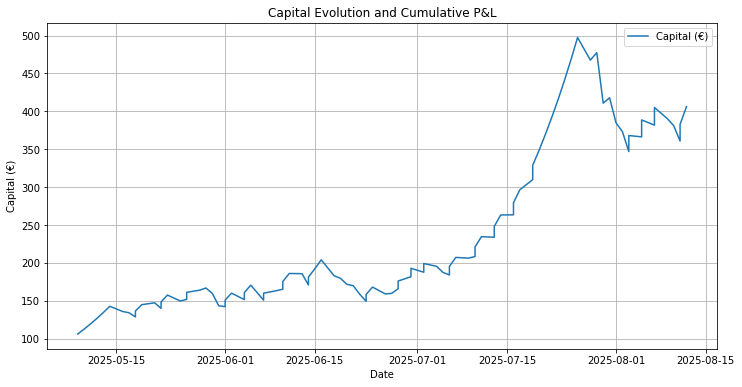

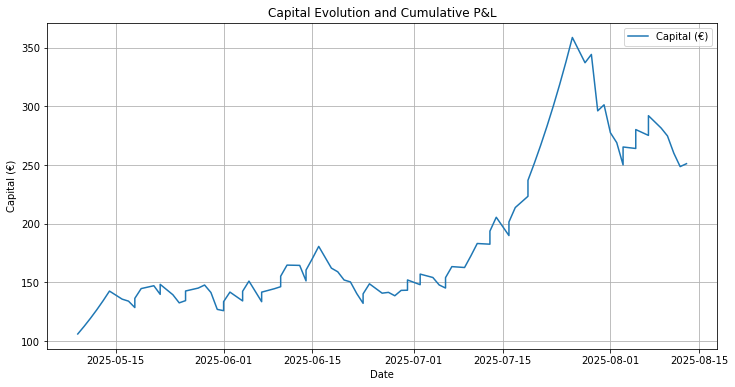

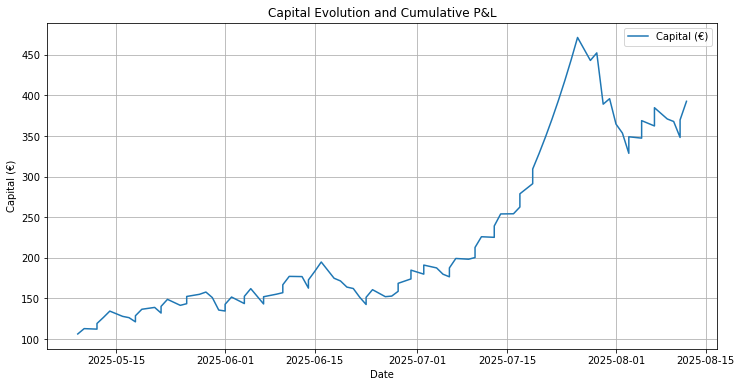

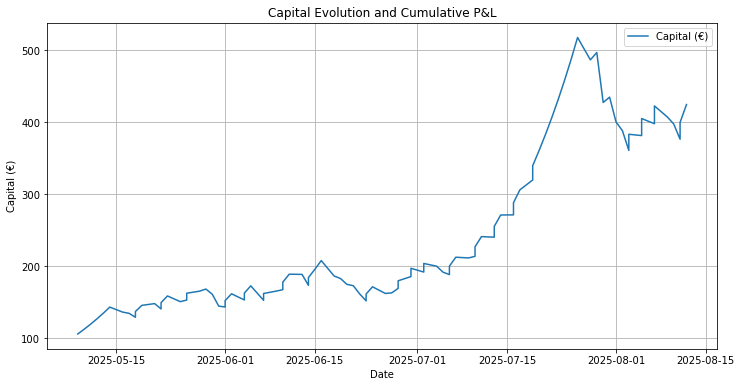

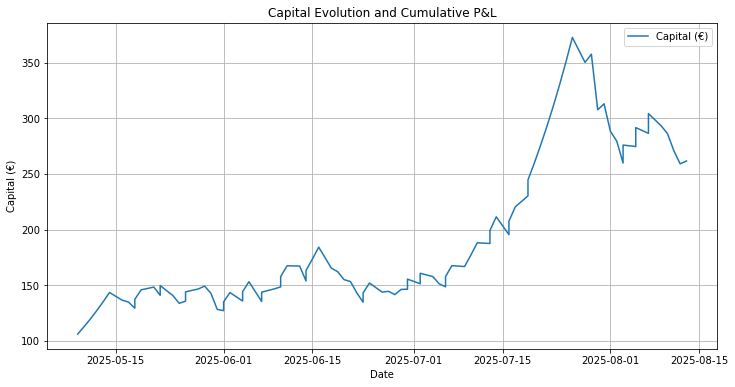

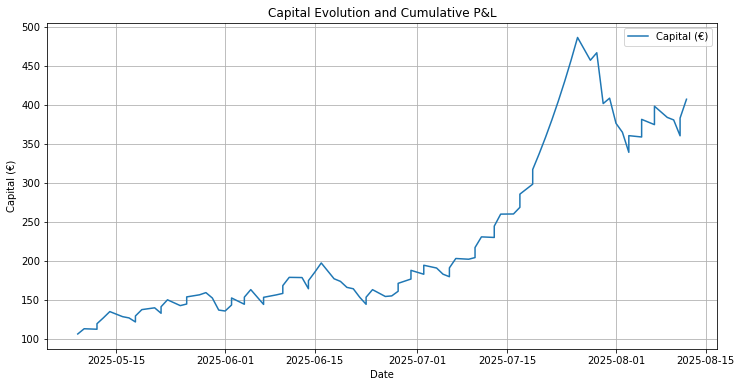

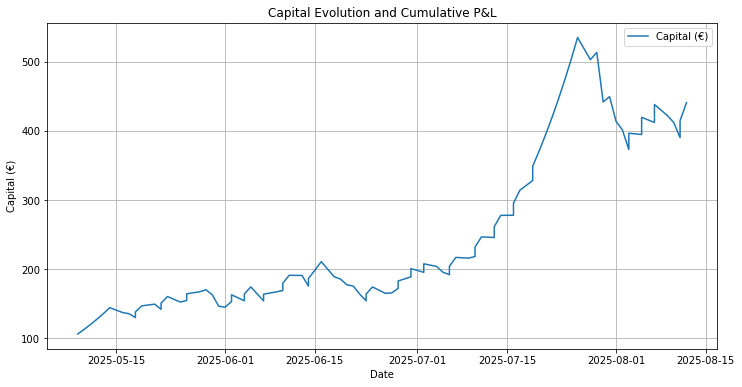

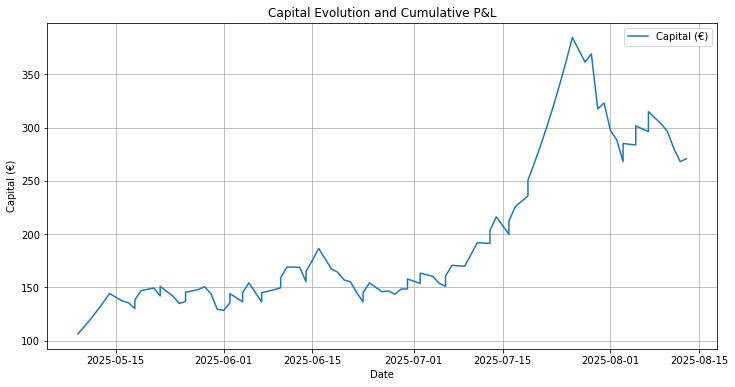

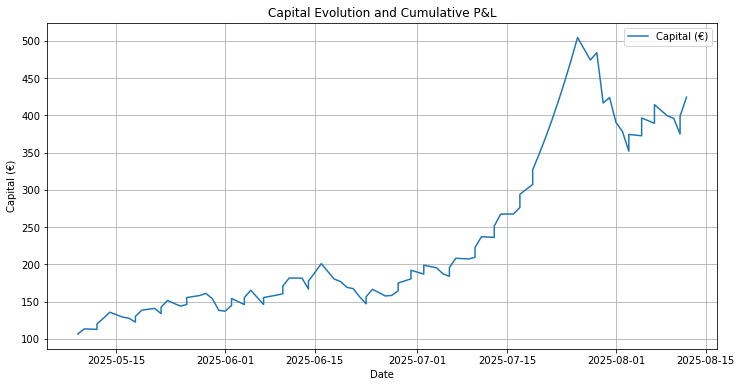

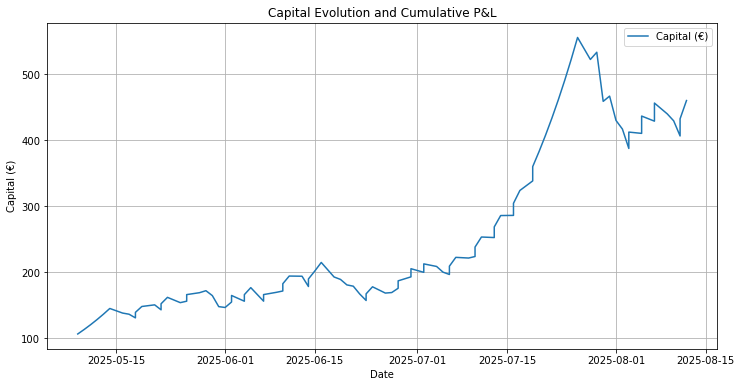

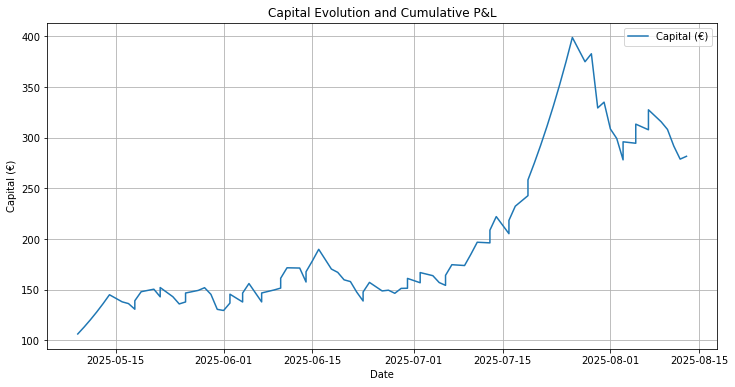

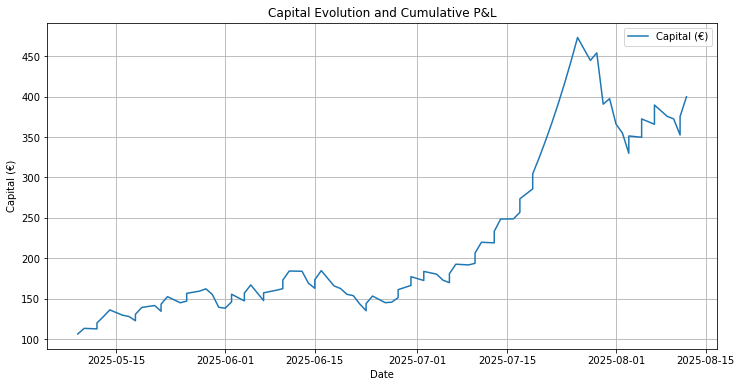

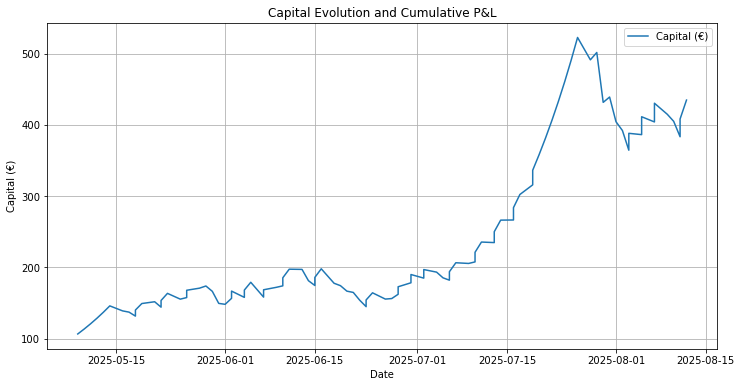

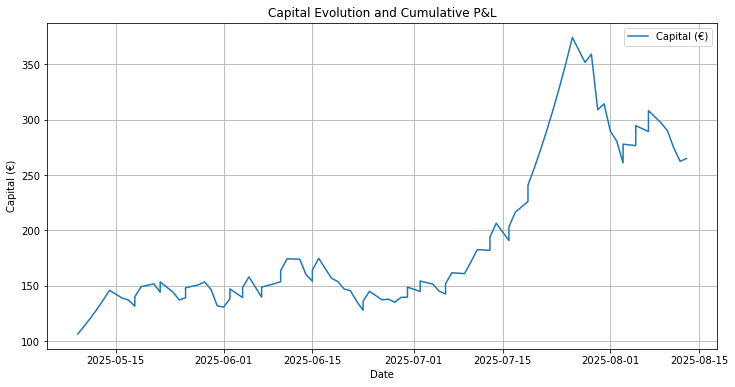

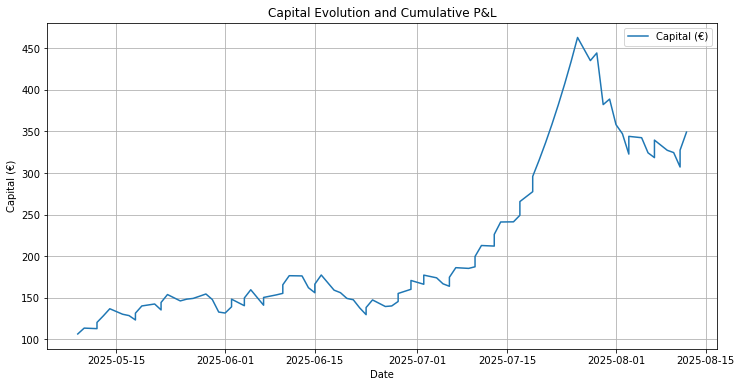

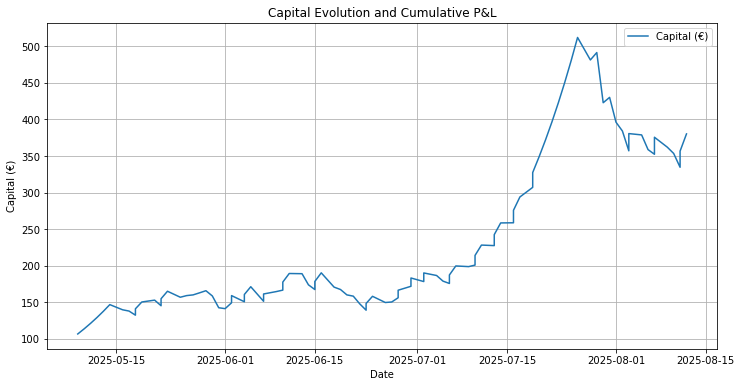

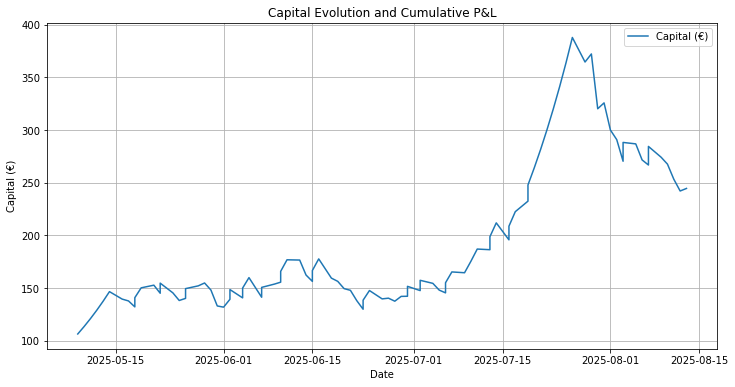

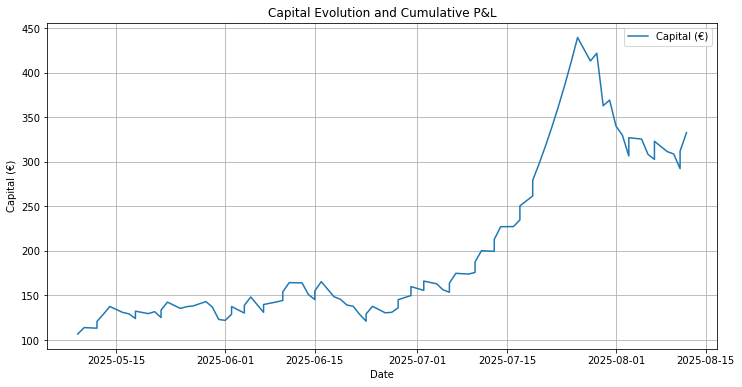

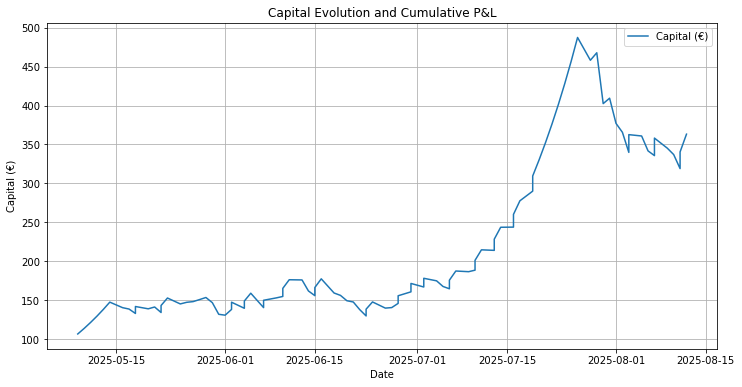

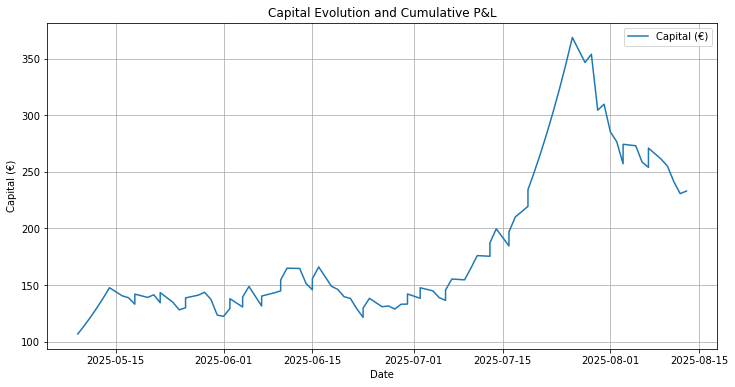

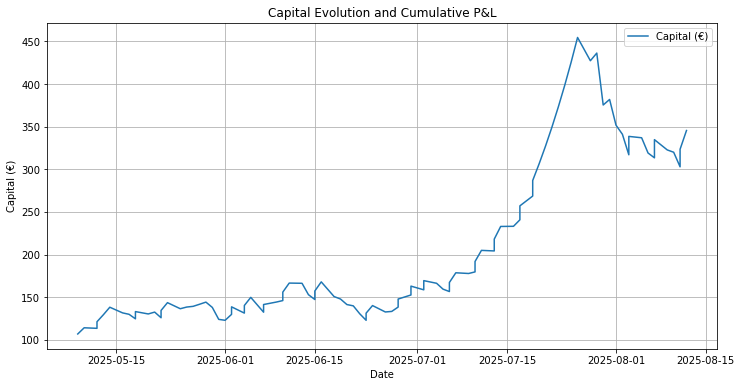

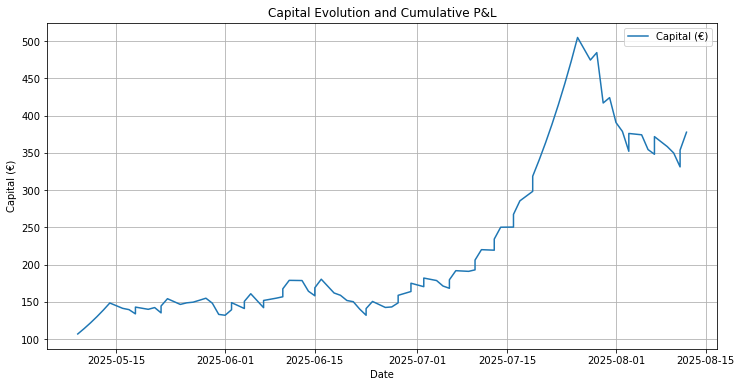

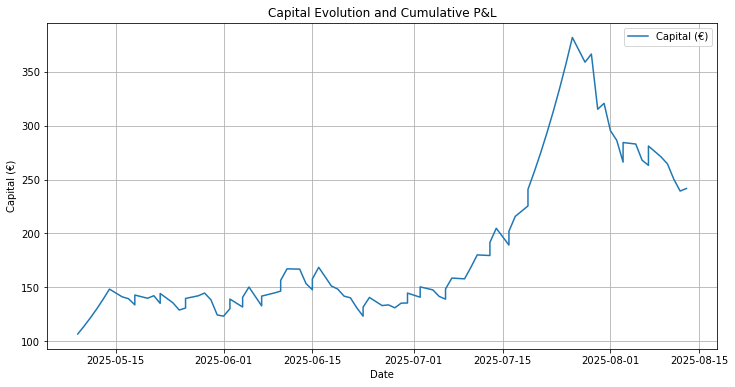

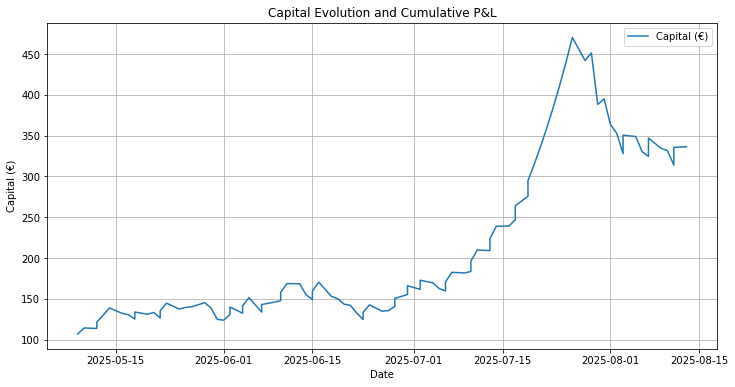

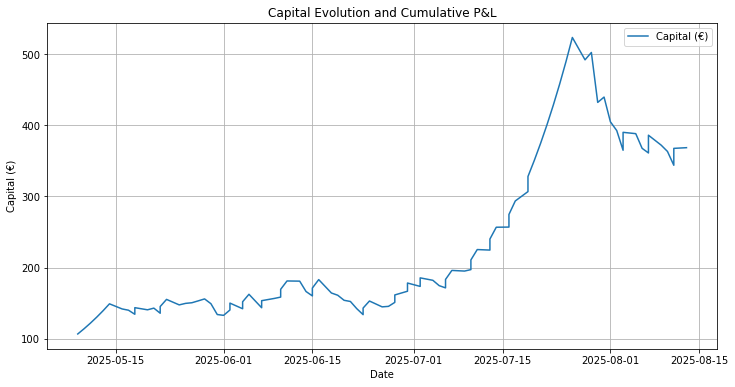

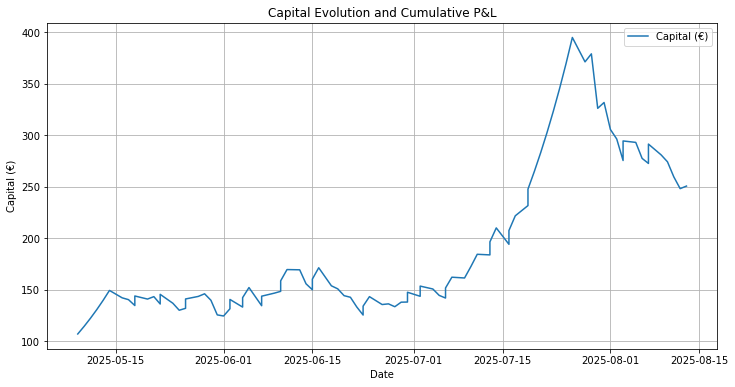

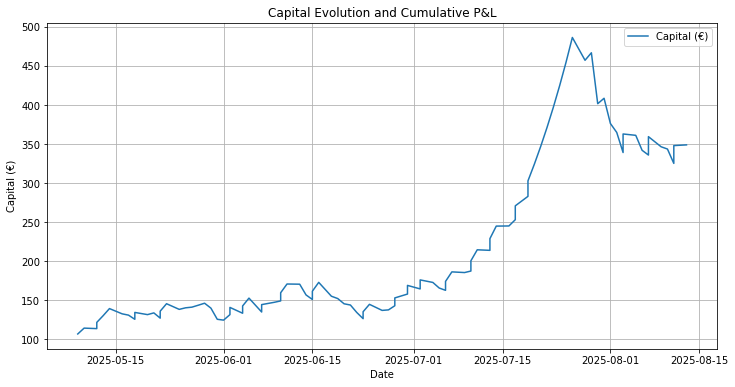

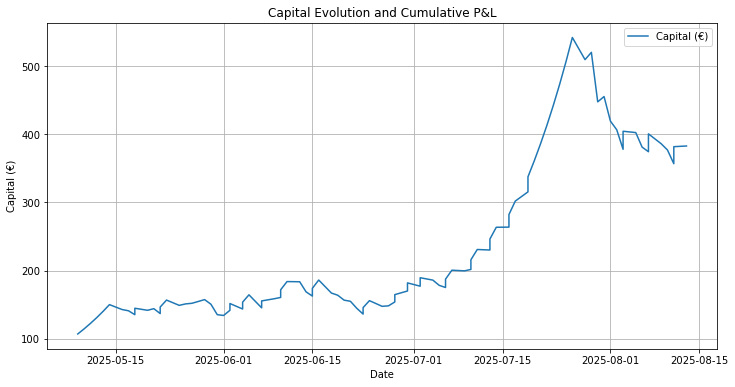

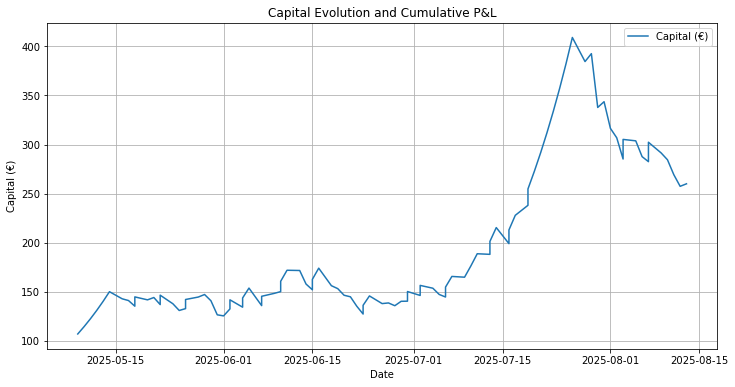

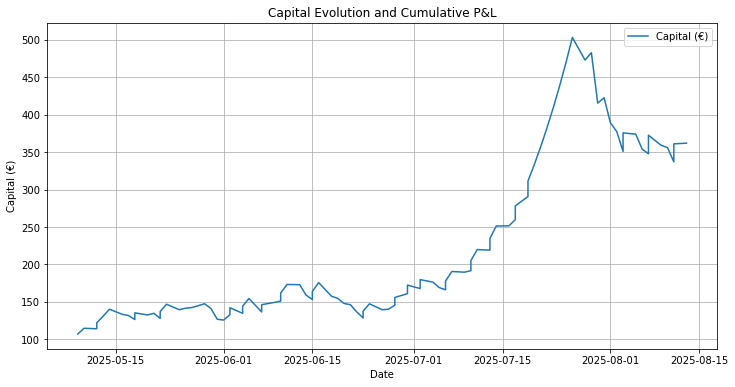

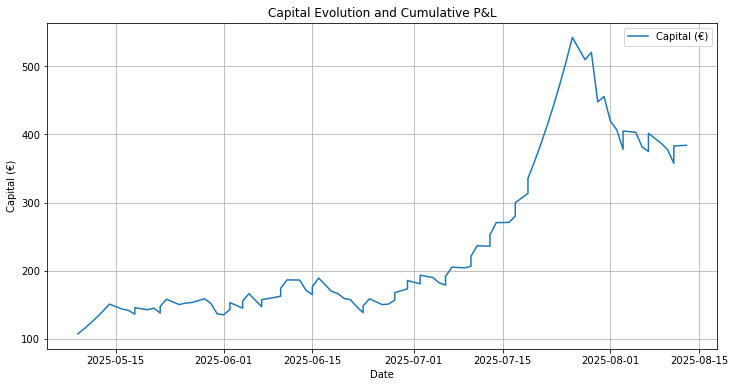

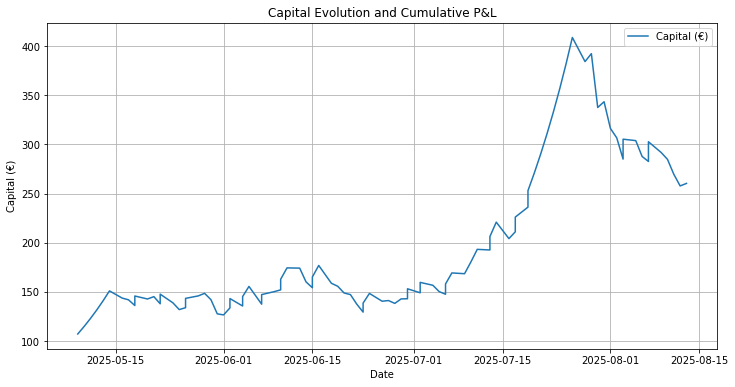

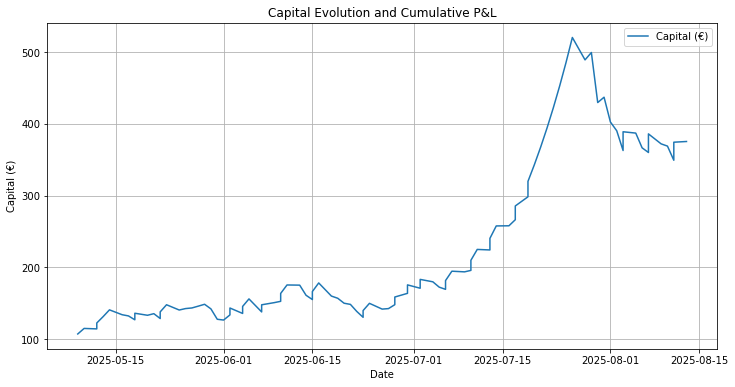

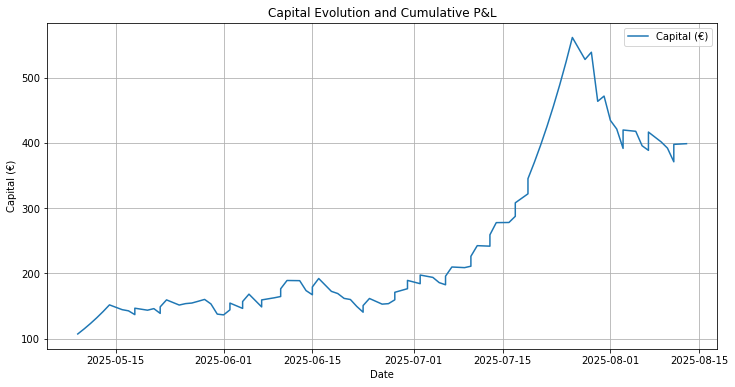

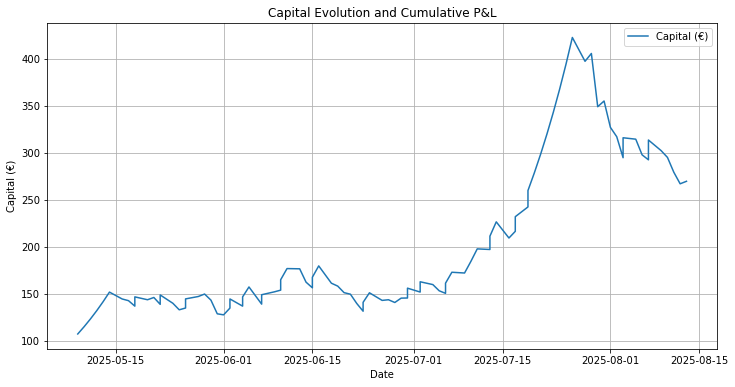

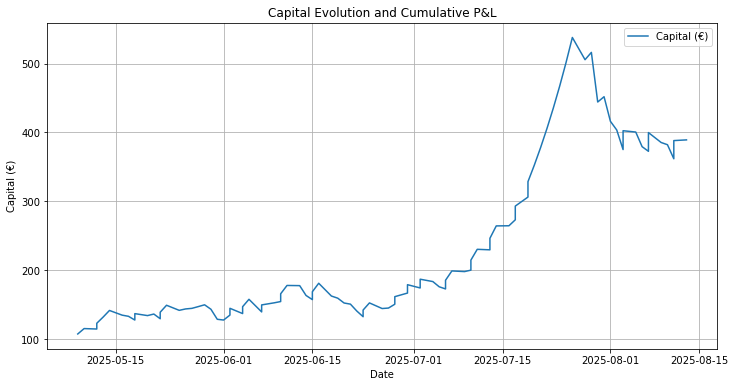

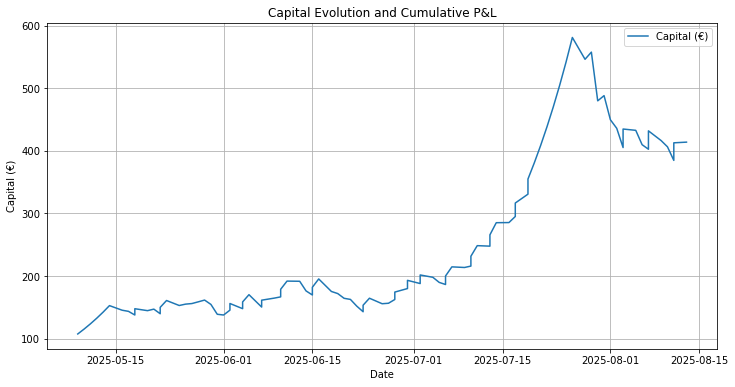

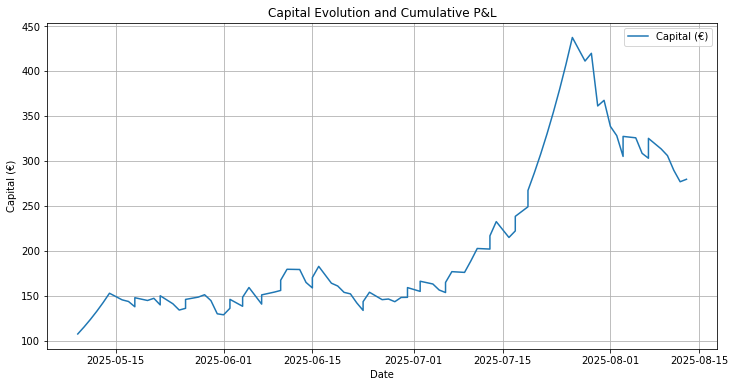

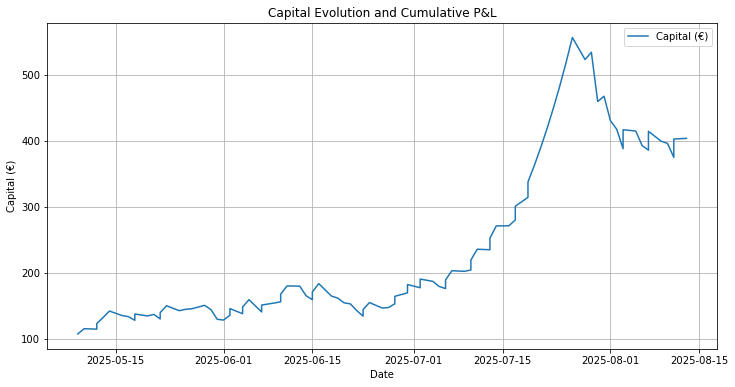

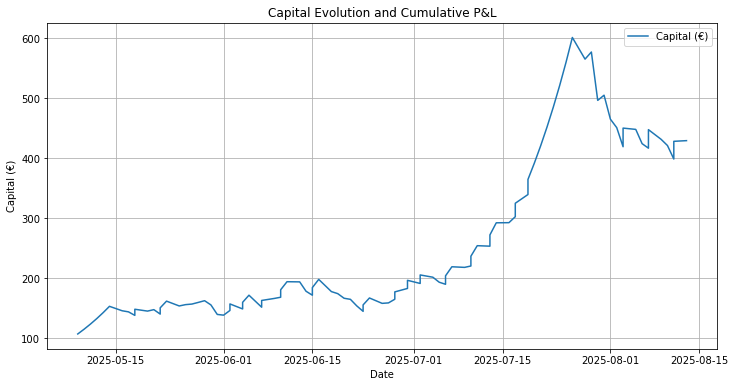

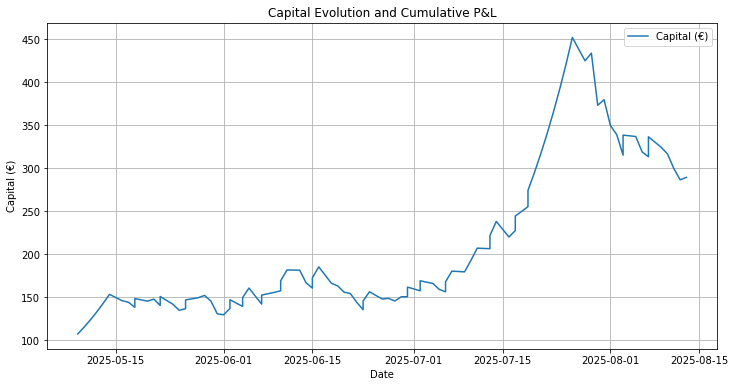

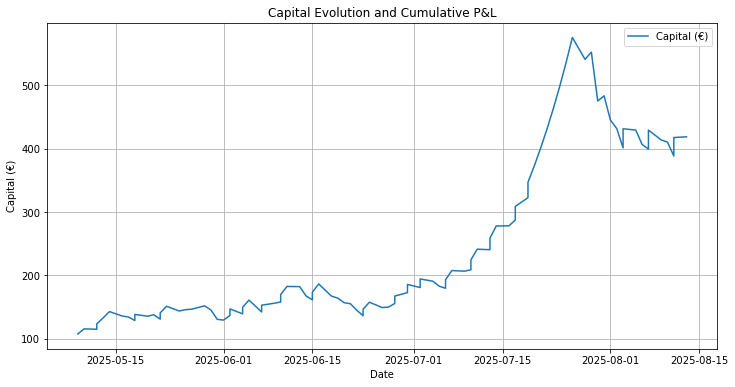

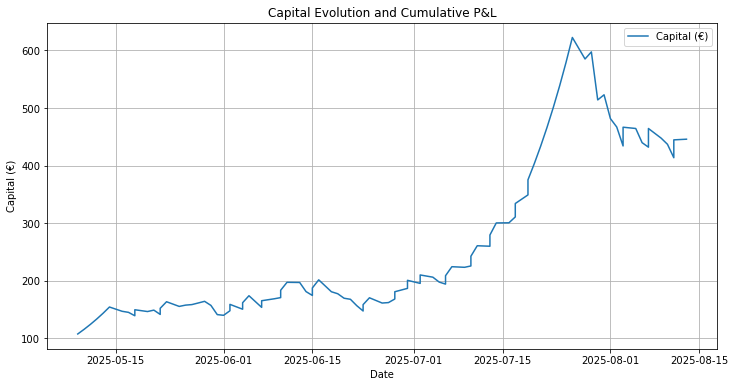

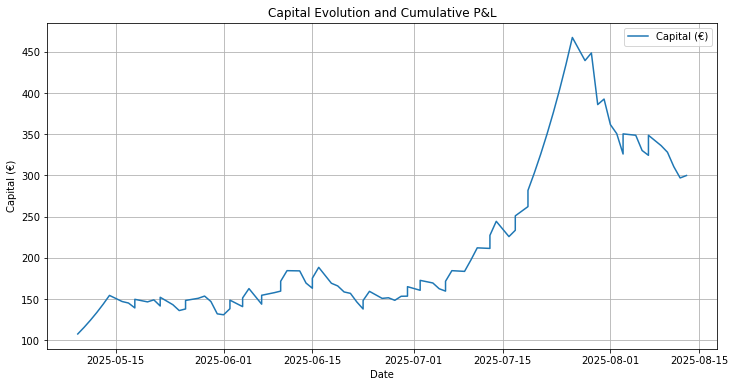

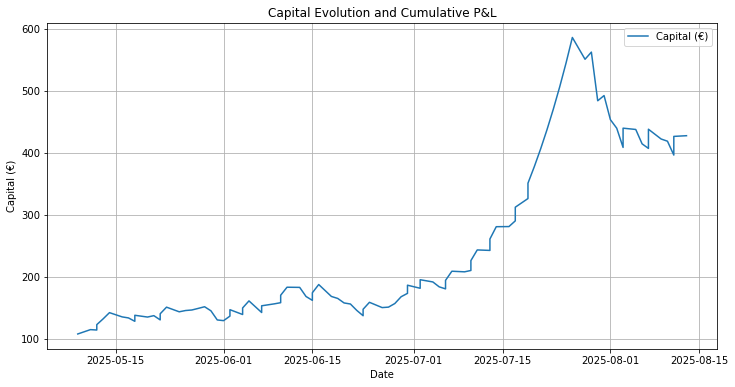

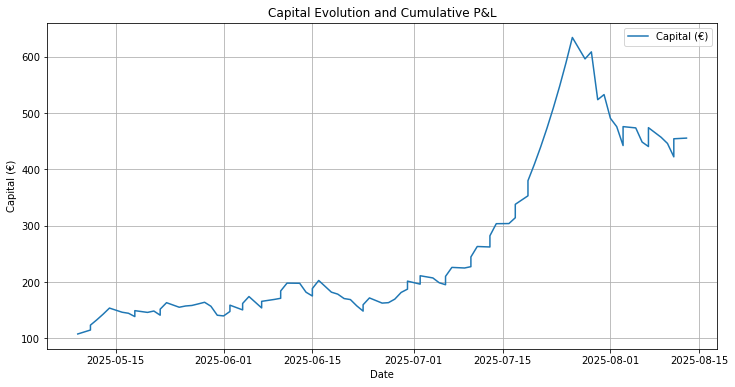

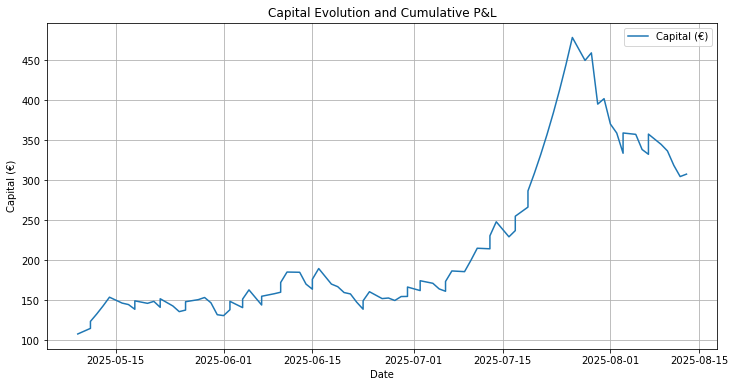

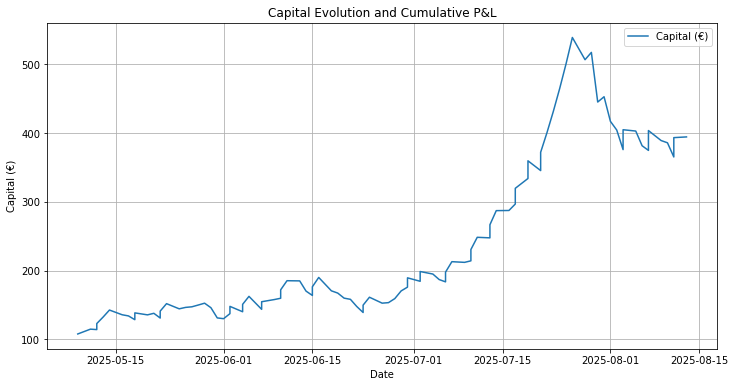

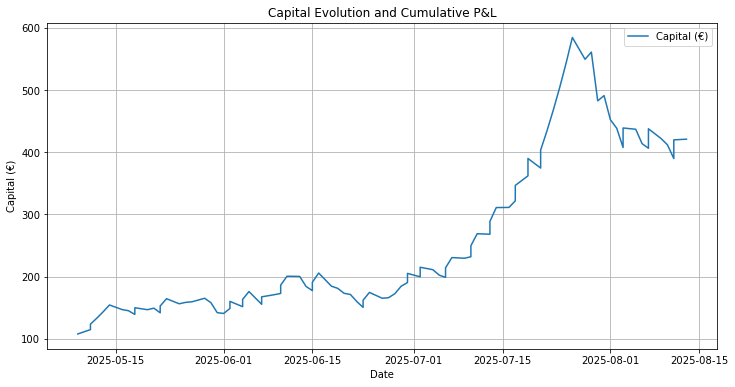

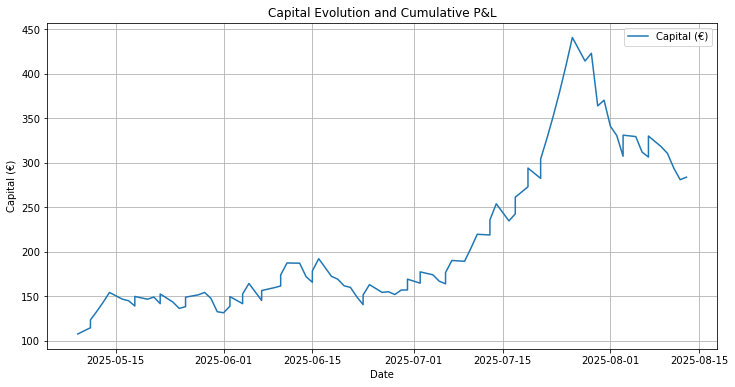

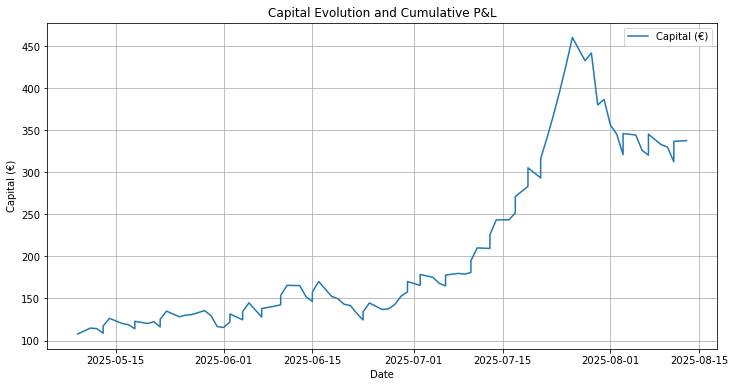

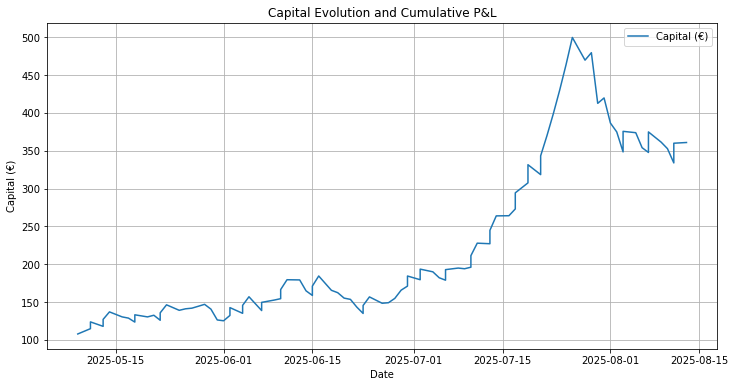

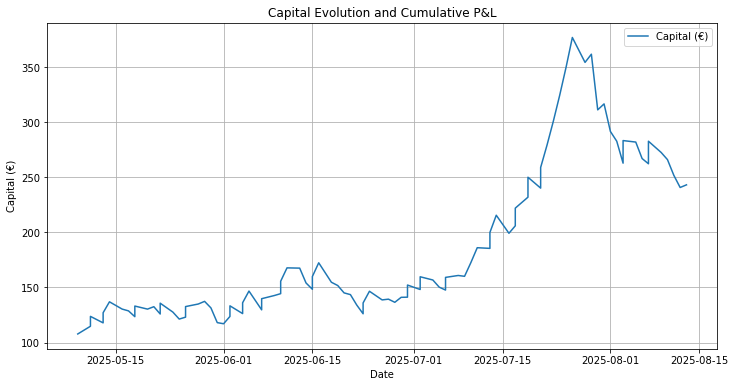

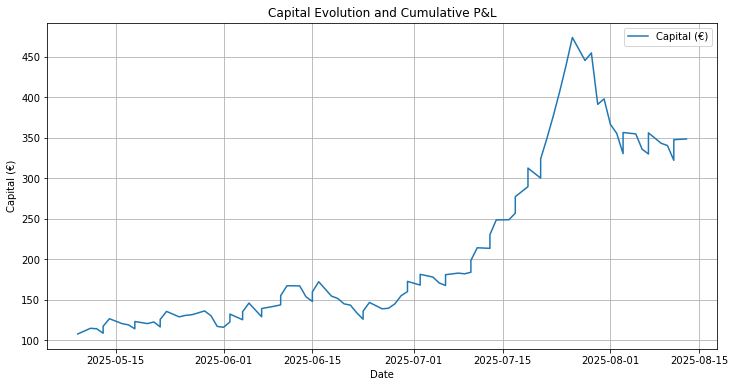

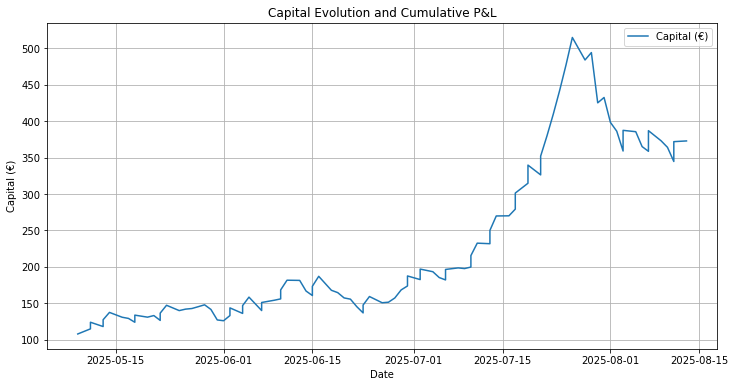

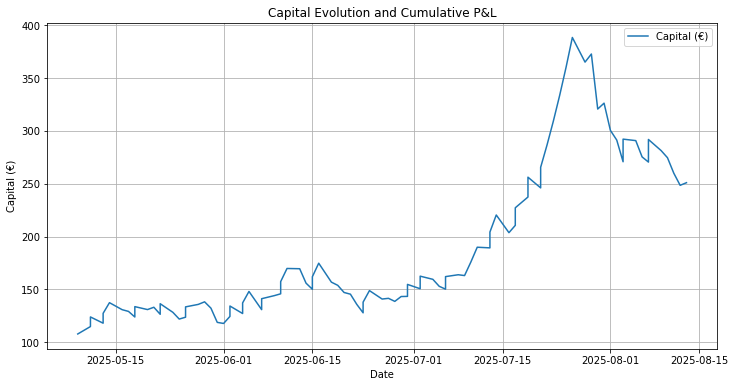

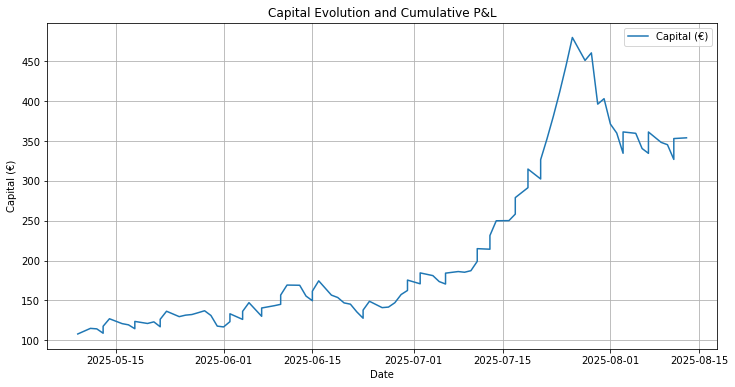

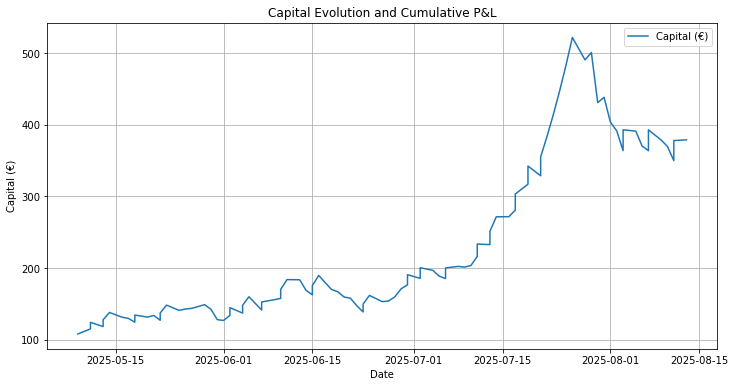

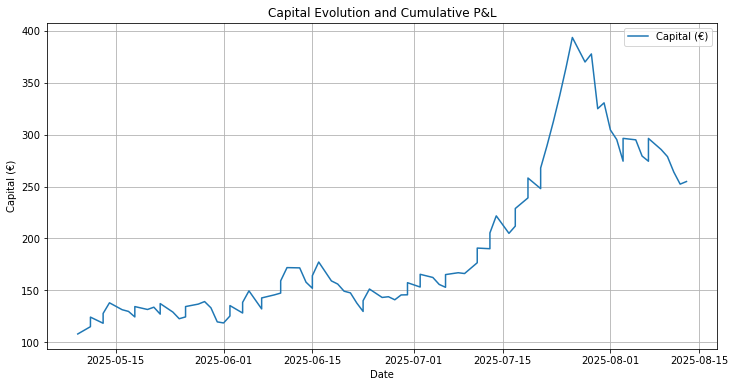

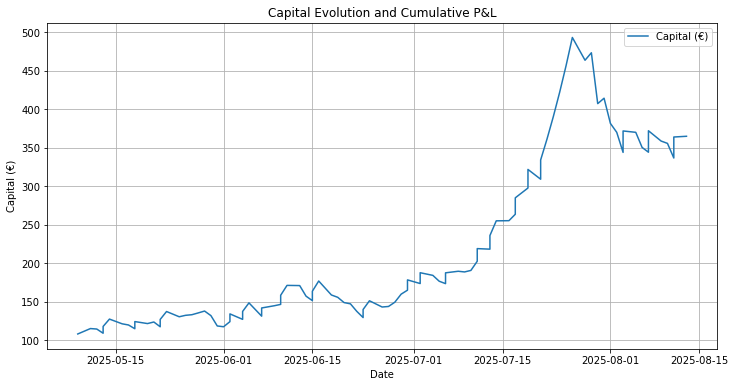

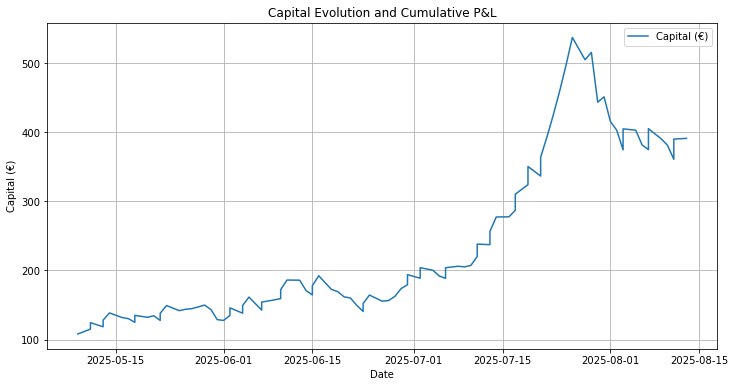

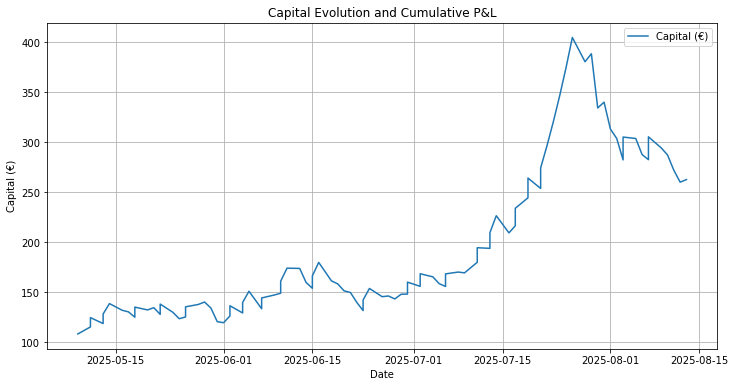

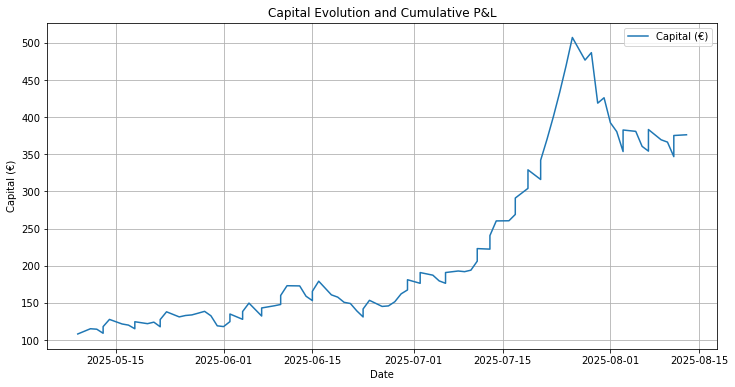

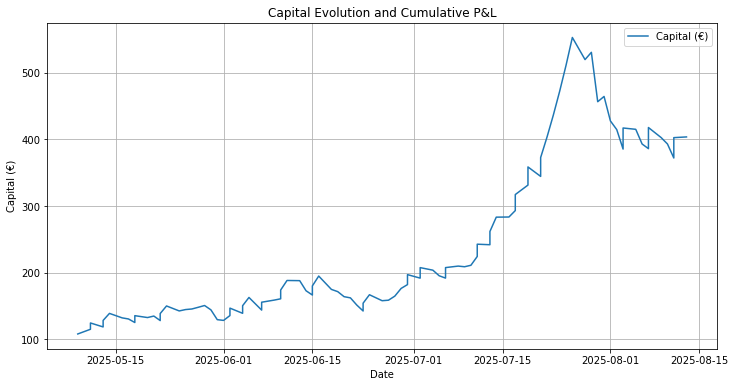

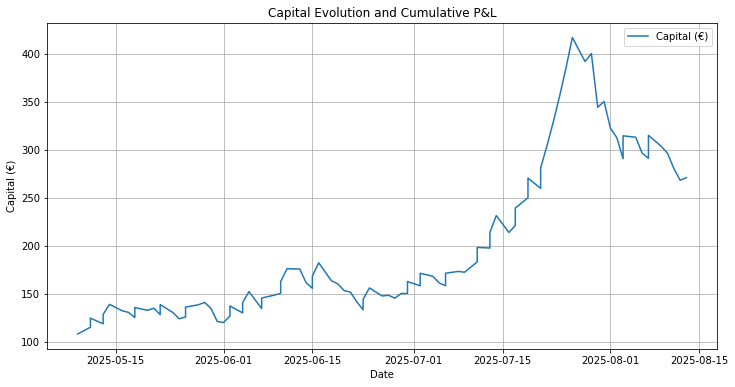

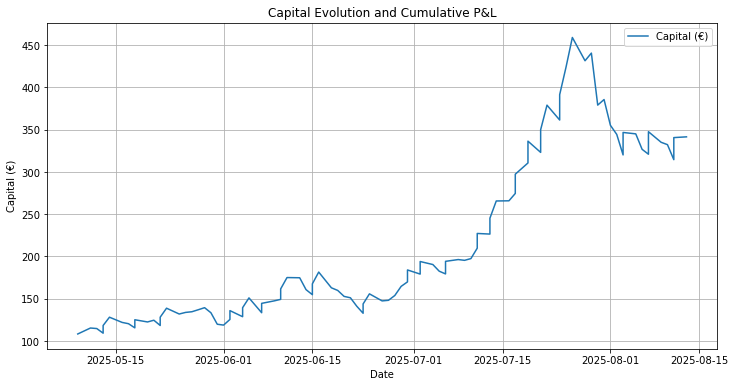

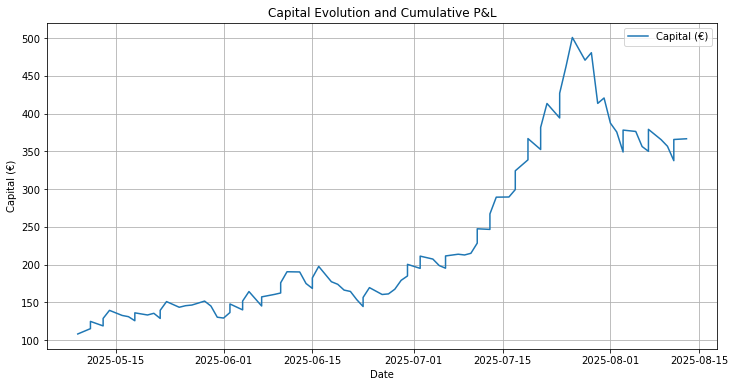

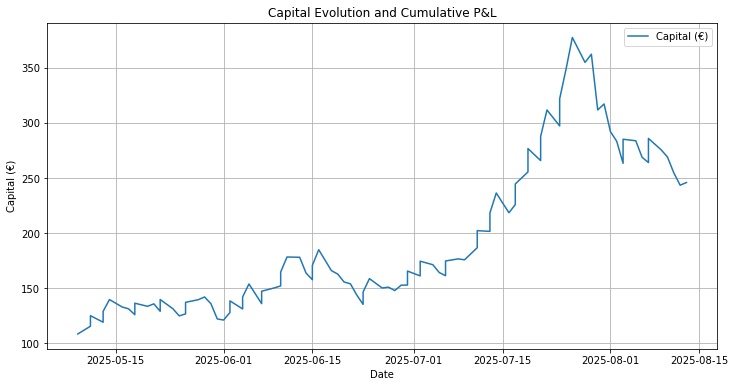

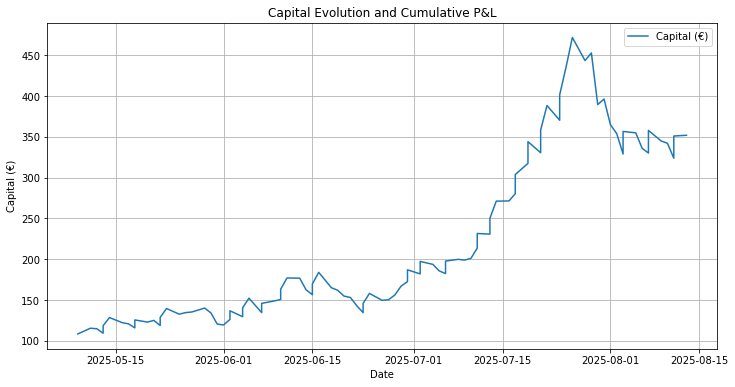

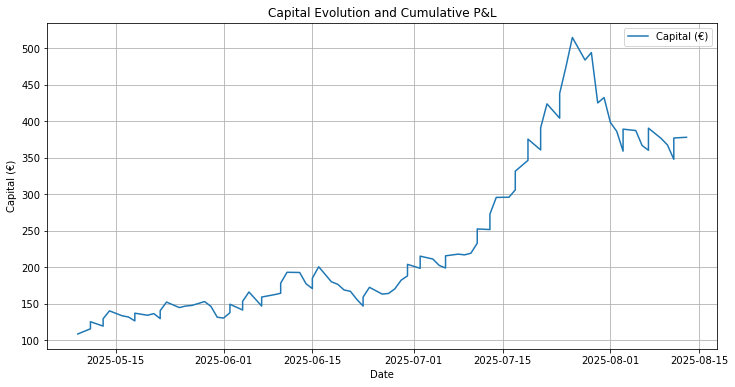

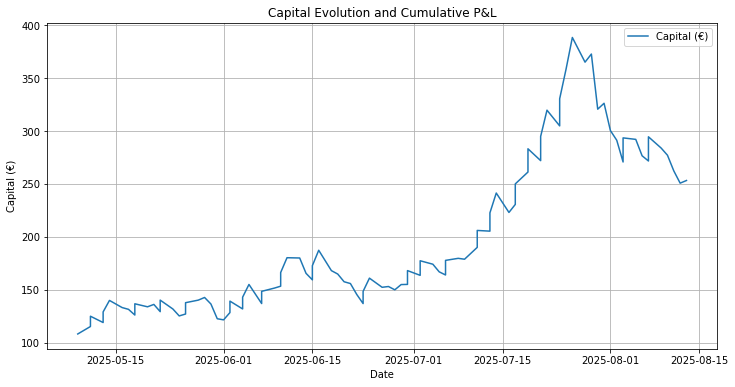

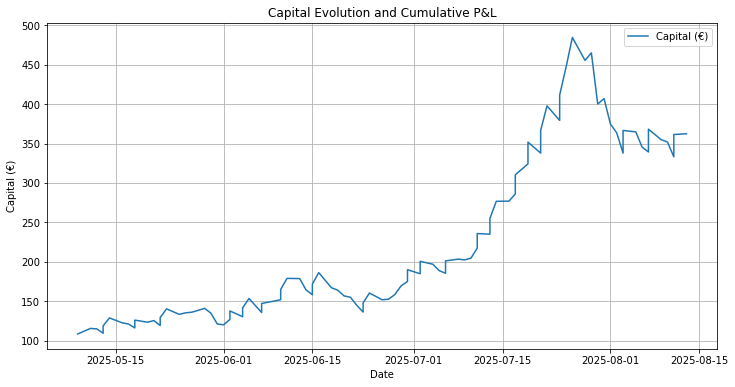

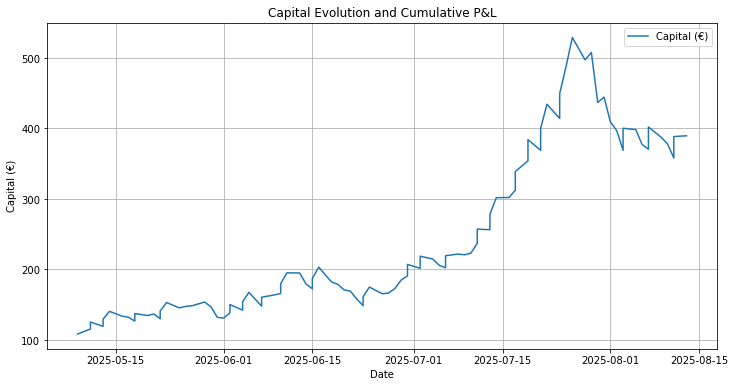

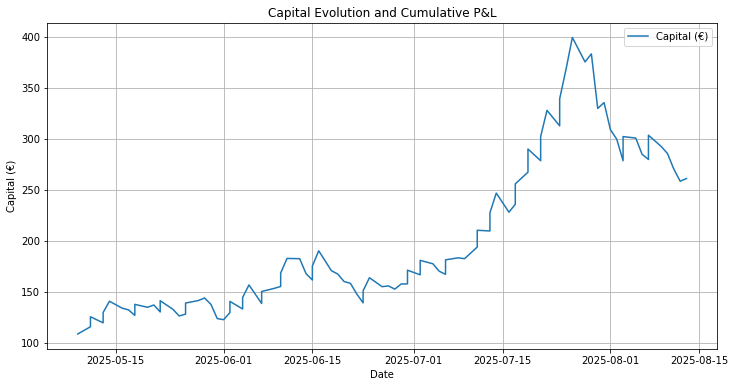

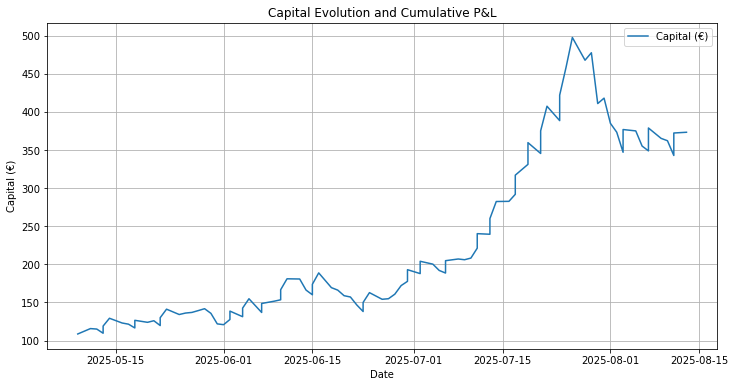

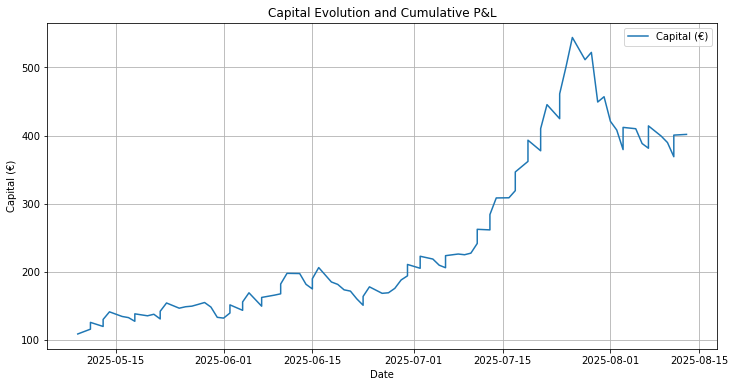

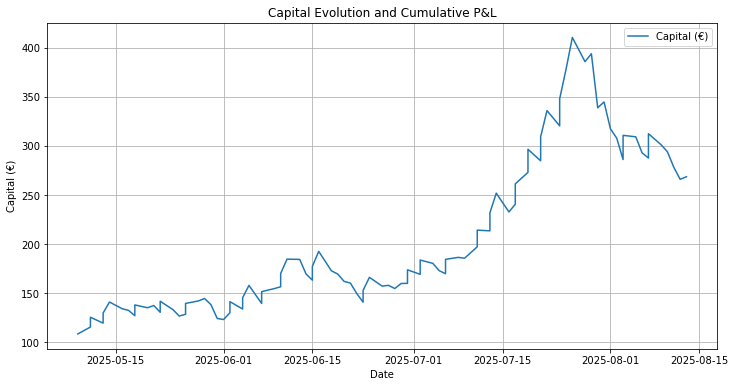

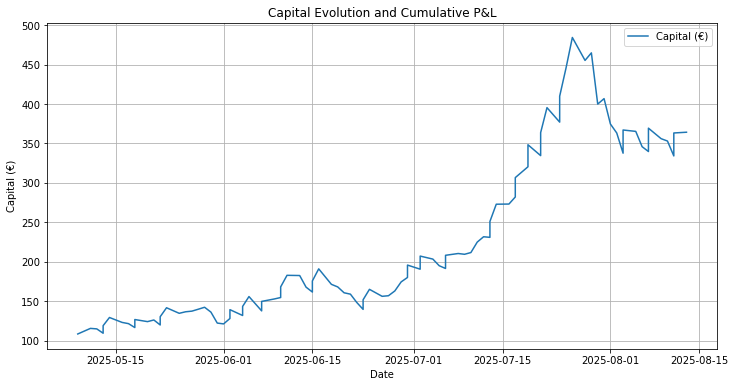

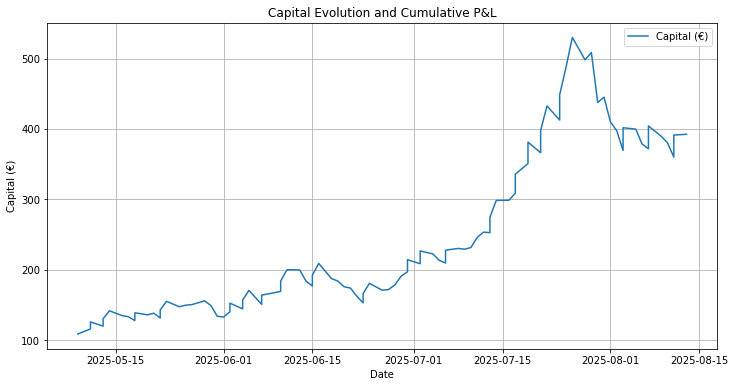

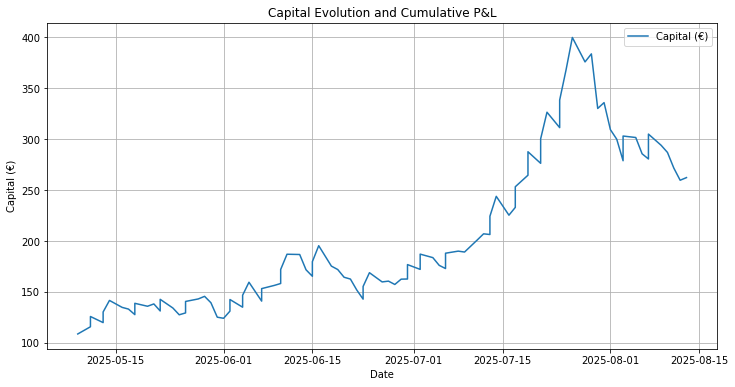

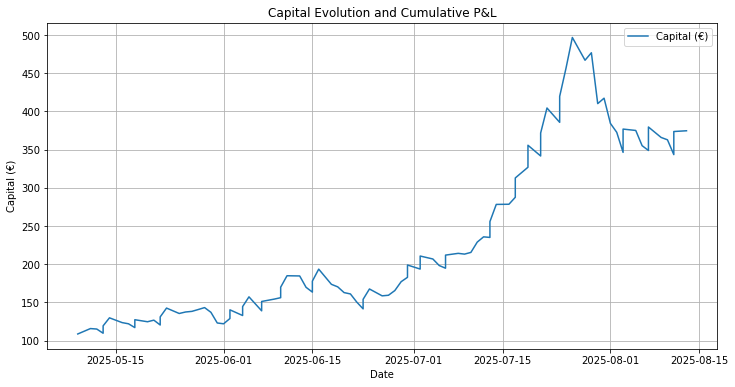

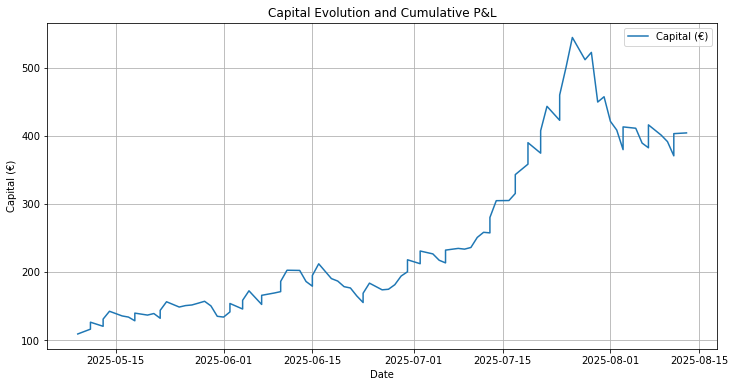

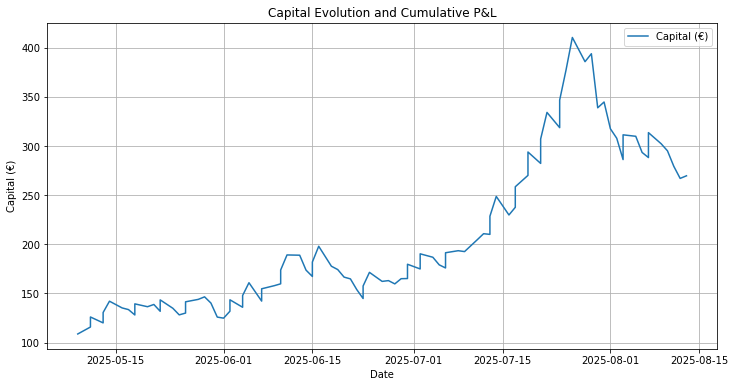

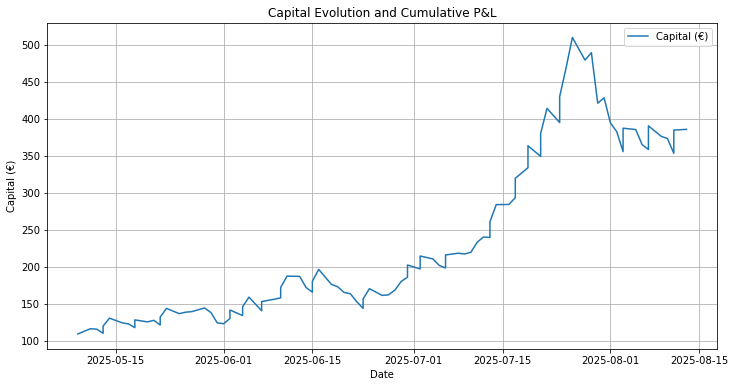

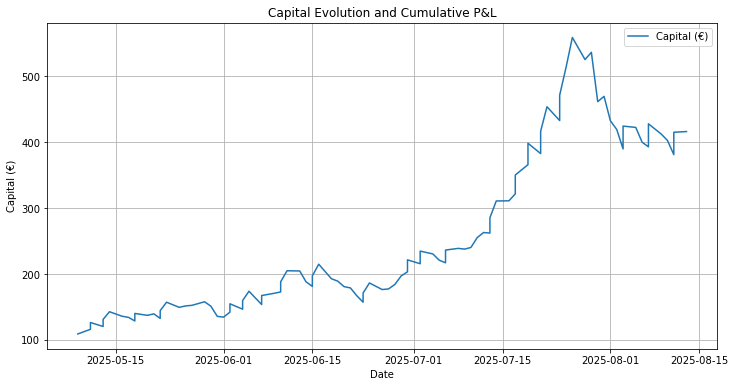

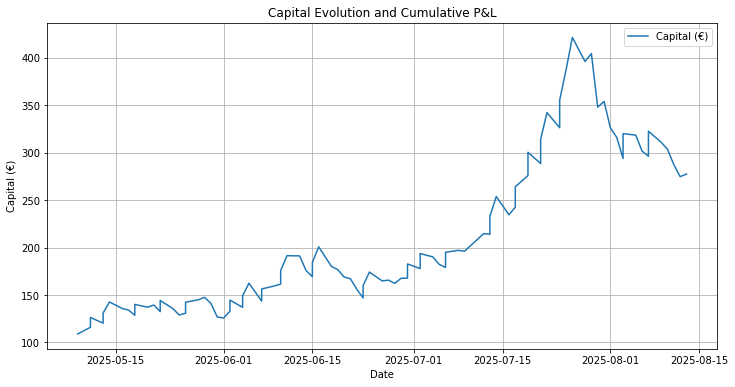

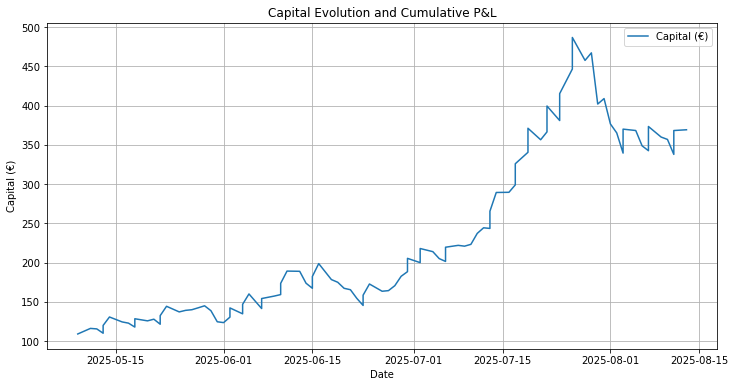

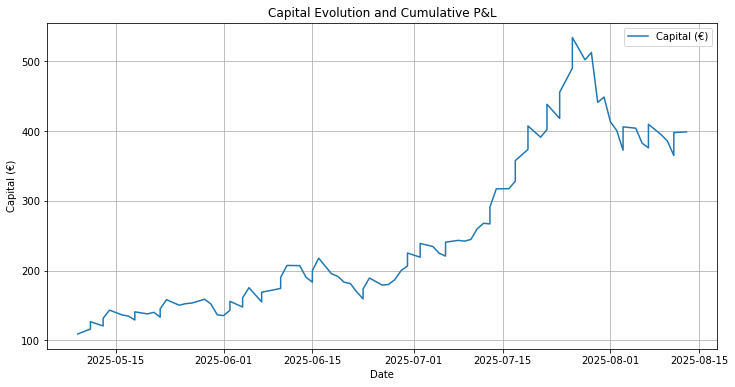

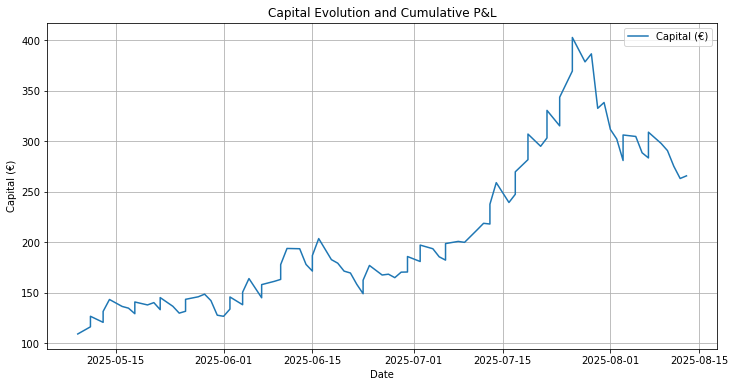

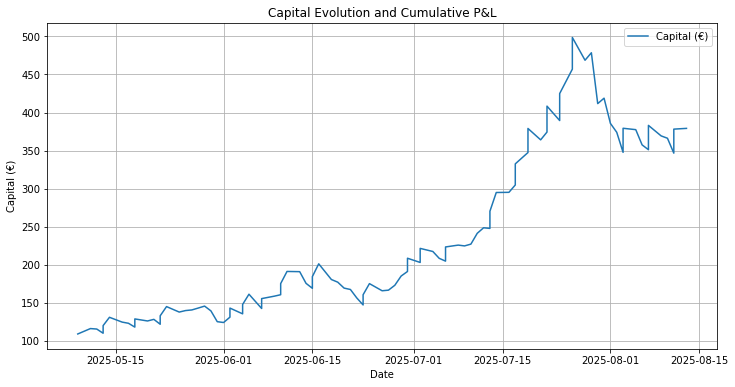

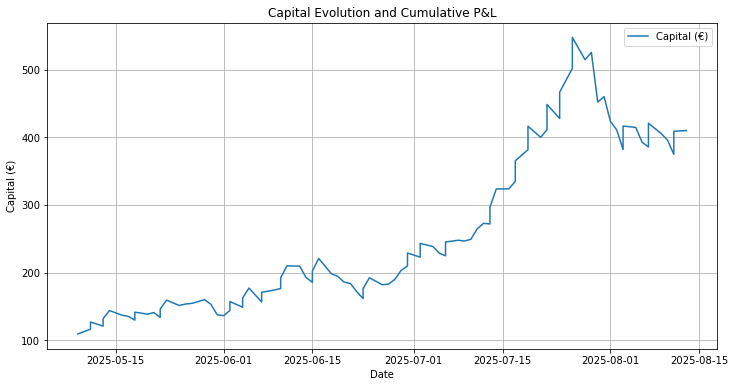

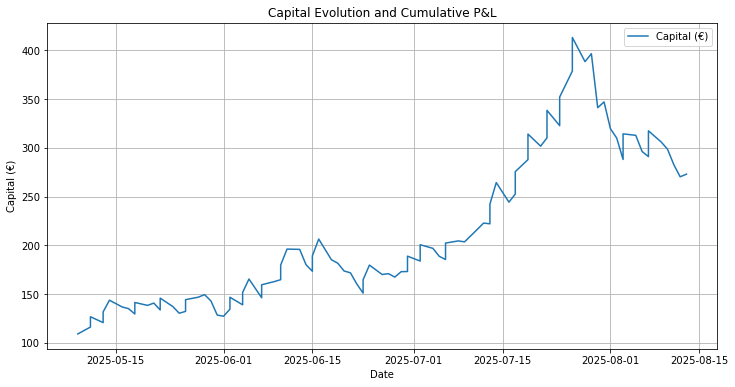

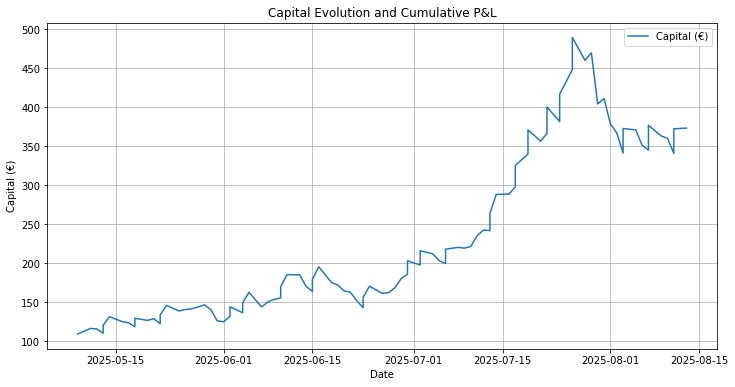

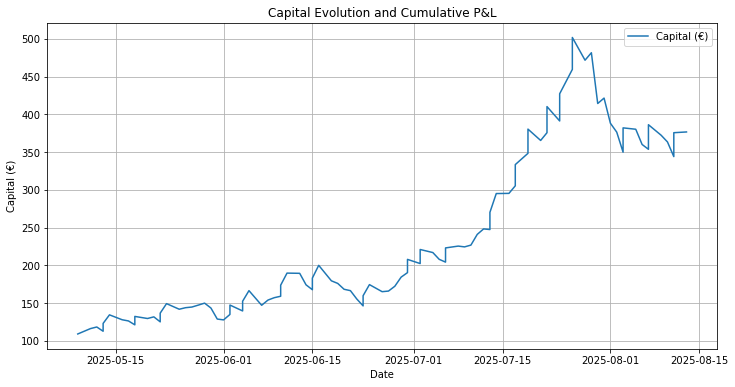

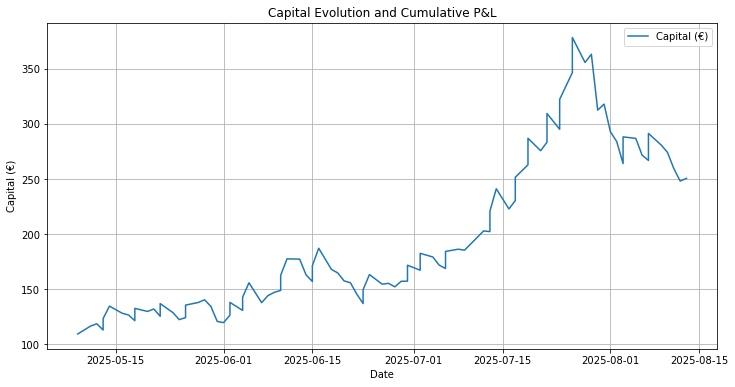

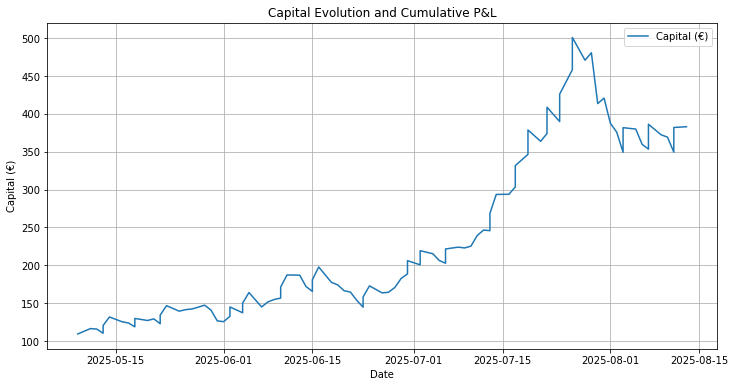

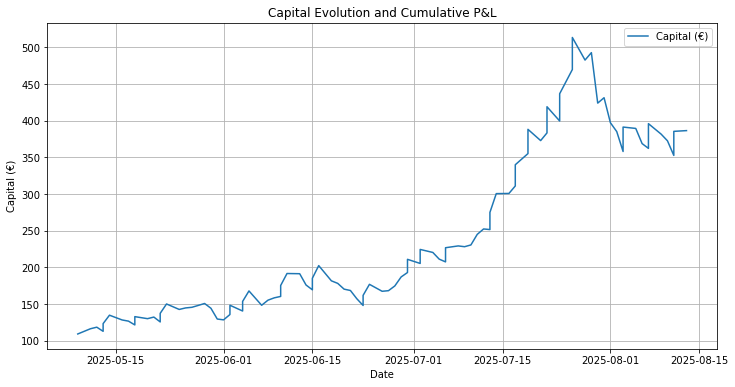

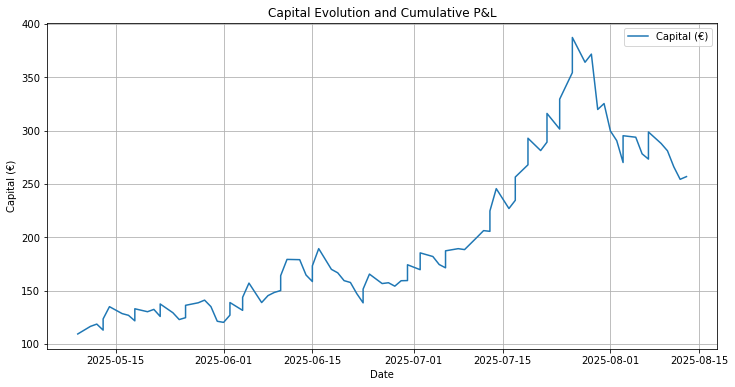

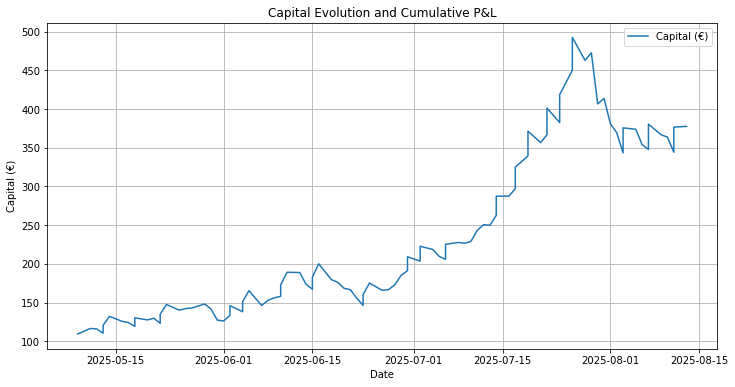

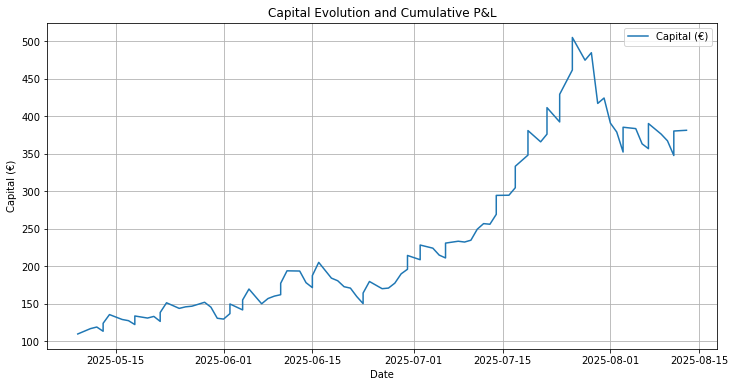

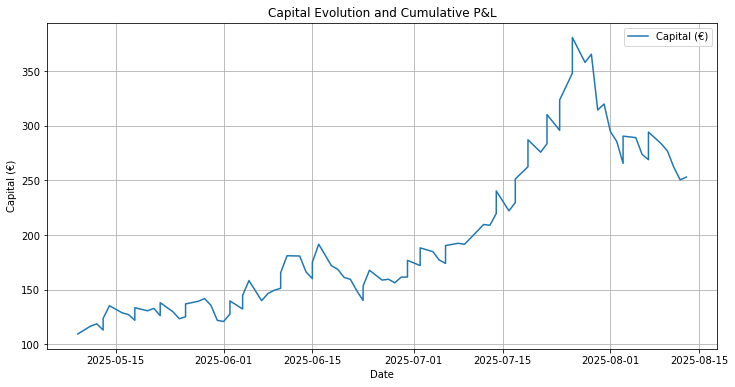

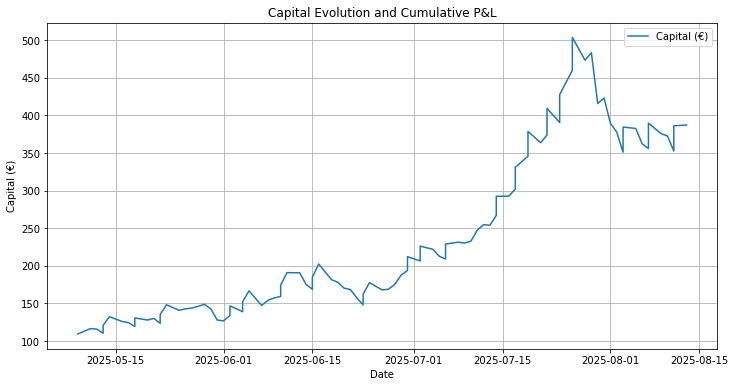

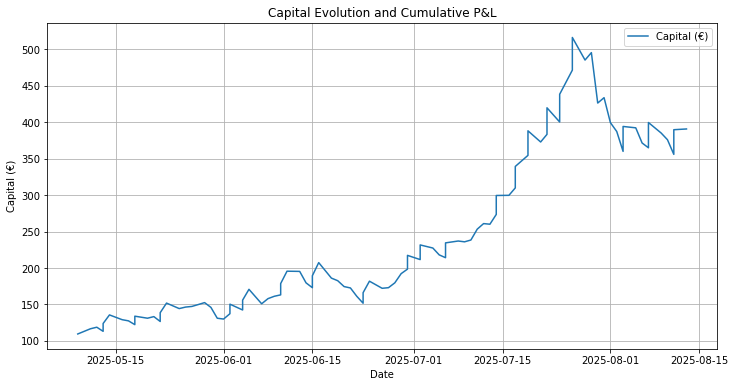

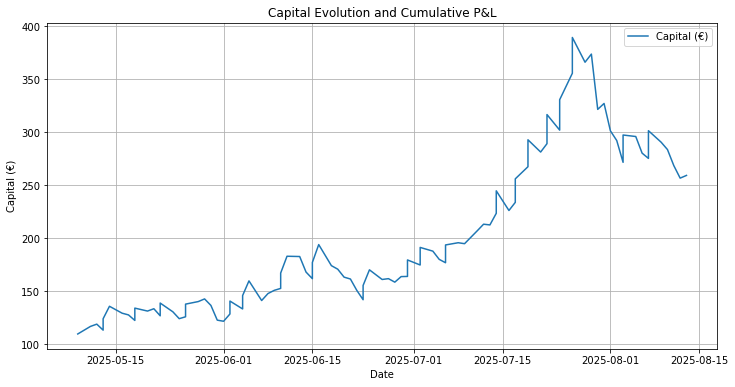

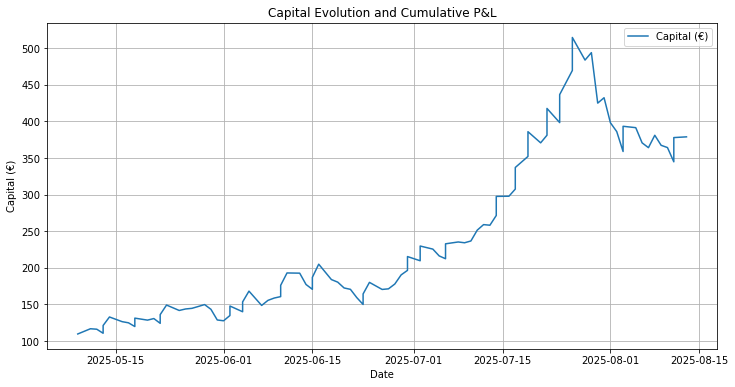

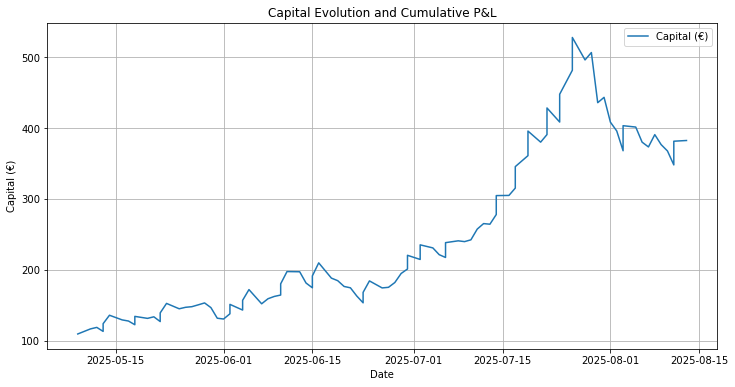

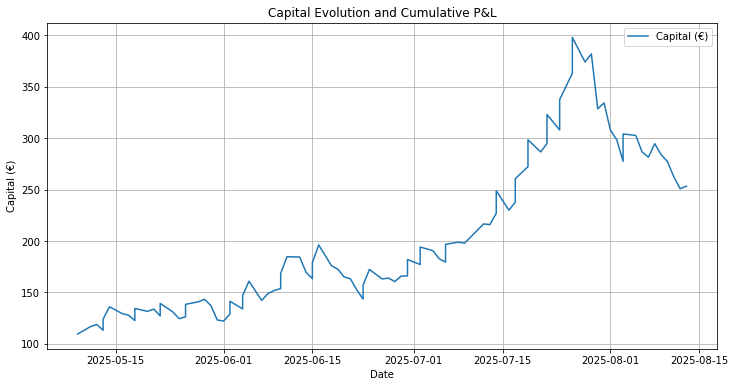

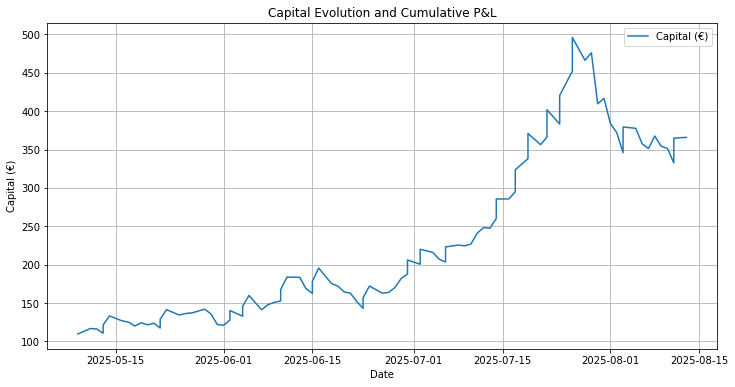

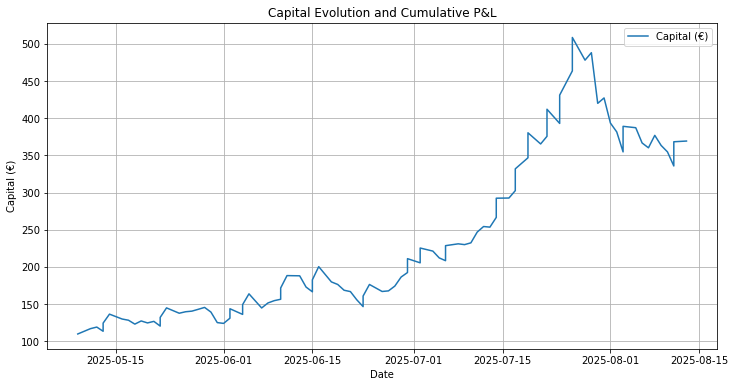

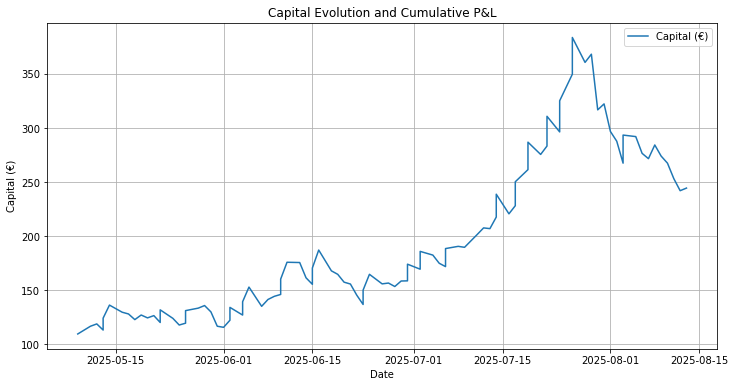

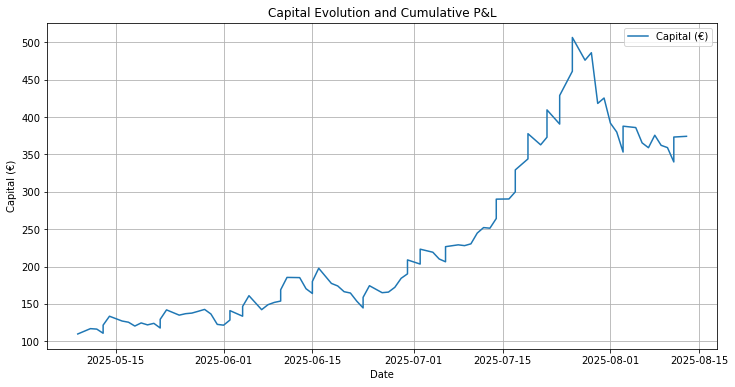

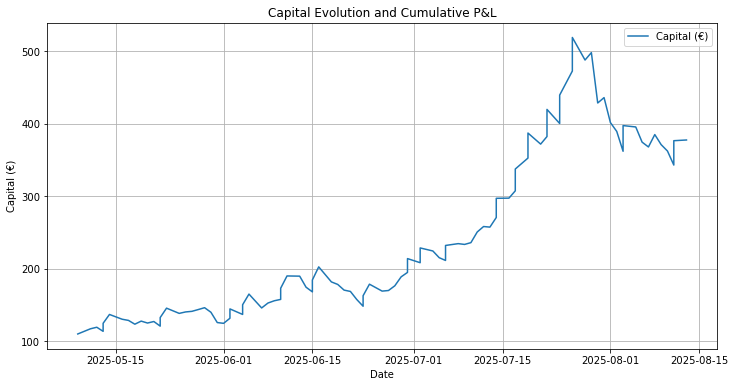

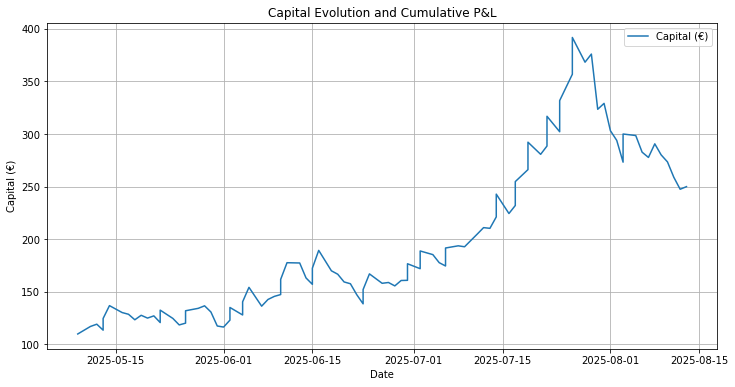

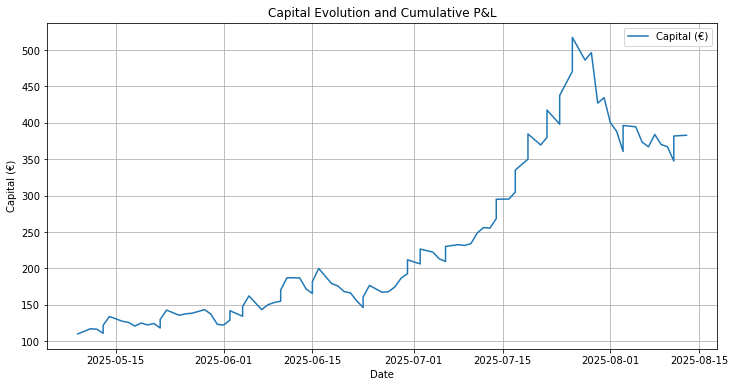

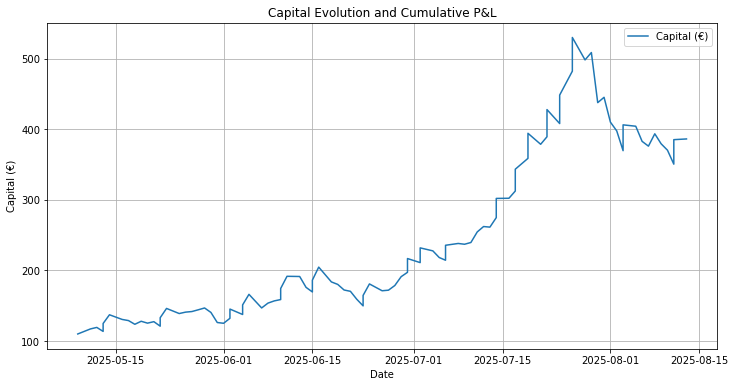

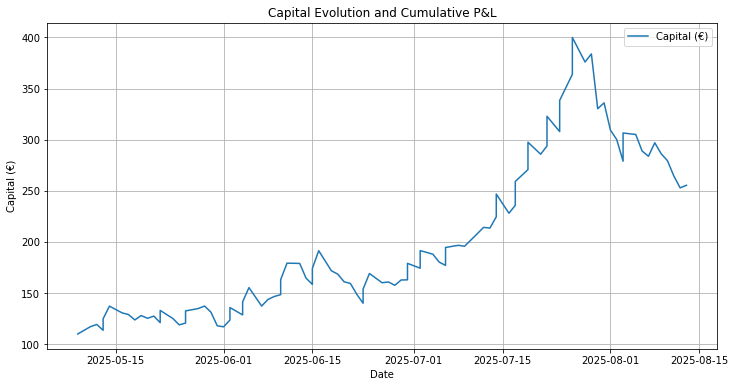

Best parameters:
Intraday_threshold = 0.064, Q1_selection = 0.060
Final capital = 460.47
     intraday_threshold  Q1_selection  final_capital
73                0.064          0.06     460.470673
109               0.076          0.06     455.605476
106               0.075          0.06     445.846955
70                0.063          0.06     440.978340
76                0.065          0.06     434.682061


In [74]:
results_df, best_params = optimize_params(df_recent, vol_window=8, start_capital=100)

print("Best parameters:")
print(f"Intraday_threshold = {best_params[0]:.3f}, Q1_selection = {best_params[1]:.3f}")
print(f"Final capital = {best_params[2]:.2f}")

# Show the top 5 combinations
print(results_df.sort_values("final_capital", ascending=False).head())


In multiple runs, Q1\_selection is always equal to 0.06. As for intraday\_threshold, it should be adapted depending on the period, but it seems to be particularly effective around 0.07.
We’re still going to try to optimize the intraday\_threshold over a wider range, knowing that we already have quite a few other parameters in place.


In [76]:
def optimize_params(df, vol_window=8, start_capital=100,
                    intraday_range=np.arange(0.04, 0.7, 0.001)):
    """
    Optimizes intraday_threshold by testing all values in the range with Q1_selection fixed at 0.06.
    
    Returns:
      - results_df: DataFrame with results (final capital for each intraday_threshold)
      - best_params: tuple (intraday_threshold, final_capital)
    """

    results = []

    for intraday_threshold in intraday_range:
        try:
            df_log, df_capital_hist = backtest_high_volatility_dynamic_4(
                df,
                start_capital=start_capital,
                vol_window=vol_window,
                intraday_threshold=intraday_threshold,
                Q1_selection=0.06, 
                plot=0
            )

            # Final capital = last point in the history
            final_capital = df_capital_hist["capital"].iloc[-1] if not df_capital_hist.empty else start_capital

            results.append({
                "intraday_threshold": intraday_threshold,
                "final_capital": final_capital
            })

        except Exception as e:
            print(f"Error for intraday={intraday_threshold}: {e}")

    results_df = pd.DataFrame(results)

    # Find the best threshold
    best_row = results_df.loc[results_df["final_capital"].idxmax()]
    best_intraday = best_row["intraday_threshold"]
    best_capital = best_row["final_capital"]

    return results_df, (best_intraday, best_capital)

In [77]:
results_df, best_params = optimize_params(df_recent, vol_window=8, start_capital=100)

In [78]:
print("Best parameters:")
print(f"Intraday_threshold = {best_params[0]:.3f}")
print(f"Final capital = {best_params[1]:.2f}")

# Show the top 20 combinations
print(results_df.sort_values("final_capital", ascending=False).head(20))

Best parameters:
Intraday_threshold = 0.134
Final capital = 497.10
     intraday_threshold  final_capital
94                0.134     497.096737
93                0.133     490.129224
92                0.132     483.253346
88                0.128     481.423052
82                0.122     480.424251
91                0.131     476.467978
86                0.126     474.715751
87                0.127     473.798386
81                0.121     471.932662
90                0.130     470.855219
85                0.125     466.769154
101               0.141     465.466848
89                0.129     463.821485
100               0.140     463.721116
80                0.120     463.583785
98                0.138     462.573764
109               0.149     461.180601
24                0.064     460.470673
113               0.153     459.711348
84                0.124     458.948691


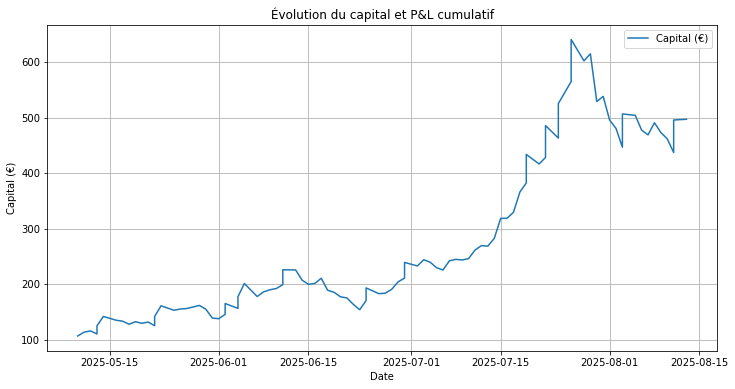

In [139]:
df_log, df_capital_hist=backtest_high_volatility_dynamic_4(
    df_recent, start_capital=100, vol_window=8, intraday_threshold=0.134, Q1_selection = 0.06
)

The results here are truly excellent. In just three months, we often achieve nearly +400%, which is remarkable. By comparison, over the past three months, holding BTC has given us a +30% change, while ETH has given us +163%.


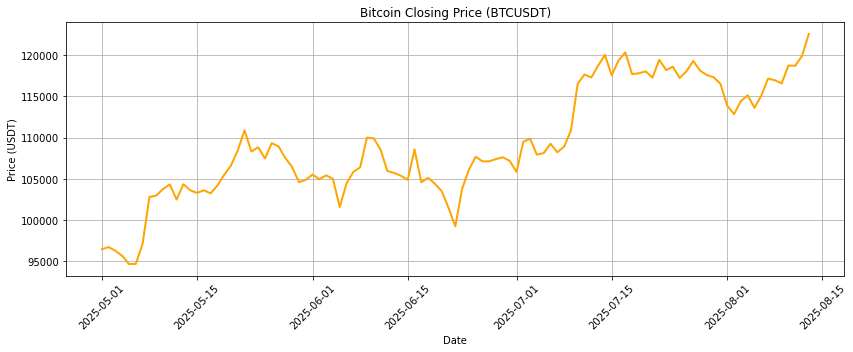

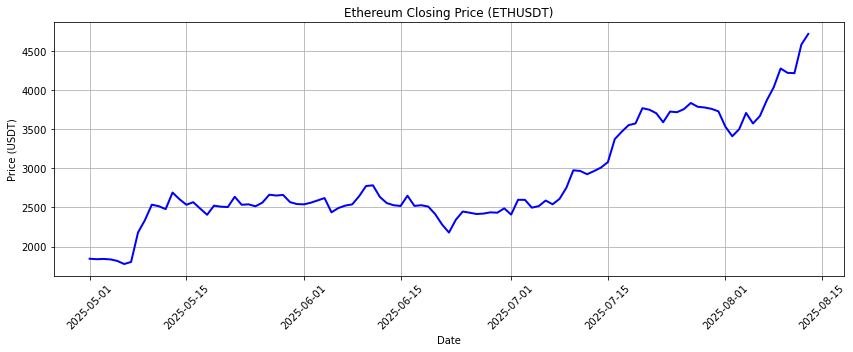

In [80]:
# Filter data for BTC and ETH
btc_df = df_recent[df_recent['ticker'] == 'BTC']
eth_df = df_recent[df_recent['ticker'] == 'ETH']

# --- BTC Chart ---
plt.figure(figsize=(12,5))
plt.plot(btc_df['date'], btc_df['close'], color='orange', linewidth=2)
plt.title('Bitcoin Closing Price (BTCUSDT)')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- ETH Chart ---
plt.figure(figsize=(12,5))
plt.plot(eth_df['date'], eth_df['close'], color='blue', linewidth=2)
plt.title('Ethereum Closing Price (ETHUSDT)')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
btc_df

ticker       date      open      high       low     close  daily-gap  \
23470    BTC 2025-05-01   94410.6   97439.5   93995.6   96454.9     3443.9   
23471    BTC 2025-05-02   96454.9   97895.7   96193.8   96716.4     1701.9   
23472    BTC 2025-05-03   96716.4   96928.9   95852.3   96266.2     1076.6   
23473    BTC 2025-05-04   96266.2   96344.0   95191.0   95656.9     1153.0   
23474    BTC 2025-05-05   95671.3   95671.3   93476.7   94663.0     2194.6   
...      ...        ...       ...       ...       ...       ...        ...   
23570    BTC 2025-08-09  116939.0  117981.0  116335.0  116571.0     1646.0   
23571    BTC 2025-08-10  116568.0  119136.0  116471.0  118741.0     2665.0   
23572    BTC 2025-08-11  118748.0  122337.0  118056.0  118713.0     4281.0   
23573    BTC 2025-08-12  118713.0  120316.0  118219.0  119903.0     2097.0   
23574    BTC 2025-08-13  119804.0  123037.0  118934.0  122577.0     4103.0   

       %daily-gap/high  
23470         0.035344  
23471         0.017385  
23472         0.011107  
23473         0.011968  
23474         0.022939  
...                ...  
23570         0.013951  
23571         0.022369  
23572         0.034994  
23573         0.017429  
23574         0.033348  

[105 rows x 8 columns]

In [82]:
eth_df

ticker       date     open     high      low    close  daily-gap  \
148061    ETH 2025-05-01  1792.16  1873.38  1788.92  1843.52      84.46   
148062    ETH 2025-05-02  1844.08  1870.30  1813.56  1837.36      56.74   
148063    ETH 2025-05-03  1837.36  1848.42  1810.00  1840.82      38.42   
148064    ETH 2025-05-04  1841.24  1849.77  1818.76  1835.04      31.01   
148065    ETH 2025-05-05  1834.97  1834.97  1781.50  1815.66      53.47   
...       ...        ...      ...      ...      ...      ...        ...   
148161    ETH 2025-08-09  4037.01  4300.72  4007.98  4279.86     292.74   
148162    ETH 2025-08-10  4280.60  4332.92  4155.87  4224.17     177.05   
148163    ETH 2025-08-11  4224.00  4364.56  4167.30  4219.94     197.26   
148164    ETH 2025-08-12  4221.29  4633.00  4190.57  4585.82     442.43   
148165    ETH 2025-08-13  4574.20  4776.43  4563.52  4722.69     212.91   

        %daily-gap/high  
148061         0.045084  
148062         0.030337  
148063         0.020785  
148064         0.016764  
148065         0.029139  
...                 ...  
148161         0.068068  
148162         0.040862  
148163         0.045196  
148164         0.095495  
148165         0.044575  

[105 rows x 8 columns]

In [83]:
df_log

date_buy  date_sell ticker  buy_price  sell_price            action  \
0  2025-05-09 2025-05-09     AR   7.511550    8.074916   SELL (intraday)   
1  2025-05-10 2025-05-10     AR   8.041190    8.644279   SELL (intraday)   
2  2025-05-11 2025-05-12   ROSE   0.039096    0.038882  SELL (next open)   
3  2025-05-12 2025-05-12    RAY   3.136370    3.371598   SELL (intraday)   
4  2025-05-13 2025-05-13    RAY   2.987100    3.211132   SELL (intraday)   
..        ...        ...    ...        ...         ...               ...   
91 2025-08-08 2025-08-09    CFX   0.224967    0.216865  SELL (next open)   
92 2025-08-09 2025-08-10  WEMIX   0.801040    0.794318  SELL (next open)   
93 2025-08-10 2025-08-11    CVX   4.678870    4.428890  SELL (next open)   
94 2025-08-11 2025-08-11    LDO   1.393280    1.497776   SELL (intraday)   
95 2025-08-12 2025-08-13    LDO   1.522000    1.526000  SELL (next open)   

          pnl  cumulative_pnl  capital_after_trade  
0    7.500000        7.500000           107.500000  
1    8.062500       15.562500           115.562500  
2   -0.632258       14.930242           114.930242  
3    8.619768       23.550010           123.550010  
4    9.266251       32.816261           132.816261  
..        ...             ...                  ...  
91 -15.455234      313.687906           413.687906  
92  -3.471500      310.216406           410.216406  
93 -21.916808      288.299598           388.299598  
94  29.122470      317.422068           417.422068  
95   1.097036      318.519103           418.519103  

[96 rows x 9 columns]

In [85]:
df_log.to_excel("df_log.xlsx", index=False)
print("✅ df_log exported to Excel as 'df_log.xlsx'")

✅ df_log exported to Excel as 'df_log.xlsx'


Finally, we redo our statistical test.

In [88]:
df = pd.read_excel("PNL file.xlsx")

# Extract the trend
pnl = df["Trend"].dropna().values
n_iter = 10000
n = len(pnl)
means = []
for _ in range(n_iter):
    sample = np.random.choice(pnl, size=n, replace=True)
    means.append(sample.mean())
means = np.array(means)
ci_low, ci_high = np.percentile(means, [2.5, 97.5])
print("95% CI:", ci_low, ci_high)
print("Empirical mean:", pnl.mean())

95% CI: 0.004808975909090746 0.028012412766360767
Empirical mean: 0.016696364866685562


In [89]:
p_value = np.mean(means <= 0)
print("p-value:", p_value)

p-value: 0.0029


The p-value is below 5%, so we can reject the hypothesis. Here, the p-value represents the empirical probability that the simulated mean is less than or equal to 0.We even have a 95% confidence interval with both bounds being positive.The average change per trade is +1.67%. And here is the chart of the changes: 

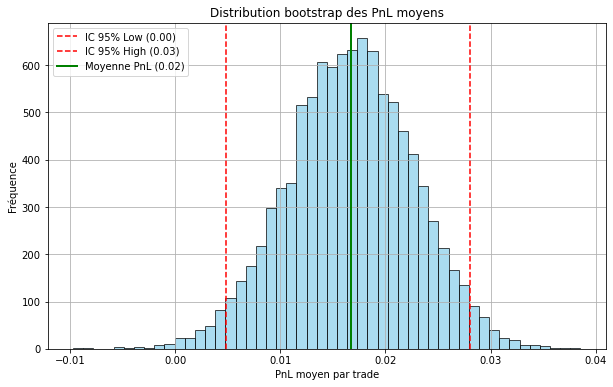

In [90]:
# Plot
plt.figure(figsize=(10,6))
plt.hist(means, bins=50, color='skyblue', edgecolor='k', alpha=0.7)
plt.axvline(ci_low, color='red', linestyle='--', label=f"IC 95% Low ({ci_low:.2f})")
plt.axvline(ci_high, color='red', linestyle='--', label=f"IC 95% High ({ci_high:.2f})")
plt.axvline(np.mean(pnl), color='green', linestyle='-', linewidth=2, label=f"Moyenne PnL ({np.mean(pnl):.2f})")
plt.title("Distribution bootstrap des PnL moyens")
plt.xlabel("PnL moyen par trade")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

Conclusion: From May to mid-August, like BTC and ETH, there was slightly more volatility in July. Nevertheless, over this period, BTC increased by +30%, ETH by +163%, and our algorithm by +397%. Statistical tests confirm an overall positive trend, with an average increase per trade of +1.67%. This is without accounting for spreads and transaction costs, but the algorithm shows great promise.